### Import required libraries

- Import `clean_data` module from `scripts`.
- Import `sqlite3` for database interaction.
- Import `warnings` and disable warnings.
- Import `pandas` for data manipulation.

In [1]:
from scripts.clean_data import *
from scripts.analysis import *
import sqlite3
import warnings
import pandas as pd

warnings.filterwarnings("ignore")

### Load and preview data

- Load CSV file `egypt_raw.csv`,`saudi-arabia_raw.csv` from `../data/raw/` into DataFrame.
- Display first 15 rows of the DataFrame.

In [2]:
df_egypt = pd.read_csv('data/raw/egypt_raw.csv')
df_egypt.head(15)

Unnamed: 0                                               link  \
0            0  https://www.bayt.com/ar/egypt/jobs/%D9%81%D9%8...   
1            1  https://www.bayt.com/ar/egypt/jobs/%D9%85%D8%A...   
2            2  https://www.bayt.com/ar/egypt/jobs/%D9%85%D9%8...   
3            3  https://www.bayt.com/ar/egypt/jobs/%D9%85%D9%8...   
4            4  https://www.bayt.com/ar/egypt/jobs/%D9%85%D9%8...   
5            5  https://www.bayt.com/ar/egypt/jobs/%D9%85%D8%A...   
6            6  https://www.bayt.com/ar/egypt/jobs/%D9%85%D9%8...   
7            7  https://www.bayt.com/ar/egypt/jobs/%D8%A7%D9%8...   
8            8  https://www.bayt.com/ar/egypt/jobs/%D9%85%D8%B...   
9            9  https://www.bayt.com/ar/egypt/jobs/%D9%85%D8%A...   
10          10  https://www.bayt.com/ar/egypt/jobs/%D9%85%D9%8...   
11          11  https://www.bayt.com/ar/egypt/jobs/%D8%B3%D9%8...   
12          12  https://www.bayt.com/ar/egypt/jobs/%D9%85%D8%B...   
13          13  https://www.bayt.com/ar/egypt/jobs/%D9%85%D9%8...   
14          14  https://www.bayt.com/ar/egypt/jobs/%D8%B9%D8%B...   

                           title        date           salary  \
0    ŸÅŸÜŸâ ÿµŸäÿßŸÜÿ© ŸÖÿπÿØÿßÿ™ (ŸÖŸäŸÉÿßŸÜŸäŸÉÿß )       ÿßŸÑŸäŸàŸÖ  $1,500 - $2,000   
1   ŸÖÿ™ÿÆÿµÿµ ŸÅŸâ ŸÖÿ¨ÿßŸÑ ÿßŸÑÿ≥Ÿàÿ¥ŸäÿßŸÑ ŸÖŸäÿØŸäÿß    ŸÅŸä ÿßŸÑÿßŸÖÿ≥              NaN   
2                    ŸÖŸàÿ∏ŸÅ ŸÖÿ®Ÿäÿπÿßÿ™    ŸÅŸä ÿßŸÑÿßŸÖÿ≥              NaN   
3                    ŸÖŸàÿ∏ŸÅ ŸÖÿ®Ÿäÿπÿßÿ™    ŸÅŸä ÿßŸÑÿßŸÖÿ≥              NaN   
4                   ŸÖŸÜÿØŸàÿ® ŸÖÿ®Ÿäÿπÿßÿ™    ŸÅŸä ÿßŸÑÿßŸÖÿ≥        $0 - $500   
5     ŸÖÿØŸäÿ± ÿßŸÜÿ™ÿßÿ¨ ŸÑŸÑÿπŸÖŸÑ ÿ®ÿßŸÑÿ≥ÿπŸàÿØŸäÿ©   ŸÇÿ®ŸÑ ŸäŸàŸÖŸäŸÜ              NaN   
6                   ŸÖŸÜÿØŸàÿ® ŸÖÿ®Ÿäÿπÿßÿ™   ŸÇÿ®ŸÑ ŸäŸàŸÖŸäŸÜ              NaN   
7                     ÿßŸÖŸäŸÜ ŸÖÿÆÿßÿ≤ŸÜ  ŸÇÿ®ŸÑ 3 ÿ£ŸäÿßŸÖ              NaN   
8        ŸÖÿ≥ÿ¶ŸàŸÑ ÿßŸÑÿ™ÿ≥ŸàŸäŸÇ ŸàÿßŸÑŸÖÿ®Ÿäÿπÿßÿ™  ŸÇÿ®ŸÑ 5 ÿ£ŸäÿßŸÖ              NaN   
9                    ŸÖÿØŸäÿ± ŸÖÿ®Ÿäÿπÿßÿ™  ŸÇÿ®ŸÑ 5 ÿ£ŸäÿßŸÖ              NaN   
10                  ŸÖŸÜÿØŸàÿ® ŸÖÿ®Ÿäÿπÿßÿ™  ŸÇÿ®ŸÑ 6 ÿ£ŸäÿßŸÖ              NaN   
11               ÿ≥ŸÉÿ±ÿ™Ÿäÿ±ÿ© ÿ™ŸÜŸÅŸäÿ∞Ÿäÿ©  ŸÇÿ®ŸÑ 6 ÿ£ŸäÿßŸÖ              NaN   
12  ŸÖÿ¥ÿ±ŸÅ ÿßŸÜÿ™ÿßÿ¨ ŸÖŸÜ ÿßŸÑÿßÿ≥ŸÉŸÜÿØÿ±Ÿäÿ© ŸÅŸÇÿ∑  ŸÇÿ®ŸÑ 6 ÿ£ŸäÿßŸÖ              NaN   
13                ŸÖŸáŸÜÿØÿ≥ ŸÖŸÉÿ™ÿ® ŸÅŸÜŸä  ŸÇÿ®ŸÑ 7 ÿ£ŸäÿßŸÖ              NaN   
14                      ÿπÿ∂Ÿà ŸÅÿ±ŸäŸÇ  ŸÇÿ®ŸÑ 9 ÿ£ŸäÿßŸÖ              NaN   

                                      career_level  \
0                                        ÿØŸàÿßŸÖ ŸÉÿßŸÖŸÑ   
1        ÿØŸàÿßŸÖ ÿ¨ÿ≤ÿ¶Ÿä ¬∑ ÿßŸÑÿ≠ÿØ ÿßŸÑÿ£ÿØŸÜŸâ 3 ÿ≥ŸÜŸàÿßÿ™ ŸÖŸÜ ÿßŸÑÿÆÿ®ÿ±ÿ©   
2                  ÿØŸàÿßŸÖ ŸÉÿßŸÖŸÑ ¬∑ 1-3 ÿ≥ŸÜŸàÿßÿ™ ŸÖŸÜ ÿßŸÑÿÆÿ®ÿ±ÿ©   
3                  ÿØŸàÿßŸÖ ŸÉÿßŸÖŸÑ ¬∑ 1-3 ÿ≥ŸÜŸàÿßÿ™ ŸÖŸÜ ÿßŸÑÿÆÿ®ÿ±ÿ©   
4                                        ÿØŸàÿßŸÖ ŸÉÿßŸÖŸÑ   
5                                        ÿØŸàÿßŸÖ ŸÉÿßŸÖŸÑ   
6   ÿØŸàÿßŸÖ ŸÉÿßŸÖŸÑ ¬∑ ŸÖÿ®ÿ™ÿØÿ¶ ÿßŸÑÿÆÿ®ÿ±ÿ© ¬∑ 0-1 ÿ≥ŸÜŸàÿßÿ™ ŸÖŸÜ ÿßŸÑÿÆÿ®ÿ±ÿ©   
7   ÿØŸàÿßŸÖ ŸÉÿßŸÖŸÑ ¬∑ ŸÖÿ™Ÿàÿ≥ÿ∑ ÿßŸÑÿÆÿ®ÿ±ÿ© ¬∑ 1-2 ÿ≥ŸÜŸàÿßÿ™ ŸÖŸÜ ÿßŸÑÿÆÿ®ÿ±ÿ©   
8                                        ÿØŸàÿßŸÖ ŸÉÿßŸÖŸÑ   
9                                        ÿØŸàÿßŸÖ ŸÉÿßŸÖŸÑ   
10  ÿØŸàÿßŸÖ ŸÉÿßŸÖŸÑ ¬∑ ŸÖÿ®ÿ™ÿØÿ¶ ÿßŸÑÿÆÿ®ÿ±ÿ© ¬∑ 0-5 ÿ≥ŸÜŸàÿßÿ™ ŸÖŸÜ ÿßŸÑÿÆÿ®ÿ±ÿ©   
11                               ÿØŸàÿßŸÖ ŸÉÿßŸÖŸÑ ¬∑ ÿ•ÿØÿßÿ±ÿ©   
12                                       ÿØŸàÿßŸÖ ŸÉÿßŸÖŸÑ   
13                                       ÿØŸàÿßŸÖ ŸÉÿßŸÖŸÑ   
14                                       ÿØŸàÿßŸÖ ŸÉÿßŸÖŸÑ   

                           location        num_of_vacancies  \
0       ÿßŸÑÿπÿßŸÖÿ±Ÿäÿ© ¬∑ ÿßŸÑÿ•ÿ≥ŸÉŸÜÿØÿ±Ÿäÿ© ¬∑ ŸÖÿµÿ±                     NaN   
1                     ÿßŸÑŸÇÿßŸáÿ±ÿ© ¬∑ ŸÖÿµÿ±  ÿßŸÑŸàÿ∏ÿßÿ¶ŸÅ ÿßŸÑŸÖÿ™ÿßÿ≠ÿ© ÿπÿØÿØ 10   
2   ÿßŸÑŸÇÿßŸáÿ±ÿ© ÿßŸÑÿ¨ÿØŸäÿØÿ© ¬∑ ÿßŸÑŸÇÿßŸáÿ±ÿ© ¬∑ ŸÖÿµÿ±                     NaN   
3   ÿßŸÑŸÇÿßŸáÿ±ÿ© ÿßŸÑÿ¨ÿØŸäÿØÿ© ¬∑ ÿßŸÑŸÇÿßŸáÿ±ÿ© ¬∑ ŸÖÿµÿ±                     NaN

In [3]:
df_saudi = pd.read_csv('data/raw/saudi-arabia_raw.csv')
df_saudi.head(15)

Unnamed: 0                                               link  \
0            0  https://www.bayt.com/ar/saudi-arabia/jobs/%D9%...   
1            1  https://www.bayt.com/ar/saudi-arabia/jobs/%D9%...   
2            2  https://www.bayt.com/ar/saudi-arabia/jobs/%D9%...   
3            3  https://www.bayt.com/ar/saudi-arabia/jobs/%D9%...   
4            4  https://www.bayt.com/ar/saudi-arabia/jobs/%D9%...   
5            5  https://www.bayt.com/ar/saudi-arabia/jobs/%D9%...   
6            6  https://www.bayt.com/ar/saudi-arabia/jobs/%D9%...   
7            7  https://www.bayt.com/ar/saudi-arabia/jobs/%D9%...   
8            8  https://www.bayt.com/ar/saudi-arabia/jobs/%D9%...   
9            9  https://www.bayt.com/ar/saudi-arabia/jobs/%D9%...   
10          10  https://www.bayt.com/ar/saudi-arabia/jobs/%D9%...   
11          11  https://www.bayt.com/ar/saudi-arabia/jobs/%D9%...   
12          12  https://www.bayt.com/ar/saudi-arabia/jobs/%D9%...   
13          13  https://www.bayt.com/ar/saudi-arabia/jobs/%D9%...   
14          14  https://www.bayt.com/ar/saudi-arabia/jobs/%D8%...   

                       title                 company_name   date  \
0               ŸÖŸáŸÜÿØÿ≥ ŸÉŸáÿ±ÿ®ÿßÿ°       ÿ¥ÿ±ŸÉÿ© ÿ≥ŸÖÿ± ÿ™ÿßŸàŸÜ ÿßŸÑÿπŸÇÿßÿ±Ÿäÿ©  ÿßŸÑŸäŸàŸÖ   
1          ŸÖŸàÿ∏ŸÅ ÿÆÿØŸÖÿßÿ™ ÿ•ÿØÿßÿ±Ÿäÿ©         Healthy Food Company  ÿßŸÑŸäŸàŸÖ   
2                 ŸÖŸáŸÜÿØÿ≥ ŸÖÿØŸÜŸä       ÿ¥ÿ±ŸÉÿ© ÿ≥ŸÖÿ± ÿ™ÿßŸàŸÜ ÿßŸÑÿπŸÇÿßÿ±Ÿäÿ©  ÿßŸÑŸäŸàŸÖ   
3       ŸÖÿ≠ÿßŸÖŸä ŸàŸÖÿ≥ÿ™ÿ¥ÿßÿ± ŸÇÿßŸÜŸàŸÜŸä       ÿ¥ÿ±ŸÉÿ© ÿ≥ŸÖÿ± ÿ™ÿßŸàŸÜ ÿßŸÑÿπŸÇÿßÿ±Ÿäÿ©  ÿßŸÑŸäŸàŸÖ   
4           ŸÖŸàÿ∏ŸÅ ŸÖŸàÿßÿ±ÿØ ÿ®ÿ¥ÿ±Ÿäÿ©                          NaN  ÿßŸÑŸäŸàŸÖ   
5   ŸÖÿ≥ÿ§ŸàŸÑ ÿ™ÿ£ÿ¨Ÿäÿ± ÿ≥Ÿäÿßÿ±ÿßÿ™ (ÿ¨ÿØÿ©)                          NaN  ÿßŸÑŸäŸàŸÖ   
6            ŸÖŸàÿ∏ŸÅ ÿÆÿØŸÖÿ© ÿπŸÖŸÑÿßÿ°         ÿ¥ÿ±ŸÉÿ© ŸÖŸÅÿ±Ÿàÿ¥ÿßÿ™ ÿ®ÿßŸÑÿ±Ÿäÿßÿ∂  ÿßŸÑŸäŸàŸÖ   
7                ŸÖÿ≥ÿßÿπÿØ ÿßÿØÿßÿ±Ÿä                Beauty Corner  ÿßŸÑŸäŸàŸÖ   
8       ŸÖÿ≥ÿ§ŸàŸÑÿ©/ŸÖÿ≥ÿ§ŸàŸÑ ŸÖÿ¥ÿ™ÿ±Ÿäÿßÿ™          Dar Al-Fikr Schools  ÿßŸÑŸäŸàŸÖ   
9          ŸÖÿ≥ÿßÿπÿØ ŸÖŸàÿßÿ±ÿØ ÿ®ÿ¥ÿ±Ÿäÿ©  ÿ¥ÿ±ŸÉÿ© ŸÖÿ≠ŸÖÿµÿ© ÿ™ÿ≥ÿßŸÑŸä ŸÖÿ±ÿ≥Ÿâ ŸÖÿ∑ÿ±Ÿàÿ≠  ÿßŸÑŸäŸàŸÖ   
10              ŸÖŸáŸÜÿØÿ≥ ŸÉŸáÿ±ÿ®ÿßÿ°                  SAUDI BILDA  ÿßŸÑŸäŸàŸÖ   
11               ŸÖŸàÿ∏ŸÅ ŸÖÿ®Ÿäÿπÿßÿ™               zaid Alhussain  ÿßŸÑŸäŸàŸÖ   
12              ŸÖÿ≠ÿßÿ≥ÿ® ÿ™ŸÉÿßŸÑŸäŸÅ    ÿ¥ÿ±ŸÉÿ© ÿ®ÿ±Ÿàÿ™ŸäŸÜÿß ŸÖÿ≥ÿßŸáŸÖÿ© ŸÖŸÇŸÅŸÑÿ©  ÿßŸÑŸäŸàŸÖ   
13               ŸÖÿØŸäÿ± ŸÖÿ®Ÿäÿπÿßÿ™               Husn Al Emirat  ÿßŸÑŸäŸàŸÖ   
14                ÿ∑ÿ®Ÿäÿ® ÿßÿ≥ŸÜÿßŸÜ               ŸÖÿ¨ŸÖÿπ ÿ∑ÿ®Ÿä ŸÖÿ™ÿÆÿµÿµ  ÿßŸÑŸäŸàŸÖ   

             salary                                     career_level  \
0               NaN   ÿØŸàÿßŸÖ ŸÉÿßŸÖŸÑ ¬∑ ŸÖÿ™Ÿàÿ≥ÿ∑ ÿßŸÑÿÆÿ®ÿ±ÿ© ¬∑ 4-8 ÿ≥ŸÜŸàÿßÿ™ ŸÖŸÜ ÿßŸÑÿÆÿ®ÿ±ÿ©   
1               NaN                                        ÿØŸàÿßŸÖ ŸÉÿßŸÖŸÑ   
2               NaN   ÿØŸàÿßŸÖ ŸÉÿßŸÖŸÑ ¬∑ ŸÖÿ™Ÿàÿ≥ÿ∑ ÿßŸÑÿÆÿ®ÿ±ÿ© ¬∑ 4-8 ÿ≥ŸÜŸàÿßÿ™ ŸÖŸÜ ÿßŸÑÿÆÿ®ÿ±ÿ©   
3               NaN                  ÿØŸàÿßŸÖ ŸÉÿßŸÖŸÑ ¬∑ 3-7 ÿ≥ŸÜŸàÿßÿ™ ŸÖŸÜ ÿßŸÑÿÆÿ®ÿ±ÿ©   
4   $1,000 - $1,500                  ÿØŸàÿßŸÖ ŸÉÿßŸÖŸÑ ¬∑ 2-6 ÿ≥ŸÜŸàÿßÿ™ ŸÖŸÜ ÿßŸÑÿÆÿ®ÿ±ÿ©   
5               NaN                                        ÿØŸàÿßŸÖ ŸÉÿßŸÖŸÑ   
6               NaN                                        ÿØŸàÿßŸÖ ŸÉÿßŸÖŸÑ   
7               NaN        ÿØŸàÿßŸÖ ŸÉÿßŸÖŸÑ ¬∑ ÿßŸÑÿ≠ÿØ ÿßŸÑÿ£ÿØŸÜŸâ 1 ÿ≥ŸÜŸàÿßÿ™ ŸÖŸÜ ÿßŸÑÿÆÿ®ÿ±ÿ©   
8               NaN   ÿØŸàÿßŸÖ ŸÉÿßŸÖŸÑ ¬∑ ŸÖÿ™Ÿàÿ≥ÿ∑ ÿßŸÑÿÆÿ®ÿ±ÿ© ¬∑ 2-5 ÿ≥ŸÜŸàÿßÿ™ ŸÖŸÜ ÿßŸÑÿÆÿ®ÿ±ÿ©   
9               NaN                                        ÿØŸàÿßŸÖ ŸÉÿßŸÖŸÑ   
10              NaN        ÿØŸàÿßŸÖ ŸÉÿßŸÖŸÑ ¬∑ ÿßŸÑÿ≠ÿØ ÿßŸÑÿ£ÿØŸÜŸâ 5 ÿ≥ŸÜŸàÿßÿ™ ŸÖŸÜ ÿßŸÑÿÆÿ®ÿ±ÿ©   
11              NaN                                        ÿØŸàÿßŸÖ ŸÉÿßŸÖŸÑ   
12    $500 - $1,000   ÿØŸàÿßŸÖ ŸÉÿßŸÖŸÑ ¬∑ ŸÖÿ™Ÿàÿ≥ÿ∑ ÿßŸÑÿÆÿ®ÿ±ÿ© ¬∑ 3-4 ÿ≥ŸÜŸàÿßÿ™ ŸÖŸÜ ÿßŸÑÿÆÿ®ÿ±ÿ©   
13              NaN  ÿØŸàÿßŸÖ ŸÉÿßŸÖŸÑ ¬∑ ŸÖÿ™Ÿàÿ≥ÿ∑ ÿßŸÑÿÆÿ®ÿ±ÿ© ¬∑ 5-10 ÿ≥ŸÜŸàÿßÿ™ ŸÖŸÜ ÿßŸÑÿÆÿ®ÿ±ÿ©   
14          

### Split location and career_level columns

- Split `location` column by separator `¬∑`, keep index 1 as `city`.
- Split `career_level` column by separator `¬∑`, keep indexes 0, 1, 2 as `type`, `exp`, and `no_exp`.
- Further process `career_level` column using `split_career_level` function.

In [4]:
split_column(df_egypt, 'location', [1], '¬∑', ['city'], reverse=True)
split_career_level(df_egypt)
df_egypt.head(15)

Unnamed: 0                                               link  \
0            0  https://www.bayt.com/ar/egypt/jobs/%D9%81%D9%8...   
1            1  https://www.bayt.com/ar/egypt/jobs/%D9%85%D8%A...   
2            2  https://www.bayt.com/ar/egypt/jobs/%D9%85%D9%8...   
3            3  https://www.bayt.com/ar/egypt/jobs/%D9%85%D9%8...   
4            4  https://www.bayt.com/ar/egypt/jobs/%D9%85%D9%8...   
5            5  https://www.bayt.com/ar/egypt/jobs/%D9%85%D8%A...   
6            6  https://www.bayt.com/ar/egypt/jobs/%D9%85%D9%8...   
7            7  https://www.bayt.com/ar/egypt/jobs/%D8%A7%D9%8...   
8            8  https://www.bayt.com/ar/egypt/jobs/%D9%85%D8%B...   
9            9  https://www.bayt.com/ar/egypt/jobs/%D9%85%D8%A...   
10          10  https://www.bayt.com/ar/egypt/jobs/%D9%85%D9%8...   
11          11  https://www.bayt.com/ar/egypt/jobs/%D8%B3%D9%8...   
12          12  https://www.bayt.com/ar/egypt/jobs/%D9%85%D8%B...   
13          13  https://www.bayt.com/ar/egypt/jobs/%D9%85%D9%8...   
14          14  https://www.bayt.com/ar/egypt/jobs/%D8%B9%D8%B...   

                           title        date           salary  \
0    ŸÅŸÜŸâ ÿµŸäÿßŸÜÿ© ŸÖÿπÿØÿßÿ™ (ŸÖŸäŸÉÿßŸÜŸäŸÉÿß )       ÿßŸÑŸäŸàŸÖ  $1,500 - $2,000   
1   ŸÖÿ™ÿÆÿµÿµ ŸÅŸâ ŸÖÿ¨ÿßŸÑ ÿßŸÑÿ≥Ÿàÿ¥ŸäÿßŸÑ ŸÖŸäÿØŸäÿß    ŸÅŸä ÿßŸÑÿßŸÖÿ≥              NaN   
2                    ŸÖŸàÿ∏ŸÅ ŸÖÿ®Ÿäÿπÿßÿ™    ŸÅŸä ÿßŸÑÿßŸÖÿ≥              NaN   
3                    ŸÖŸàÿ∏ŸÅ ŸÖÿ®Ÿäÿπÿßÿ™    ŸÅŸä ÿßŸÑÿßŸÖÿ≥              NaN   
4                   ŸÖŸÜÿØŸàÿ® ŸÖÿ®Ÿäÿπÿßÿ™    ŸÅŸä ÿßŸÑÿßŸÖÿ≥        $0 - $500   
5     ŸÖÿØŸäÿ± ÿßŸÜÿ™ÿßÿ¨ ŸÑŸÑÿπŸÖŸÑ ÿ®ÿßŸÑÿ≥ÿπŸàÿØŸäÿ©   ŸÇÿ®ŸÑ ŸäŸàŸÖŸäŸÜ              NaN   
6                   ŸÖŸÜÿØŸàÿ® ŸÖÿ®Ÿäÿπÿßÿ™   ŸÇÿ®ŸÑ ŸäŸàŸÖŸäŸÜ              NaN   
7                     ÿßŸÖŸäŸÜ ŸÖÿÆÿßÿ≤ŸÜ  ŸÇÿ®ŸÑ 3 ÿ£ŸäÿßŸÖ              NaN   
8        ŸÖÿ≥ÿ¶ŸàŸÑ ÿßŸÑÿ™ÿ≥ŸàŸäŸÇ ŸàÿßŸÑŸÖÿ®Ÿäÿπÿßÿ™  ŸÇÿ®ŸÑ 5 ÿ£ŸäÿßŸÖ              NaN   
9                    ŸÖÿØŸäÿ± ŸÖÿ®Ÿäÿπÿßÿ™  ŸÇÿ®ŸÑ 5 ÿ£ŸäÿßŸÖ              NaN   
10                  ŸÖŸÜÿØŸàÿ® ŸÖÿ®Ÿäÿπÿßÿ™  ŸÇÿ®ŸÑ 6 ÿ£ŸäÿßŸÖ              NaN   
11               ÿ≥ŸÉÿ±ÿ™Ÿäÿ±ÿ© ÿ™ŸÜŸÅŸäÿ∞Ÿäÿ©  ŸÇÿ®ŸÑ 6 ÿ£ŸäÿßŸÖ              NaN   
12  ŸÖÿ¥ÿ±ŸÅ ÿßŸÜÿ™ÿßÿ¨ ŸÖŸÜ ÿßŸÑÿßÿ≥ŸÉŸÜÿØÿ±Ÿäÿ© ŸÅŸÇÿ∑  ŸÇÿ®ŸÑ 6 ÿ£ŸäÿßŸÖ              NaN   
13                ŸÖŸáŸÜÿØÿ≥ ŸÖŸÉÿ™ÿ® ŸÅŸÜŸä  ŸÇÿ®ŸÑ 7 ÿ£ŸäÿßŸÖ              NaN   
14                      ÿπÿ∂Ÿà ŸÅÿ±ŸäŸÇ  ŸÇÿ®ŸÑ 9 ÿ£ŸäÿßŸÖ              NaN   

                                      career_level  \
0                                        ÿØŸàÿßŸÖ ŸÉÿßŸÖŸÑ   
1        ÿØŸàÿßŸÖ ÿ¨ÿ≤ÿ¶Ÿä ¬∑ ÿßŸÑÿ≠ÿØ ÿßŸÑÿ£ÿØŸÜŸâ 3 ÿ≥ŸÜŸàÿßÿ™ ŸÖŸÜ ÿßŸÑÿÆÿ®ÿ±ÿ©   
2                  ÿØŸàÿßŸÖ ŸÉÿßŸÖŸÑ ¬∑ 1-3 ÿ≥ŸÜŸàÿßÿ™ ŸÖŸÜ ÿßŸÑÿÆÿ®ÿ±ÿ©   
3                  ÿØŸàÿßŸÖ ŸÉÿßŸÖŸÑ ¬∑ 1-3 ÿ≥ŸÜŸàÿßÿ™ ŸÖŸÜ ÿßŸÑÿÆÿ®ÿ±ÿ©   
4                                        ÿØŸàÿßŸÖ ŸÉÿßŸÖŸÑ   
5                                        ÿØŸàÿßŸÖ ŸÉÿßŸÖŸÑ   
6   ÿØŸàÿßŸÖ ŸÉÿßŸÖŸÑ ¬∑ ŸÖÿ®ÿ™ÿØÿ¶ ÿßŸÑÿÆÿ®ÿ±ÿ© ¬∑ 0-1 ÿ≥ŸÜŸàÿßÿ™ ŸÖŸÜ ÿßŸÑÿÆÿ®ÿ±ÿ©   
7   ÿØŸàÿßŸÖ ŸÉÿßŸÖŸÑ ¬∑ ŸÖÿ™Ÿàÿ≥ÿ∑ ÿßŸÑÿÆÿ®ÿ±ÿ© ¬∑ 1-2 ÿ≥ŸÜŸàÿßÿ™ ŸÖŸÜ ÿßŸÑÿÆÿ®ÿ±ÿ©   
8                                        ÿØŸàÿßŸÖ ŸÉÿßŸÖŸÑ   
9                                        ÿØŸàÿßŸÖ ŸÉÿßŸÖŸÑ   
10  ÿØŸàÿßŸÖ ŸÉÿßŸÖŸÑ ¬∑ ŸÖÿ®ÿ™ÿØÿ¶ ÿßŸÑÿÆÿ®ÿ±ÿ© ¬∑ 0-5 ÿ≥ŸÜŸàÿßÿ™ ŸÖŸÜ ÿßŸÑÿÆÿ®ÿ±ÿ©   
11                               ÿØŸàÿßŸÖ ŸÉÿßŸÖŸÑ ¬∑ ÿ•ÿØÿßÿ±ÿ©   
12                                       ÿØŸàÿßŸÖ ŸÉÿßŸÖŸÑ   
13                                       ÿØŸàÿßŸÖ ŸÉÿßŸÖŸÑ   
14                                       ÿØŸàÿßŸÖ ŸÉÿßŸÖŸÑ   

                           location        num_of_vacancies  \
0       ÿßŸÑÿπÿßŸÖÿ±Ÿäÿ© ¬∑ ÿßŸÑÿ•ÿ≥ŸÉŸÜÿØÿ±Ÿäÿ© ¬∑ ŸÖÿµÿ±                     NaN   
1                     ÿßŸÑŸÇÿßŸáÿ±ÿ© ¬∑ ŸÖÿµÿ±  ÿßŸÑŸàÿ∏ÿßÿ¶ŸÅ ÿßŸÑŸÖÿ™ÿßÿ≠ÿ© ÿπÿØÿØ 10   
2   ÿßŸÑŸÇÿßŸáÿ±ÿ© ÿßŸÑÿ¨ÿØŸäÿØÿ© ¬∑ ÿßŸÑŸÇÿßŸáÿ±ÿ© ¬∑ ŸÖÿµÿ±                     NaN   
3   ÿßŸÑŸÇÿßŸáÿ±ÿ© ÿßŸÑÿ¨ÿØŸäÿØÿ© ¬∑ ÿßŸÑŸÇÿßŸáÿ±ÿ© ¬∑ ŸÖÿµÿ±                     NaN

In [5]:
split_column(df_saudi, 'location', [1], '¬∑', ['city'], reverse=True)
split_career_level(df_saudi)
df_saudi.head(15)

Unnamed: 0                                               link  \
0            0  https://www.bayt.com/ar/saudi-arabia/jobs/%D9%...   
1            1  https://www.bayt.com/ar/saudi-arabia/jobs/%D9%...   
2            2  https://www.bayt.com/ar/saudi-arabia/jobs/%D9%...   
3            3  https://www.bayt.com/ar/saudi-arabia/jobs/%D9%...   
4            4  https://www.bayt.com/ar/saudi-arabia/jobs/%D9%...   
5            5  https://www.bayt.com/ar/saudi-arabia/jobs/%D9%...   
6            6  https://www.bayt.com/ar/saudi-arabia/jobs/%D9%...   
7            7  https://www.bayt.com/ar/saudi-arabia/jobs/%D9%...   
8            8  https://www.bayt.com/ar/saudi-arabia/jobs/%D9%...   
9            9  https://www.bayt.com/ar/saudi-arabia/jobs/%D9%...   
10          10  https://www.bayt.com/ar/saudi-arabia/jobs/%D9%...   
11          11  https://www.bayt.com/ar/saudi-arabia/jobs/%D9%...   
12          12  https://www.bayt.com/ar/saudi-arabia/jobs/%D9%...   
13          13  https://www.bayt.com/ar/saudi-arabia/jobs/%D9%...   
14          14  https://www.bayt.com/ar/saudi-arabia/jobs/%D8%...   

                       title                 company_name   date  \
0               ŸÖŸáŸÜÿØÿ≥ ŸÉŸáÿ±ÿ®ÿßÿ°       ÿ¥ÿ±ŸÉÿ© ÿ≥ŸÖÿ± ÿ™ÿßŸàŸÜ ÿßŸÑÿπŸÇÿßÿ±Ÿäÿ©  ÿßŸÑŸäŸàŸÖ   
1          ŸÖŸàÿ∏ŸÅ ÿÆÿØŸÖÿßÿ™ ÿ•ÿØÿßÿ±Ÿäÿ©         Healthy Food Company  ÿßŸÑŸäŸàŸÖ   
2                 ŸÖŸáŸÜÿØÿ≥ ŸÖÿØŸÜŸä       ÿ¥ÿ±ŸÉÿ© ÿ≥ŸÖÿ± ÿ™ÿßŸàŸÜ ÿßŸÑÿπŸÇÿßÿ±Ÿäÿ©  ÿßŸÑŸäŸàŸÖ   
3       ŸÖÿ≠ÿßŸÖŸä ŸàŸÖÿ≥ÿ™ÿ¥ÿßÿ± ŸÇÿßŸÜŸàŸÜŸä       ÿ¥ÿ±ŸÉÿ© ÿ≥ŸÖÿ± ÿ™ÿßŸàŸÜ ÿßŸÑÿπŸÇÿßÿ±Ÿäÿ©  ÿßŸÑŸäŸàŸÖ   
4           ŸÖŸàÿ∏ŸÅ ŸÖŸàÿßÿ±ÿØ ÿ®ÿ¥ÿ±Ÿäÿ©                          NaN  ÿßŸÑŸäŸàŸÖ   
5   ŸÖÿ≥ÿ§ŸàŸÑ ÿ™ÿ£ÿ¨Ÿäÿ± ÿ≥Ÿäÿßÿ±ÿßÿ™ (ÿ¨ÿØÿ©)                          NaN  ÿßŸÑŸäŸàŸÖ   
6            ŸÖŸàÿ∏ŸÅ ÿÆÿØŸÖÿ© ÿπŸÖŸÑÿßÿ°         ÿ¥ÿ±ŸÉÿ© ŸÖŸÅÿ±Ÿàÿ¥ÿßÿ™ ÿ®ÿßŸÑÿ±Ÿäÿßÿ∂  ÿßŸÑŸäŸàŸÖ   
7                ŸÖÿ≥ÿßÿπÿØ ÿßÿØÿßÿ±Ÿä                Beauty Corner  ÿßŸÑŸäŸàŸÖ   
8       ŸÖÿ≥ÿ§ŸàŸÑÿ©/ŸÖÿ≥ÿ§ŸàŸÑ ŸÖÿ¥ÿ™ÿ±Ÿäÿßÿ™          Dar Al-Fikr Schools  ÿßŸÑŸäŸàŸÖ   
9          ŸÖÿ≥ÿßÿπÿØ ŸÖŸàÿßÿ±ÿØ ÿ®ÿ¥ÿ±Ÿäÿ©  ÿ¥ÿ±ŸÉÿ© ŸÖÿ≠ŸÖÿµÿ© ÿ™ÿ≥ÿßŸÑŸä ŸÖÿ±ÿ≥Ÿâ ŸÖÿ∑ÿ±Ÿàÿ≠  ÿßŸÑŸäŸàŸÖ   
10              ŸÖŸáŸÜÿØÿ≥ ŸÉŸáÿ±ÿ®ÿßÿ°                  SAUDI BILDA  ÿßŸÑŸäŸàŸÖ   
11               ŸÖŸàÿ∏ŸÅ ŸÖÿ®Ÿäÿπÿßÿ™               zaid Alhussain  ÿßŸÑŸäŸàŸÖ   
12              ŸÖÿ≠ÿßÿ≥ÿ® ÿ™ŸÉÿßŸÑŸäŸÅ    ÿ¥ÿ±ŸÉÿ© ÿ®ÿ±Ÿàÿ™ŸäŸÜÿß ŸÖÿ≥ÿßŸáŸÖÿ© ŸÖŸÇŸÅŸÑÿ©  ÿßŸÑŸäŸàŸÖ   
13               ŸÖÿØŸäÿ± ŸÖÿ®Ÿäÿπÿßÿ™               Husn Al Emirat  ÿßŸÑŸäŸàŸÖ   
14                ÿ∑ÿ®Ÿäÿ® ÿßÿ≥ŸÜÿßŸÜ               ŸÖÿ¨ŸÖÿπ ÿ∑ÿ®Ÿä ŸÖÿ™ÿÆÿµÿµ  ÿßŸÑŸäŸàŸÖ   

             salary                                     career_level  \
0               NaN   ÿØŸàÿßŸÖ ŸÉÿßŸÖŸÑ ¬∑ ŸÖÿ™Ÿàÿ≥ÿ∑ ÿßŸÑÿÆÿ®ÿ±ÿ© ¬∑ 4-8 ÿ≥ŸÜŸàÿßÿ™ ŸÖŸÜ ÿßŸÑÿÆÿ®ÿ±ÿ©   
1               NaN                                        ÿØŸàÿßŸÖ ŸÉÿßŸÖŸÑ   
2               NaN   ÿØŸàÿßŸÖ ŸÉÿßŸÖŸÑ ¬∑ ŸÖÿ™Ÿàÿ≥ÿ∑ ÿßŸÑÿÆÿ®ÿ±ÿ© ¬∑ 4-8 ÿ≥ŸÜŸàÿßÿ™ ŸÖŸÜ ÿßŸÑÿÆÿ®ÿ±ÿ©   
3               NaN                  ÿØŸàÿßŸÖ ŸÉÿßŸÖŸÑ ¬∑ 3-7 ÿ≥ŸÜŸàÿßÿ™ ŸÖŸÜ ÿßŸÑÿÆÿ®ÿ±ÿ©   
4   $1,000 - $1,500                  ÿØŸàÿßŸÖ ŸÉÿßŸÖŸÑ ¬∑ 2-6 ÿ≥ŸÜŸàÿßÿ™ ŸÖŸÜ ÿßŸÑÿÆÿ®ÿ±ÿ©   
5               NaN                                        ÿØŸàÿßŸÖ ŸÉÿßŸÖŸÑ   
6               NaN                                        ÿØŸàÿßŸÖ ŸÉÿßŸÖŸÑ   
7               NaN        ÿØŸàÿßŸÖ ŸÉÿßŸÖŸÑ ¬∑ ÿßŸÑÿ≠ÿØ ÿßŸÑÿ£ÿØŸÜŸâ 1 ÿ≥ŸÜŸàÿßÿ™ ŸÖŸÜ ÿßŸÑÿÆÿ®ÿ±ÿ©   
8               NaN   ÿØŸàÿßŸÖ ŸÉÿßŸÖŸÑ ¬∑ ŸÖÿ™Ÿàÿ≥ÿ∑ ÿßŸÑÿÆÿ®ÿ±ÿ© ¬∑ 2-5 ÿ≥ŸÜŸàÿßÿ™ ŸÖŸÜ ÿßŸÑÿÆÿ®ÿ±ÿ©   
9               NaN                                        ÿØŸàÿßŸÖ ŸÉÿßŸÖŸÑ   
10              NaN        ÿØŸàÿßŸÖ ŸÉÿßŸÖŸÑ ¬∑ ÿßŸÑÿ≠ÿØ ÿßŸÑÿ£ÿØŸÜŸâ 5 ÿ≥ŸÜŸàÿßÿ™ ŸÖŸÜ ÿßŸÑÿÆÿ®ÿ±ÿ©   
11              NaN                                        ÿØŸàÿßŸÖ ŸÉÿßŸÖŸÑ   
12    $500 - $1,000   ÿØŸàÿßŸÖ ŸÉÿßŸÖŸÑ ¬∑ ŸÖÿ™Ÿàÿ≥ÿ∑ ÿßŸÑÿÆÿ®ÿ±ÿ© ¬∑ 3-4 ÿ≥ŸÜŸàÿßÿ™ ŸÖŸÜ ÿßŸÑÿÆÿ®ÿ±ÿ©   
13              NaN  ÿØŸàÿßŸÖ ŸÉÿßŸÖŸÑ ¬∑ ŸÖÿ™Ÿàÿ≥ÿ∑ ÿßŸÑÿÆÿ®ÿ±ÿ© ¬∑ 5-10 ÿ≥ŸÜŸàÿßÿ™ ŸÖŸÜ ÿßŸÑÿÆÿ®ÿ±ÿ©   
14          

### Clean and combine experience columns

- Replace 'Unknown' values in `exp` column with `NaN`.
- Combine `experience` column with `exp` column into a new column `experience_` using `combine_first`.
- Replace 'Unknown' values in `no_exp` column with `NaN`.
- Combine `num_of_exp` column with `no_exp` column into a new column `num_of_exp_years` using `combine_first`.

In [6]:
df_egypt['exp'].replace('Unknown', np.nan, inplace=True)
df_egypt['experience_'] = df_egypt['experience'].combine_first(df_egypt['exp'])
df_egypt['no_exp'].replace('Unknown', np.nan, inplace=True)
df_egypt['num_of_exp_years'] = df_egypt['num_of_exp'].combine_first(df_egypt['no_exp'])
df_egypt.head(15)

Unnamed: 0                                               link  \
0            0  https://www.bayt.com/ar/egypt/jobs/%D9%81%D9%8...   
1            1  https://www.bayt.com/ar/egypt/jobs/%D9%85%D8%A...   
2            2  https://www.bayt.com/ar/egypt/jobs/%D9%85%D9%8...   
3            3  https://www.bayt.com/ar/egypt/jobs/%D9%85%D9%8...   
4            4  https://www.bayt.com/ar/egypt/jobs/%D9%85%D9%8...   
5            5  https://www.bayt.com/ar/egypt/jobs/%D9%85%D8%A...   
6            6  https://www.bayt.com/ar/egypt/jobs/%D9%85%D9%8...   
7            7  https://www.bayt.com/ar/egypt/jobs/%D8%A7%D9%8...   
8            8  https://www.bayt.com/ar/egypt/jobs/%D9%85%D8%B...   
9            9  https://www.bayt.com/ar/egypt/jobs/%D9%85%D8%A...   
10          10  https://www.bayt.com/ar/egypt/jobs/%D9%85%D9%8...   
11          11  https://www.bayt.com/ar/egypt/jobs/%D8%B3%D9%8...   
12          12  https://www.bayt.com/ar/egypt/jobs/%D9%85%D8%B...   
13          13  https://www.bayt.com/ar/egypt/jobs/%D9%85%D9%8...   
14          14  https://www.bayt.com/ar/egypt/jobs/%D8%B9%D8%B...   

                           title        date           salary  \
0    ŸÅŸÜŸâ ÿµŸäÿßŸÜÿ© ŸÖÿπÿØÿßÿ™ (ŸÖŸäŸÉÿßŸÜŸäŸÉÿß )       ÿßŸÑŸäŸàŸÖ  $1,500 - $2,000   
1   ŸÖÿ™ÿÆÿµÿµ ŸÅŸâ ŸÖÿ¨ÿßŸÑ ÿßŸÑÿ≥Ÿàÿ¥ŸäÿßŸÑ ŸÖŸäÿØŸäÿß    ŸÅŸä ÿßŸÑÿßŸÖÿ≥              NaN   
2                    ŸÖŸàÿ∏ŸÅ ŸÖÿ®Ÿäÿπÿßÿ™    ŸÅŸä ÿßŸÑÿßŸÖÿ≥              NaN   
3                    ŸÖŸàÿ∏ŸÅ ŸÖÿ®Ÿäÿπÿßÿ™    ŸÅŸä ÿßŸÑÿßŸÖÿ≥              NaN   
4                   ŸÖŸÜÿØŸàÿ® ŸÖÿ®Ÿäÿπÿßÿ™    ŸÅŸä ÿßŸÑÿßŸÖÿ≥        $0 - $500   
5     ŸÖÿØŸäÿ± ÿßŸÜÿ™ÿßÿ¨ ŸÑŸÑÿπŸÖŸÑ ÿ®ÿßŸÑÿ≥ÿπŸàÿØŸäÿ©   ŸÇÿ®ŸÑ ŸäŸàŸÖŸäŸÜ              NaN   
6                   ŸÖŸÜÿØŸàÿ® ŸÖÿ®Ÿäÿπÿßÿ™   ŸÇÿ®ŸÑ ŸäŸàŸÖŸäŸÜ              NaN   
7                     ÿßŸÖŸäŸÜ ŸÖÿÆÿßÿ≤ŸÜ  ŸÇÿ®ŸÑ 3 ÿ£ŸäÿßŸÖ              NaN   
8        ŸÖÿ≥ÿ¶ŸàŸÑ ÿßŸÑÿ™ÿ≥ŸàŸäŸÇ ŸàÿßŸÑŸÖÿ®Ÿäÿπÿßÿ™  ŸÇÿ®ŸÑ 5 ÿ£ŸäÿßŸÖ              NaN   
9                    ŸÖÿØŸäÿ± ŸÖÿ®Ÿäÿπÿßÿ™  ŸÇÿ®ŸÑ 5 ÿ£ŸäÿßŸÖ              NaN   
10                  ŸÖŸÜÿØŸàÿ® ŸÖÿ®Ÿäÿπÿßÿ™  ŸÇÿ®ŸÑ 6 ÿ£ŸäÿßŸÖ              NaN   
11               ÿ≥ŸÉÿ±ÿ™Ÿäÿ±ÿ© ÿ™ŸÜŸÅŸäÿ∞Ÿäÿ©  ŸÇÿ®ŸÑ 6 ÿ£ŸäÿßŸÖ              NaN   
12  ŸÖÿ¥ÿ±ŸÅ ÿßŸÜÿ™ÿßÿ¨ ŸÖŸÜ ÿßŸÑÿßÿ≥ŸÉŸÜÿØÿ±Ÿäÿ© ŸÅŸÇÿ∑  ŸÇÿ®ŸÑ 6 ÿ£ŸäÿßŸÖ              NaN   
13                ŸÖŸáŸÜÿØÿ≥ ŸÖŸÉÿ™ÿ® ŸÅŸÜŸä  ŸÇÿ®ŸÑ 7 ÿ£ŸäÿßŸÖ              NaN   
14                      ÿπÿ∂Ÿà ŸÅÿ±ŸäŸÇ  ŸÇÿ®ŸÑ 9 ÿ£ŸäÿßŸÖ              NaN   

                                      career_level  \
0                                        ÿØŸàÿßŸÖ ŸÉÿßŸÖŸÑ   
1        ÿØŸàÿßŸÖ ÿ¨ÿ≤ÿ¶Ÿä ¬∑ ÿßŸÑÿ≠ÿØ ÿßŸÑÿ£ÿØŸÜŸâ 3 ÿ≥ŸÜŸàÿßÿ™ ŸÖŸÜ ÿßŸÑÿÆÿ®ÿ±ÿ©   
2                  ÿØŸàÿßŸÖ ŸÉÿßŸÖŸÑ ¬∑ 1-3 ÿ≥ŸÜŸàÿßÿ™ ŸÖŸÜ ÿßŸÑÿÆÿ®ÿ±ÿ©   
3                  ÿØŸàÿßŸÖ ŸÉÿßŸÖŸÑ ¬∑ 1-3 ÿ≥ŸÜŸàÿßÿ™ ŸÖŸÜ ÿßŸÑÿÆÿ®ÿ±ÿ©   
4                                        ÿØŸàÿßŸÖ ŸÉÿßŸÖŸÑ   
5                                        ÿØŸàÿßŸÖ ŸÉÿßŸÖŸÑ   
6   ÿØŸàÿßŸÖ ŸÉÿßŸÖŸÑ ¬∑ ŸÖÿ®ÿ™ÿØÿ¶ ÿßŸÑÿÆÿ®ÿ±ÿ© ¬∑ 0-1 ÿ≥ŸÜŸàÿßÿ™ ŸÖŸÜ ÿßŸÑÿÆÿ®ÿ±ÿ©   
7   ÿØŸàÿßŸÖ ŸÉÿßŸÖŸÑ ¬∑ ŸÖÿ™Ÿàÿ≥ÿ∑ ÿßŸÑÿÆÿ®ÿ±ÿ© ¬∑ 1-2 ÿ≥ŸÜŸàÿßÿ™ ŸÖŸÜ ÿßŸÑÿÆÿ®ÿ±ÿ©   
8                                        ÿØŸàÿßŸÖ ŸÉÿßŸÖŸÑ   
9                                        ÿØŸàÿßŸÖ ŸÉÿßŸÖŸÑ   
10  ÿØŸàÿßŸÖ ŸÉÿßŸÖŸÑ ¬∑ ŸÖÿ®ÿ™ÿØÿ¶ ÿßŸÑÿÆÿ®ÿ±ÿ© ¬∑ 0-5 ÿ≥ŸÜŸàÿßÿ™ ŸÖŸÜ ÿßŸÑÿÆÿ®ÿ±ÿ©   
11                               ÿØŸàÿßŸÖ ŸÉÿßŸÖŸÑ ¬∑ ÿ•ÿØÿßÿ±ÿ©   
12                                       ÿØŸàÿßŸÖ ŸÉÿßŸÖŸÑ   
13                                       ÿØŸàÿßŸÖ ŸÉÿßŸÖŸÑ   
14                                       ÿØŸàÿßŸÖ ŸÉÿßŸÖŸÑ   

                           location        num_of_vacancies  \
0       ÿßŸÑÿπÿßŸÖÿ±Ÿäÿ© ¬∑ ÿßŸÑÿ•ÿ≥ŸÉŸÜÿØÿ±Ÿäÿ© ¬∑ ŸÖÿµÿ±                     NaN   
1                     ÿßŸÑŸÇÿßŸáÿ±ÿ© ¬∑ ŸÖÿµÿ±  ÿßŸÑŸàÿ∏ÿßÿ¶ŸÅ ÿßŸÑŸÖÿ™ÿßÿ≠ÿ© ÿπÿØÿØ 10   
2   ÿßŸÑŸÇÿßŸáÿ±ÿ© ÿßŸÑÿ¨ÿØŸäÿØÿ© ¬∑ ÿßŸÑŸÇÿßŸáÿ±ÿ© ¬∑ ŸÖÿµÿ±                     NaN   
3   ÿßŸÑŸÇÿßŸáÿ±ÿ© ÿßŸÑÿ¨ÿØŸäÿØÿ© ¬∑ ÿßŸÑŸÇÿßŸáÿ±ÿ© ¬∑ ŸÖÿµÿ±                     NaN

In [7]:
df_saudi['exp'].replace('Unknown', np.nan, inplace=True)
df_saudi['experience_'] = df_saudi['experience'].combine_first(df_saudi['exp'])
df_saudi['no_exp'].replace('Unknown', np.nan, inplace=True)
df_saudi['num_of_exp_years'] = df_saudi['num_of_exp'].combine_first(df_saudi['no_exp'])
df_saudi.head(15)

Unnamed: 0                                               link  \
0            0  https://www.bayt.com/ar/saudi-arabia/jobs/%D9%...   
1            1  https://www.bayt.com/ar/saudi-arabia/jobs/%D9%...   
2            2  https://www.bayt.com/ar/saudi-arabia/jobs/%D9%...   
3            3  https://www.bayt.com/ar/saudi-arabia/jobs/%D9%...   
4            4  https://www.bayt.com/ar/saudi-arabia/jobs/%D9%...   
5            5  https://www.bayt.com/ar/saudi-arabia/jobs/%D9%...   
6            6  https://www.bayt.com/ar/saudi-arabia/jobs/%D9%...   
7            7  https://www.bayt.com/ar/saudi-arabia/jobs/%D9%...   
8            8  https://www.bayt.com/ar/saudi-arabia/jobs/%D9%...   
9            9  https://www.bayt.com/ar/saudi-arabia/jobs/%D9%...   
10          10  https://www.bayt.com/ar/saudi-arabia/jobs/%D9%...   
11          11  https://www.bayt.com/ar/saudi-arabia/jobs/%D9%...   
12          12  https://www.bayt.com/ar/saudi-arabia/jobs/%D9%...   
13          13  https://www.bayt.com/ar/saudi-arabia/jobs/%D9%...   
14          14  https://www.bayt.com/ar/saudi-arabia/jobs/%D8%...   

                       title                 company_name   date  \
0               ŸÖŸáŸÜÿØÿ≥ ŸÉŸáÿ±ÿ®ÿßÿ°       ÿ¥ÿ±ŸÉÿ© ÿ≥ŸÖÿ± ÿ™ÿßŸàŸÜ ÿßŸÑÿπŸÇÿßÿ±Ÿäÿ©  ÿßŸÑŸäŸàŸÖ   
1          ŸÖŸàÿ∏ŸÅ ÿÆÿØŸÖÿßÿ™ ÿ•ÿØÿßÿ±Ÿäÿ©         Healthy Food Company  ÿßŸÑŸäŸàŸÖ   
2                 ŸÖŸáŸÜÿØÿ≥ ŸÖÿØŸÜŸä       ÿ¥ÿ±ŸÉÿ© ÿ≥ŸÖÿ± ÿ™ÿßŸàŸÜ ÿßŸÑÿπŸÇÿßÿ±Ÿäÿ©  ÿßŸÑŸäŸàŸÖ   
3       ŸÖÿ≠ÿßŸÖŸä ŸàŸÖÿ≥ÿ™ÿ¥ÿßÿ± ŸÇÿßŸÜŸàŸÜŸä       ÿ¥ÿ±ŸÉÿ© ÿ≥ŸÖÿ± ÿ™ÿßŸàŸÜ ÿßŸÑÿπŸÇÿßÿ±Ÿäÿ©  ÿßŸÑŸäŸàŸÖ   
4           ŸÖŸàÿ∏ŸÅ ŸÖŸàÿßÿ±ÿØ ÿ®ÿ¥ÿ±Ÿäÿ©                          NaN  ÿßŸÑŸäŸàŸÖ   
5   ŸÖÿ≥ÿ§ŸàŸÑ ÿ™ÿ£ÿ¨Ÿäÿ± ÿ≥Ÿäÿßÿ±ÿßÿ™ (ÿ¨ÿØÿ©)                          NaN  ÿßŸÑŸäŸàŸÖ   
6            ŸÖŸàÿ∏ŸÅ ÿÆÿØŸÖÿ© ÿπŸÖŸÑÿßÿ°         ÿ¥ÿ±ŸÉÿ© ŸÖŸÅÿ±Ÿàÿ¥ÿßÿ™ ÿ®ÿßŸÑÿ±Ÿäÿßÿ∂  ÿßŸÑŸäŸàŸÖ   
7                ŸÖÿ≥ÿßÿπÿØ ÿßÿØÿßÿ±Ÿä                Beauty Corner  ÿßŸÑŸäŸàŸÖ   
8       ŸÖÿ≥ÿ§ŸàŸÑÿ©/ŸÖÿ≥ÿ§ŸàŸÑ ŸÖÿ¥ÿ™ÿ±Ÿäÿßÿ™          Dar Al-Fikr Schools  ÿßŸÑŸäŸàŸÖ   
9          ŸÖÿ≥ÿßÿπÿØ ŸÖŸàÿßÿ±ÿØ ÿ®ÿ¥ÿ±Ÿäÿ©  ÿ¥ÿ±ŸÉÿ© ŸÖÿ≠ŸÖÿµÿ© ÿ™ÿ≥ÿßŸÑŸä ŸÖÿ±ÿ≥Ÿâ ŸÖÿ∑ÿ±Ÿàÿ≠  ÿßŸÑŸäŸàŸÖ   
10              ŸÖŸáŸÜÿØÿ≥ ŸÉŸáÿ±ÿ®ÿßÿ°                  SAUDI BILDA  ÿßŸÑŸäŸàŸÖ   
11               ŸÖŸàÿ∏ŸÅ ŸÖÿ®Ÿäÿπÿßÿ™               zaid Alhussain  ÿßŸÑŸäŸàŸÖ   
12              ŸÖÿ≠ÿßÿ≥ÿ® ÿ™ŸÉÿßŸÑŸäŸÅ    ÿ¥ÿ±ŸÉÿ© ÿ®ÿ±Ÿàÿ™ŸäŸÜÿß ŸÖÿ≥ÿßŸáŸÖÿ© ŸÖŸÇŸÅŸÑÿ©  ÿßŸÑŸäŸàŸÖ   
13               ŸÖÿØŸäÿ± ŸÖÿ®Ÿäÿπÿßÿ™               Husn Al Emirat  ÿßŸÑŸäŸàŸÖ   
14                ÿ∑ÿ®Ÿäÿ® ÿßÿ≥ŸÜÿßŸÜ               ŸÖÿ¨ŸÖÿπ ÿ∑ÿ®Ÿä ŸÖÿ™ÿÆÿµÿµ  ÿßŸÑŸäŸàŸÖ   

             salary                                     career_level  \
0               NaN   ÿØŸàÿßŸÖ ŸÉÿßŸÖŸÑ ¬∑ ŸÖÿ™Ÿàÿ≥ÿ∑ ÿßŸÑÿÆÿ®ÿ±ÿ© ¬∑ 4-8 ÿ≥ŸÜŸàÿßÿ™ ŸÖŸÜ ÿßŸÑÿÆÿ®ÿ±ÿ©   
1               NaN                                        ÿØŸàÿßŸÖ ŸÉÿßŸÖŸÑ   
2               NaN   ÿØŸàÿßŸÖ ŸÉÿßŸÖŸÑ ¬∑ ŸÖÿ™Ÿàÿ≥ÿ∑ ÿßŸÑÿÆÿ®ÿ±ÿ© ¬∑ 4-8 ÿ≥ŸÜŸàÿßÿ™ ŸÖŸÜ ÿßŸÑÿÆÿ®ÿ±ÿ©   
3               NaN                  ÿØŸàÿßŸÖ ŸÉÿßŸÖŸÑ ¬∑ 3-7 ÿ≥ŸÜŸàÿßÿ™ ŸÖŸÜ ÿßŸÑÿÆÿ®ÿ±ÿ©   
4   $1,000 - $1,500                  ÿØŸàÿßŸÖ ŸÉÿßŸÖŸÑ ¬∑ 2-6 ÿ≥ŸÜŸàÿßÿ™ ŸÖŸÜ ÿßŸÑÿÆÿ®ÿ±ÿ©   
5               NaN                                        ÿØŸàÿßŸÖ ŸÉÿßŸÖŸÑ   
6               NaN                                        ÿØŸàÿßŸÖ ŸÉÿßŸÖŸÑ   
7               NaN        ÿØŸàÿßŸÖ ŸÉÿßŸÖŸÑ ¬∑ ÿßŸÑÿ≠ÿØ ÿßŸÑÿ£ÿØŸÜŸâ 1 ÿ≥ŸÜŸàÿßÿ™ ŸÖŸÜ ÿßŸÑÿÆÿ®ÿ±ÿ©   
8               NaN   ÿØŸàÿßŸÖ ŸÉÿßŸÖŸÑ ¬∑ ŸÖÿ™Ÿàÿ≥ÿ∑ ÿßŸÑÿÆÿ®ÿ±ÿ© ¬∑ 2-5 ÿ≥ŸÜŸàÿßÿ™ ŸÖŸÜ ÿßŸÑÿÆÿ®ÿ±ÿ©   
9               NaN                                        ÿØŸàÿßŸÖ ŸÉÿßŸÖŸÑ   
10              NaN        ÿØŸàÿßŸÖ ŸÉÿßŸÖŸÑ ¬∑ ÿßŸÑÿ≠ÿØ ÿßŸÑÿ£ÿØŸÜŸâ 5 ÿ≥ŸÜŸàÿßÿ™ ŸÖŸÜ ÿßŸÑÿÆÿ®ÿ±ÿ©   
11              NaN                                        ÿØŸàÿßŸÖ ŸÉÿßŸÖŸÑ   
12    $500 - $1,000   ÿØŸàÿßŸÖ ŸÉÿßŸÖŸÑ ¬∑ ŸÖÿ™Ÿàÿ≥ÿ∑ ÿßŸÑÿÆÿ®ÿ±ÿ© ¬∑ 3-4 ÿ≥ŸÜŸàÿßÿ™ ŸÖŸÜ ÿßŸÑÿÆÿ®ÿ±ÿ©   
13              NaN  ÿØŸàÿßŸÖ ŸÉÿßŸÖŸÑ ¬∑ ŸÖÿ™Ÿàÿ≥ÿ∑ ÿßŸÑÿÆÿ®ÿ±ÿ© ¬∑ 5-10 ÿ≥ŸÜŸàÿßÿ™ ŸÖŸÜ ÿßŸÑÿÆÿ®ÿ±ÿ©   
14          

### Split and Clean Columns

1. **Split `industry` column** using the `split_industry` function.
2. **Split `location` column**:
   - Extract the city from the `location` column by splitting at '¬∑'.
   - The resulting values are stored in the new `city` column, reversing the split.
3. **Split `num_of_vacancies` column**:
   - Extract the number of vacancies by splitting at a space (' ').
   - Fill missing values with `1` if no vacancies are specified.

In [8]:
split_industry(df_egypt)
split_column(df_egypt, 'location', index=[1], split_char='¬∑', names=['city'], reverse=True)
split_column(df_egypt, 'num_of_vacancies', index=[3], split_char=' ', names=['num_of_vacancies'], fill_value=1)
df_egypt.head(15)

Unnamed: 0                                               link  \
0            0  https://www.bayt.com/ar/egypt/jobs/%D9%81%D9%8...   
1            1  https://www.bayt.com/ar/egypt/jobs/%D9%85%D8%A...   
2            2  https://www.bayt.com/ar/egypt/jobs/%D9%85%D9%8...   
3            3  https://www.bayt.com/ar/egypt/jobs/%D9%85%D9%8...   
4            4  https://www.bayt.com/ar/egypt/jobs/%D9%85%D9%8...   
5            5  https://www.bayt.com/ar/egypt/jobs/%D9%85%D8%A...   
6            6  https://www.bayt.com/ar/egypt/jobs/%D9%85%D9%8...   
7            7  https://www.bayt.com/ar/egypt/jobs/%D8%A7%D9%8...   
8            8  https://www.bayt.com/ar/egypt/jobs/%D9%85%D8%B...   
9            9  https://www.bayt.com/ar/egypt/jobs/%D9%85%D8%A...   
10          10  https://www.bayt.com/ar/egypt/jobs/%D9%85%D9%8...   
11          11  https://www.bayt.com/ar/egypt/jobs/%D8%B3%D9%8...   
12          12  https://www.bayt.com/ar/egypt/jobs/%D9%85%D8%B...   
13          13  https://www.bayt.com/ar/egypt/jobs/%D9%85%D9%8...   
14          14  https://www.bayt.com/ar/egypt/jobs/%D8%B9%D8%B...   

                           title        date           salary  \
0    ŸÅŸÜŸâ ÿµŸäÿßŸÜÿ© ŸÖÿπÿØÿßÿ™ (ŸÖŸäŸÉÿßŸÜŸäŸÉÿß )       ÿßŸÑŸäŸàŸÖ  $1,500 - $2,000   
1   ŸÖÿ™ÿÆÿµÿµ ŸÅŸâ ŸÖÿ¨ÿßŸÑ ÿßŸÑÿ≥Ÿàÿ¥ŸäÿßŸÑ ŸÖŸäÿØŸäÿß    ŸÅŸä ÿßŸÑÿßŸÖÿ≥              NaN   
2                    ŸÖŸàÿ∏ŸÅ ŸÖÿ®Ÿäÿπÿßÿ™    ŸÅŸä ÿßŸÑÿßŸÖÿ≥              NaN   
3                    ŸÖŸàÿ∏ŸÅ ŸÖÿ®Ÿäÿπÿßÿ™    ŸÅŸä ÿßŸÑÿßŸÖÿ≥              NaN   
4                   ŸÖŸÜÿØŸàÿ® ŸÖÿ®Ÿäÿπÿßÿ™    ŸÅŸä ÿßŸÑÿßŸÖÿ≥        $0 - $500   
5     ŸÖÿØŸäÿ± ÿßŸÜÿ™ÿßÿ¨ ŸÑŸÑÿπŸÖŸÑ ÿ®ÿßŸÑÿ≥ÿπŸàÿØŸäÿ©   ŸÇÿ®ŸÑ ŸäŸàŸÖŸäŸÜ              NaN   
6                   ŸÖŸÜÿØŸàÿ® ŸÖÿ®Ÿäÿπÿßÿ™   ŸÇÿ®ŸÑ ŸäŸàŸÖŸäŸÜ              NaN   
7                     ÿßŸÖŸäŸÜ ŸÖÿÆÿßÿ≤ŸÜ  ŸÇÿ®ŸÑ 3 ÿ£ŸäÿßŸÖ              NaN   
8        ŸÖÿ≥ÿ¶ŸàŸÑ ÿßŸÑÿ™ÿ≥ŸàŸäŸÇ ŸàÿßŸÑŸÖÿ®Ÿäÿπÿßÿ™  ŸÇÿ®ŸÑ 5 ÿ£ŸäÿßŸÖ              NaN   
9                    ŸÖÿØŸäÿ± ŸÖÿ®Ÿäÿπÿßÿ™  ŸÇÿ®ŸÑ 5 ÿ£ŸäÿßŸÖ              NaN   
10                  ŸÖŸÜÿØŸàÿ® ŸÖÿ®Ÿäÿπÿßÿ™  ŸÇÿ®ŸÑ 6 ÿ£ŸäÿßŸÖ              NaN   
11               ÿ≥ŸÉÿ±ÿ™Ÿäÿ±ÿ© ÿ™ŸÜŸÅŸäÿ∞Ÿäÿ©  ŸÇÿ®ŸÑ 6 ÿ£ŸäÿßŸÖ              NaN   
12  ŸÖÿ¥ÿ±ŸÅ ÿßŸÜÿ™ÿßÿ¨ ŸÖŸÜ ÿßŸÑÿßÿ≥ŸÉŸÜÿØÿ±Ÿäÿ© ŸÅŸÇÿ∑  ŸÇÿ®ŸÑ 6 ÿ£ŸäÿßŸÖ              NaN   
13                ŸÖŸáŸÜÿØÿ≥ ŸÖŸÉÿ™ÿ® ŸÅŸÜŸä  ŸÇÿ®ŸÑ 7 ÿ£ŸäÿßŸÖ              NaN   
14                      ÿπÿ∂Ÿà ŸÅÿ±ŸäŸÇ  ŸÇÿ®ŸÑ 9 ÿ£ŸäÿßŸÖ              NaN   

                                      career_level  \
0                                        ÿØŸàÿßŸÖ ŸÉÿßŸÖŸÑ   
1        ÿØŸàÿßŸÖ ÿ¨ÿ≤ÿ¶Ÿä ¬∑ ÿßŸÑÿ≠ÿØ ÿßŸÑÿ£ÿØŸÜŸâ 3 ÿ≥ŸÜŸàÿßÿ™ ŸÖŸÜ ÿßŸÑÿÆÿ®ÿ±ÿ©   
2                  ÿØŸàÿßŸÖ ŸÉÿßŸÖŸÑ ¬∑ 1-3 ÿ≥ŸÜŸàÿßÿ™ ŸÖŸÜ ÿßŸÑÿÆÿ®ÿ±ÿ©   
3                  ÿØŸàÿßŸÖ ŸÉÿßŸÖŸÑ ¬∑ 1-3 ÿ≥ŸÜŸàÿßÿ™ ŸÖŸÜ ÿßŸÑÿÆÿ®ÿ±ÿ©   
4                                        ÿØŸàÿßŸÖ ŸÉÿßŸÖŸÑ   
5                                        ÿØŸàÿßŸÖ ŸÉÿßŸÖŸÑ   
6   ÿØŸàÿßŸÖ ŸÉÿßŸÖŸÑ ¬∑ ŸÖÿ®ÿ™ÿØÿ¶ ÿßŸÑÿÆÿ®ÿ±ÿ© ¬∑ 0-1 ÿ≥ŸÜŸàÿßÿ™ ŸÖŸÜ ÿßŸÑÿÆÿ®ÿ±ÿ©   
7   ÿØŸàÿßŸÖ ŸÉÿßŸÖŸÑ ¬∑ ŸÖÿ™Ÿàÿ≥ÿ∑ ÿßŸÑÿÆÿ®ÿ±ÿ© ¬∑ 1-2 ÿ≥ŸÜŸàÿßÿ™ ŸÖŸÜ ÿßŸÑÿÆÿ®ÿ±ÿ©   
8                                        ÿØŸàÿßŸÖ ŸÉÿßŸÖŸÑ   
9                                        ÿØŸàÿßŸÖ ŸÉÿßŸÖŸÑ   
10  ÿØŸàÿßŸÖ ŸÉÿßŸÖŸÑ ¬∑ ŸÖÿ®ÿ™ÿØÿ¶ ÿßŸÑÿÆÿ®ÿ±ÿ© ¬∑ 0-5 ÿ≥ŸÜŸàÿßÿ™ ŸÖŸÜ ÿßŸÑÿÆÿ®ÿ±ÿ©   
11                               ÿØŸàÿßŸÖ ŸÉÿßŸÖŸÑ ¬∑ ÿ•ÿØÿßÿ±ÿ©   
12                                       ÿØŸàÿßŸÖ ŸÉÿßŸÖŸÑ   
13                                       ÿØŸàÿßŸÖ ŸÉÿßŸÖŸÑ   
14                                       ÿØŸàÿßŸÖ ŸÉÿßŸÖŸÑ   

                           location num_of_vacancies  \
0       ÿßŸÑÿπÿßŸÖÿ±Ÿäÿ© ¬∑ ÿßŸÑÿ•ÿ≥ŸÉŸÜÿØÿ±Ÿäÿ© ¬∑ ŸÖÿµÿ±                1   
1                     ÿßŸÑŸÇÿßŸáÿ±ÿ© ¬∑ ŸÖÿµÿ±               10   
2   ÿßŸÑŸÇÿßŸáÿ±ÿ© ÿßŸÑÿ¨ÿØŸäÿØÿ© ¬∑ ÿßŸÑŸÇÿßŸáÿ±ÿ© ¬∑ ŸÖÿµÿ±                1   
3   ÿßŸÑŸÇÿßŸáÿ±ÿ© ÿßŸÑÿ¨ÿØŸäÿØÿ© ¬∑ ÿßŸÑŸÇÿßŸáÿ±ÿ© ¬∑ ŸÖÿµÿ±                1   
4                  ŸÖŸÜŸäÿ© ÿßŸÑŸÜÿµÿ± ¬∑ ŸÖÿµÿ±

In [9]:
split_industry(df_saudi)
split_column(df_saudi, 'location', index=[1], split_char='¬∑', names=['city'], reverse=True)
split_column(df_saudi, 'num_of_vacancies', index=[3], split_char=' ', names=['num_of_vacancies'], fill_value=1)
df_saudi.head(15)

Unnamed: 0                                               link  \
0            0  https://www.bayt.com/ar/saudi-arabia/jobs/%D9%...   
1            1  https://www.bayt.com/ar/saudi-arabia/jobs/%D9%...   
2            2  https://www.bayt.com/ar/saudi-arabia/jobs/%D9%...   
3            3  https://www.bayt.com/ar/saudi-arabia/jobs/%D9%...   
4            4  https://www.bayt.com/ar/saudi-arabia/jobs/%D9%...   
5            5  https://www.bayt.com/ar/saudi-arabia/jobs/%D9%...   
6            6  https://www.bayt.com/ar/saudi-arabia/jobs/%D9%...   
7            7  https://www.bayt.com/ar/saudi-arabia/jobs/%D9%...   
8            8  https://www.bayt.com/ar/saudi-arabia/jobs/%D9%...   
9            9  https://www.bayt.com/ar/saudi-arabia/jobs/%D9%...   
10          10  https://www.bayt.com/ar/saudi-arabia/jobs/%D9%...   
11          11  https://www.bayt.com/ar/saudi-arabia/jobs/%D9%...   
12          12  https://www.bayt.com/ar/saudi-arabia/jobs/%D9%...   
13          13  https://www.bayt.com/ar/saudi-arabia/jobs/%D9%...   
14          14  https://www.bayt.com/ar/saudi-arabia/jobs/%D8%...   

                       title                 company_name   date  \
0               ŸÖŸáŸÜÿØÿ≥ ŸÉŸáÿ±ÿ®ÿßÿ°       ÿ¥ÿ±ŸÉÿ© ÿ≥ŸÖÿ± ÿ™ÿßŸàŸÜ ÿßŸÑÿπŸÇÿßÿ±Ÿäÿ©  ÿßŸÑŸäŸàŸÖ   
1          ŸÖŸàÿ∏ŸÅ ÿÆÿØŸÖÿßÿ™ ÿ•ÿØÿßÿ±Ÿäÿ©         Healthy Food Company  ÿßŸÑŸäŸàŸÖ   
2                 ŸÖŸáŸÜÿØÿ≥ ŸÖÿØŸÜŸä       ÿ¥ÿ±ŸÉÿ© ÿ≥ŸÖÿ± ÿ™ÿßŸàŸÜ ÿßŸÑÿπŸÇÿßÿ±Ÿäÿ©  ÿßŸÑŸäŸàŸÖ   
3       ŸÖÿ≠ÿßŸÖŸä ŸàŸÖÿ≥ÿ™ÿ¥ÿßÿ± ŸÇÿßŸÜŸàŸÜŸä       ÿ¥ÿ±ŸÉÿ© ÿ≥ŸÖÿ± ÿ™ÿßŸàŸÜ ÿßŸÑÿπŸÇÿßÿ±Ÿäÿ©  ÿßŸÑŸäŸàŸÖ   
4           ŸÖŸàÿ∏ŸÅ ŸÖŸàÿßÿ±ÿØ ÿ®ÿ¥ÿ±Ÿäÿ©                          NaN  ÿßŸÑŸäŸàŸÖ   
5   ŸÖÿ≥ÿ§ŸàŸÑ ÿ™ÿ£ÿ¨Ÿäÿ± ÿ≥Ÿäÿßÿ±ÿßÿ™ (ÿ¨ÿØÿ©)                          NaN  ÿßŸÑŸäŸàŸÖ   
6            ŸÖŸàÿ∏ŸÅ ÿÆÿØŸÖÿ© ÿπŸÖŸÑÿßÿ°         ÿ¥ÿ±ŸÉÿ© ŸÖŸÅÿ±Ÿàÿ¥ÿßÿ™ ÿ®ÿßŸÑÿ±Ÿäÿßÿ∂  ÿßŸÑŸäŸàŸÖ   
7                ŸÖÿ≥ÿßÿπÿØ ÿßÿØÿßÿ±Ÿä                Beauty Corner  ÿßŸÑŸäŸàŸÖ   
8       ŸÖÿ≥ÿ§ŸàŸÑÿ©/ŸÖÿ≥ÿ§ŸàŸÑ ŸÖÿ¥ÿ™ÿ±Ÿäÿßÿ™          Dar Al-Fikr Schools  ÿßŸÑŸäŸàŸÖ   
9          ŸÖÿ≥ÿßÿπÿØ ŸÖŸàÿßÿ±ÿØ ÿ®ÿ¥ÿ±Ÿäÿ©  ÿ¥ÿ±ŸÉÿ© ŸÖÿ≠ŸÖÿµÿ© ÿ™ÿ≥ÿßŸÑŸä ŸÖÿ±ÿ≥Ÿâ ŸÖÿ∑ÿ±Ÿàÿ≠  ÿßŸÑŸäŸàŸÖ   
10              ŸÖŸáŸÜÿØÿ≥ ŸÉŸáÿ±ÿ®ÿßÿ°                  SAUDI BILDA  ÿßŸÑŸäŸàŸÖ   
11               ŸÖŸàÿ∏ŸÅ ŸÖÿ®Ÿäÿπÿßÿ™               zaid Alhussain  ÿßŸÑŸäŸàŸÖ   
12              ŸÖÿ≠ÿßÿ≥ÿ® ÿ™ŸÉÿßŸÑŸäŸÅ    ÿ¥ÿ±ŸÉÿ© ÿ®ÿ±Ÿàÿ™ŸäŸÜÿß ŸÖÿ≥ÿßŸáŸÖÿ© ŸÖŸÇŸÅŸÑÿ©  ÿßŸÑŸäŸàŸÖ   
13               ŸÖÿØŸäÿ± ŸÖÿ®Ÿäÿπÿßÿ™               Husn Al Emirat  ÿßŸÑŸäŸàŸÖ   
14                ÿ∑ÿ®Ÿäÿ® ÿßÿ≥ŸÜÿßŸÜ               ŸÖÿ¨ŸÖÿπ ÿ∑ÿ®Ÿä ŸÖÿ™ÿÆÿµÿµ  ÿßŸÑŸäŸàŸÖ   

             salary                                     career_level  \
0               NaN   ÿØŸàÿßŸÖ ŸÉÿßŸÖŸÑ ¬∑ ŸÖÿ™Ÿàÿ≥ÿ∑ ÿßŸÑÿÆÿ®ÿ±ÿ© ¬∑ 4-8 ÿ≥ŸÜŸàÿßÿ™ ŸÖŸÜ ÿßŸÑÿÆÿ®ÿ±ÿ©   
1               NaN                                        ÿØŸàÿßŸÖ ŸÉÿßŸÖŸÑ   
2               NaN   ÿØŸàÿßŸÖ ŸÉÿßŸÖŸÑ ¬∑ ŸÖÿ™Ÿàÿ≥ÿ∑ ÿßŸÑÿÆÿ®ÿ±ÿ© ¬∑ 4-8 ÿ≥ŸÜŸàÿßÿ™ ŸÖŸÜ ÿßŸÑÿÆÿ®ÿ±ÿ©   
3               NaN                  ÿØŸàÿßŸÖ ŸÉÿßŸÖŸÑ ¬∑ 3-7 ÿ≥ŸÜŸàÿßÿ™ ŸÖŸÜ ÿßŸÑÿÆÿ®ÿ±ÿ©   
4   $1,000 - $1,500                  ÿØŸàÿßŸÖ ŸÉÿßŸÖŸÑ ¬∑ 2-6 ÿ≥ŸÜŸàÿßÿ™ ŸÖŸÜ ÿßŸÑÿÆÿ®ÿ±ÿ©   
5               NaN                                        ÿØŸàÿßŸÖ ŸÉÿßŸÖŸÑ   
6               NaN                                        ÿØŸàÿßŸÖ ŸÉÿßŸÖŸÑ   
7               NaN        ÿØŸàÿßŸÖ ŸÉÿßŸÖŸÑ ¬∑ ÿßŸÑÿ≠ÿØ ÿßŸÑÿ£ÿØŸÜŸâ 1 ÿ≥ŸÜŸàÿßÿ™ ŸÖŸÜ ÿßŸÑÿÆÿ®ÿ±ÿ©   
8               NaN   ÿØŸàÿßŸÖ ŸÉÿßŸÖŸÑ ¬∑ ŸÖÿ™Ÿàÿ≥ÿ∑ ÿßŸÑÿÆÿ®ÿ±ÿ© ¬∑ 2-5 ÿ≥ŸÜŸàÿßÿ™ ŸÖŸÜ ÿßŸÑÿÆÿ®ÿ±ÿ©   
9               NaN                                        ÿØŸàÿßŸÖ ŸÉÿßŸÖŸÑ   
10              NaN        ÿØŸàÿßŸÖ ŸÉÿßŸÖŸÑ ¬∑ ÿßŸÑÿ≠ÿØ ÿßŸÑÿ£ÿØŸÜŸâ 5 ÿ≥ŸÜŸàÿßÿ™ ŸÖŸÜ ÿßŸÑÿÆÿ®ÿ±ÿ©   
11              NaN                                        ÿØŸàÿßŸÖ ŸÉÿßŸÖŸÑ   
12    $500 - $1,000   ÿØŸàÿßŸÖ ŸÉÿßŸÖŸÑ ¬∑ ŸÖÿ™Ÿàÿ≥ÿ∑ ÿßŸÑÿÆÿ®ÿ±ÿ© ¬∑ 3-4 ÿ≥ŸÜŸàÿßÿ™ ŸÖŸÜ ÿßŸÑÿÆÿ®ÿ±ÿ©   
13              NaN  ÿØŸàÿßŸÖ ŸÉÿßŸÖŸÑ ¬∑ ŸÖÿ™Ÿàÿ≥ÿ∑ ÿßŸÑÿÆÿ®ÿ±ÿ© ¬∑ 5-10 ÿ≥ŸÜŸàÿßÿ™ ŸÖŸÜ ÿßŸÑÿÆÿ®ÿ±ÿ©   
14          

### Fill Missing Values in Columns

1. **Fill missing values in the `remote` column** with `'ŸÖŸÜ ÿßŸÑŸÖŸÇÿ±'` to indicate office-based positions.
2. **Fill missing values in the `age` column** with `'ŸÑÿß ÿ™ŸÅÿ∂ŸäŸÑ'` to represent no preference regarding age.
3. **Fill missing values in the `sex` column** with `'ŸÑÿß ÿ™ŸÅÿ∂ŸäŸÑ'` to represent no preference regarding sex.
4. **Fill missing values in the `experience_` column** with `'ŸÑÿß ÿ™ŸÅÿ∂ŸäŸÑ'` to represent no preference regarding experience.
5. **Fill missing values in the `num_of_exp_years` column** with `'ŸÑÿß ÿ™ŸÅÿ∂ŸäŸÑ'` to represent no preference regarding years of experience.

In [10]:
df_egypt['remote'].fillna('ŸÖŸÜ ÿßŸÑŸÖŸÇÿ±', inplace=True)
df_egypt['age'].fillna('ŸÑÿß ÿ™ŸÅÿ∂ŸäŸÑ', inplace=True)
df_egypt['sex'].fillna('ŸÑÿß ÿ™ŸÅÿ∂ŸäŸÑ', inplace=True)
df_egypt['experience_'].fillna('ŸÑÿß ÿ™ŸÅÿ∂ŸäŸÑ', inplace=True)
df_egypt['num_of_exp_years'].fillna('ŸÑÿß ÿ™ŸÅÿ∂ŸäŸÑ', inplace=True)
df_egypt.head(15)

Unnamed: 0                                               link  \
0            0  https://www.bayt.com/ar/egypt/jobs/%D9%81%D9%8...   
1            1  https://www.bayt.com/ar/egypt/jobs/%D9%85%D8%A...   
2            2  https://www.bayt.com/ar/egypt/jobs/%D9%85%D9%8...   
3            3  https://www.bayt.com/ar/egypt/jobs/%D9%85%D9%8...   
4            4  https://www.bayt.com/ar/egypt/jobs/%D9%85%D9%8...   
5            5  https://www.bayt.com/ar/egypt/jobs/%D9%85%D8%A...   
6            6  https://www.bayt.com/ar/egypt/jobs/%D9%85%D9%8...   
7            7  https://www.bayt.com/ar/egypt/jobs/%D8%A7%D9%8...   
8            8  https://www.bayt.com/ar/egypt/jobs/%D9%85%D8%B...   
9            9  https://www.bayt.com/ar/egypt/jobs/%D9%85%D8%A...   
10          10  https://www.bayt.com/ar/egypt/jobs/%D9%85%D9%8...   
11          11  https://www.bayt.com/ar/egypt/jobs/%D8%B3%D9%8...   
12          12  https://www.bayt.com/ar/egypt/jobs/%D9%85%D8%B...   
13          13  https://www.bayt.com/ar/egypt/jobs/%D9%85%D9%8...   
14          14  https://www.bayt.com/ar/egypt/jobs/%D8%B9%D8%B...   

                           title        date           salary  \
0    ŸÅŸÜŸâ ÿµŸäÿßŸÜÿ© ŸÖÿπÿØÿßÿ™ (ŸÖŸäŸÉÿßŸÜŸäŸÉÿß )       ÿßŸÑŸäŸàŸÖ  $1,500 - $2,000   
1   ŸÖÿ™ÿÆÿµÿµ ŸÅŸâ ŸÖÿ¨ÿßŸÑ ÿßŸÑÿ≥Ÿàÿ¥ŸäÿßŸÑ ŸÖŸäÿØŸäÿß    ŸÅŸä ÿßŸÑÿßŸÖÿ≥              NaN   
2                    ŸÖŸàÿ∏ŸÅ ŸÖÿ®Ÿäÿπÿßÿ™    ŸÅŸä ÿßŸÑÿßŸÖÿ≥              NaN   
3                    ŸÖŸàÿ∏ŸÅ ŸÖÿ®Ÿäÿπÿßÿ™    ŸÅŸä ÿßŸÑÿßŸÖÿ≥              NaN   
4                   ŸÖŸÜÿØŸàÿ® ŸÖÿ®Ÿäÿπÿßÿ™    ŸÅŸä ÿßŸÑÿßŸÖÿ≥        $0 - $500   
5     ŸÖÿØŸäÿ± ÿßŸÜÿ™ÿßÿ¨ ŸÑŸÑÿπŸÖŸÑ ÿ®ÿßŸÑÿ≥ÿπŸàÿØŸäÿ©   ŸÇÿ®ŸÑ ŸäŸàŸÖŸäŸÜ              NaN   
6                   ŸÖŸÜÿØŸàÿ® ŸÖÿ®Ÿäÿπÿßÿ™   ŸÇÿ®ŸÑ ŸäŸàŸÖŸäŸÜ              NaN   
7                     ÿßŸÖŸäŸÜ ŸÖÿÆÿßÿ≤ŸÜ  ŸÇÿ®ŸÑ 3 ÿ£ŸäÿßŸÖ              NaN   
8        ŸÖÿ≥ÿ¶ŸàŸÑ ÿßŸÑÿ™ÿ≥ŸàŸäŸÇ ŸàÿßŸÑŸÖÿ®Ÿäÿπÿßÿ™  ŸÇÿ®ŸÑ 5 ÿ£ŸäÿßŸÖ              NaN   
9                    ŸÖÿØŸäÿ± ŸÖÿ®Ÿäÿπÿßÿ™  ŸÇÿ®ŸÑ 5 ÿ£ŸäÿßŸÖ              NaN   
10                  ŸÖŸÜÿØŸàÿ® ŸÖÿ®Ÿäÿπÿßÿ™  ŸÇÿ®ŸÑ 6 ÿ£ŸäÿßŸÖ              NaN   
11               ÿ≥ŸÉÿ±ÿ™Ÿäÿ±ÿ© ÿ™ŸÜŸÅŸäÿ∞Ÿäÿ©  ŸÇÿ®ŸÑ 6 ÿ£ŸäÿßŸÖ              NaN   
12  ŸÖÿ¥ÿ±ŸÅ ÿßŸÜÿ™ÿßÿ¨ ŸÖŸÜ ÿßŸÑÿßÿ≥ŸÉŸÜÿØÿ±Ÿäÿ© ŸÅŸÇÿ∑  ŸÇÿ®ŸÑ 6 ÿ£ŸäÿßŸÖ              NaN   
13                ŸÖŸáŸÜÿØÿ≥ ŸÖŸÉÿ™ÿ® ŸÅŸÜŸä  ŸÇÿ®ŸÑ 7 ÿ£ŸäÿßŸÖ              NaN   
14                      ÿπÿ∂Ÿà ŸÅÿ±ŸäŸÇ  ŸÇÿ®ŸÑ 9 ÿ£ŸäÿßŸÖ              NaN   

                                      career_level  \
0                                        ÿØŸàÿßŸÖ ŸÉÿßŸÖŸÑ   
1        ÿØŸàÿßŸÖ ÿ¨ÿ≤ÿ¶Ÿä ¬∑ ÿßŸÑÿ≠ÿØ ÿßŸÑÿ£ÿØŸÜŸâ 3 ÿ≥ŸÜŸàÿßÿ™ ŸÖŸÜ ÿßŸÑÿÆÿ®ÿ±ÿ©   
2                  ÿØŸàÿßŸÖ ŸÉÿßŸÖŸÑ ¬∑ 1-3 ÿ≥ŸÜŸàÿßÿ™ ŸÖŸÜ ÿßŸÑÿÆÿ®ÿ±ÿ©   
3                  ÿØŸàÿßŸÖ ŸÉÿßŸÖŸÑ ¬∑ 1-3 ÿ≥ŸÜŸàÿßÿ™ ŸÖŸÜ ÿßŸÑÿÆÿ®ÿ±ÿ©   
4                                        ÿØŸàÿßŸÖ ŸÉÿßŸÖŸÑ   
5                                        ÿØŸàÿßŸÖ ŸÉÿßŸÖŸÑ   
6   ÿØŸàÿßŸÖ ŸÉÿßŸÖŸÑ ¬∑ ŸÖÿ®ÿ™ÿØÿ¶ ÿßŸÑÿÆÿ®ÿ±ÿ© ¬∑ 0-1 ÿ≥ŸÜŸàÿßÿ™ ŸÖŸÜ ÿßŸÑÿÆÿ®ÿ±ÿ©   
7   ÿØŸàÿßŸÖ ŸÉÿßŸÖŸÑ ¬∑ ŸÖÿ™Ÿàÿ≥ÿ∑ ÿßŸÑÿÆÿ®ÿ±ÿ© ¬∑ 1-2 ÿ≥ŸÜŸàÿßÿ™ ŸÖŸÜ ÿßŸÑÿÆÿ®ÿ±ÿ©   
8                                        ÿØŸàÿßŸÖ ŸÉÿßŸÖŸÑ   
9                                        ÿØŸàÿßŸÖ ŸÉÿßŸÖŸÑ   
10  ÿØŸàÿßŸÖ ŸÉÿßŸÖŸÑ ¬∑ ŸÖÿ®ÿ™ÿØÿ¶ ÿßŸÑÿÆÿ®ÿ±ÿ© ¬∑ 0-5 ÿ≥ŸÜŸàÿßÿ™ ŸÖŸÜ ÿßŸÑÿÆÿ®ÿ±ÿ©   
11                               ÿØŸàÿßŸÖ ŸÉÿßŸÖŸÑ ¬∑ ÿ•ÿØÿßÿ±ÿ©   
12                                       ÿØŸàÿßŸÖ ŸÉÿßŸÖŸÑ   
13                                       ÿØŸàÿßŸÖ ŸÉÿßŸÖŸÑ   
14                                       ÿØŸàÿßŸÖ ŸÉÿßŸÖŸÑ   

                           location num_of_vacancies  \
0       ÿßŸÑÿπÿßŸÖÿ±Ÿäÿ© ¬∑ ÿßŸÑÿ•ÿ≥ŸÉŸÜÿØÿ±Ÿäÿ© ¬∑ ŸÖÿµÿ±                1   
1                     ÿßŸÑŸÇÿßŸáÿ±ÿ© ¬∑ ŸÖÿµÿ±               10   
2   ÿßŸÑŸÇÿßŸáÿ±ÿ© ÿßŸÑÿ¨ÿØŸäÿØÿ© ¬∑ ÿßŸÑŸÇÿßŸáÿ±ÿ© ¬∑ ŸÖÿµÿ±                1   
3   ÿßŸÑŸÇÿßŸáÿ±ÿ© ÿßŸÑÿ¨ÿØŸäÿØÿ© ¬∑ ÿßŸÑŸÇÿßŸáÿ±ÿ© ¬∑ ŸÖÿµÿ±                1   
4                  ŸÖŸÜŸäÿ© ÿßŸÑŸÜÿµÿ± ¬∑ ŸÖÿµÿ±

In [11]:
df_saudi['remote'].fillna('ŸÖŸÜ ÿßŸÑŸÖŸÇÿ±', inplace=True)
df_saudi['age'].fillna('ŸÑÿß ÿ™ŸÅÿ∂ŸäŸÑ', inplace=True)
df_saudi['sex'].fillna('ŸÑÿß ÿ™ŸÅÿ∂ŸäŸÑ', inplace=True)
df_saudi['experience_'].fillna('ŸÑÿß ÿ™ŸÅÿ∂ŸäŸÑ', inplace=True)
df_saudi['num_of_exp_years'].fillna('ŸÑÿß ÿ™ŸÅÿ∂ŸäŸÑ', inplace=True)
df_saudi.head(15)

Unnamed: 0                                               link  \
0            0  https://www.bayt.com/ar/saudi-arabia/jobs/%D9%...   
1            1  https://www.bayt.com/ar/saudi-arabia/jobs/%D9%...   
2            2  https://www.bayt.com/ar/saudi-arabia/jobs/%D9%...   
3            3  https://www.bayt.com/ar/saudi-arabia/jobs/%D9%...   
4            4  https://www.bayt.com/ar/saudi-arabia/jobs/%D9%...   
5            5  https://www.bayt.com/ar/saudi-arabia/jobs/%D9%...   
6            6  https://www.bayt.com/ar/saudi-arabia/jobs/%D9%...   
7            7  https://www.bayt.com/ar/saudi-arabia/jobs/%D9%...   
8            8  https://www.bayt.com/ar/saudi-arabia/jobs/%D9%...   
9            9  https://www.bayt.com/ar/saudi-arabia/jobs/%D9%...   
10          10  https://www.bayt.com/ar/saudi-arabia/jobs/%D9%...   
11          11  https://www.bayt.com/ar/saudi-arabia/jobs/%D9%...   
12          12  https://www.bayt.com/ar/saudi-arabia/jobs/%D9%...   
13          13  https://www.bayt.com/ar/saudi-arabia/jobs/%D9%...   
14          14  https://www.bayt.com/ar/saudi-arabia/jobs/%D8%...   

                       title                 company_name   date  \
0               ŸÖŸáŸÜÿØÿ≥ ŸÉŸáÿ±ÿ®ÿßÿ°       ÿ¥ÿ±ŸÉÿ© ÿ≥ŸÖÿ± ÿ™ÿßŸàŸÜ ÿßŸÑÿπŸÇÿßÿ±Ÿäÿ©  ÿßŸÑŸäŸàŸÖ   
1          ŸÖŸàÿ∏ŸÅ ÿÆÿØŸÖÿßÿ™ ÿ•ÿØÿßÿ±Ÿäÿ©         Healthy Food Company  ÿßŸÑŸäŸàŸÖ   
2                 ŸÖŸáŸÜÿØÿ≥ ŸÖÿØŸÜŸä       ÿ¥ÿ±ŸÉÿ© ÿ≥ŸÖÿ± ÿ™ÿßŸàŸÜ ÿßŸÑÿπŸÇÿßÿ±Ÿäÿ©  ÿßŸÑŸäŸàŸÖ   
3       ŸÖÿ≠ÿßŸÖŸä ŸàŸÖÿ≥ÿ™ÿ¥ÿßÿ± ŸÇÿßŸÜŸàŸÜŸä       ÿ¥ÿ±ŸÉÿ© ÿ≥ŸÖÿ± ÿ™ÿßŸàŸÜ ÿßŸÑÿπŸÇÿßÿ±Ÿäÿ©  ÿßŸÑŸäŸàŸÖ   
4           ŸÖŸàÿ∏ŸÅ ŸÖŸàÿßÿ±ÿØ ÿ®ÿ¥ÿ±Ÿäÿ©                          NaN  ÿßŸÑŸäŸàŸÖ   
5   ŸÖÿ≥ÿ§ŸàŸÑ ÿ™ÿ£ÿ¨Ÿäÿ± ÿ≥Ÿäÿßÿ±ÿßÿ™ (ÿ¨ÿØÿ©)                          NaN  ÿßŸÑŸäŸàŸÖ   
6            ŸÖŸàÿ∏ŸÅ ÿÆÿØŸÖÿ© ÿπŸÖŸÑÿßÿ°         ÿ¥ÿ±ŸÉÿ© ŸÖŸÅÿ±Ÿàÿ¥ÿßÿ™ ÿ®ÿßŸÑÿ±Ÿäÿßÿ∂  ÿßŸÑŸäŸàŸÖ   
7                ŸÖÿ≥ÿßÿπÿØ ÿßÿØÿßÿ±Ÿä                Beauty Corner  ÿßŸÑŸäŸàŸÖ   
8       ŸÖÿ≥ÿ§ŸàŸÑÿ©/ŸÖÿ≥ÿ§ŸàŸÑ ŸÖÿ¥ÿ™ÿ±Ÿäÿßÿ™          Dar Al-Fikr Schools  ÿßŸÑŸäŸàŸÖ   
9          ŸÖÿ≥ÿßÿπÿØ ŸÖŸàÿßÿ±ÿØ ÿ®ÿ¥ÿ±Ÿäÿ©  ÿ¥ÿ±ŸÉÿ© ŸÖÿ≠ŸÖÿµÿ© ÿ™ÿ≥ÿßŸÑŸä ŸÖÿ±ÿ≥Ÿâ ŸÖÿ∑ÿ±Ÿàÿ≠  ÿßŸÑŸäŸàŸÖ   
10              ŸÖŸáŸÜÿØÿ≥ ŸÉŸáÿ±ÿ®ÿßÿ°                  SAUDI BILDA  ÿßŸÑŸäŸàŸÖ   
11               ŸÖŸàÿ∏ŸÅ ŸÖÿ®Ÿäÿπÿßÿ™               zaid Alhussain  ÿßŸÑŸäŸàŸÖ   
12              ŸÖÿ≠ÿßÿ≥ÿ® ÿ™ŸÉÿßŸÑŸäŸÅ    ÿ¥ÿ±ŸÉÿ© ÿ®ÿ±Ÿàÿ™ŸäŸÜÿß ŸÖÿ≥ÿßŸáŸÖÿ© ŸÖŸÇŸÅŸÑÿ©  ÿßŸÑŸäŸàŸÖ   
13               ŸÖÿØŸäÿ± ŸÖÿ®Ÿäÿπÿßÿ™               Husn Al Emirat  ÿßŸÑŸäŸàŸÖ   
14                ÿ∑ÿ®Ÿäÿ® ÿßÿ≥ŸÜÿßŸÜ               ŸÖÿ¨ŸÖÿπ ÿ∑ÿ®Ÿä ŸÖÿ™ÿÆÿµÿµ  ÿßŸÑŸäŸàŸÖ   

             salary                                     career_level  \
0               NaN   ÿØŸàÿßŸÖ ŸÉÿßŸÖŸÑ ¬∑ ŸÖÿ™Ÿàÿ≥ÿ∑ ÿßŸÑÿÆÿ®ÿ±ÿ© ¬∑ 4-8 ÿ≥ŸÜŸàÿßÿ™ ŸÖŸÜ ÿßŸÑÿÆÿ®ÿ±ÿ©   
1               NaN                                        ÿØŸàÿßŸÖ ŸÉÿßŸÖŸÑ   
2               NaN   ÿØŸàÿßŸÖ ŸÉÿßŸÖŸÑ ¬∑ ŸÖÿ™Ÿàÿ≥ÿ∑ ÿßŸÑÿÆÿ®ÿ±ÿ© ¬∑ 4-8 ÿ≥ŸÜŸàÿßÿ™ ŸÖŸÜ ÿßŸÑÿÆÿ®ÿ±ÿ©   
3               NaN                  ÿØŸàÿßŸÖ ŸÉÿßŸÖŸÑ ¬∑ 3-7 ÿ≥ŸÜŸàÿßÿ™ ŸÖŸÜ ÿßŸÑÿÆÿ®ÿ±ÿ©   
4   $1,000 - $1,500                  ÿØŸàÿßŸÖ ŸÉÿßŸÖŸÑ ¬∑ 2-6 ÿ≥ŸÜŸàÿßÿ™ ŸÖŸÜ ÿßŸÑÿÆÿ®ÿ±ÿ©   
5               NaN                                        ÿØŸàÿßŸÖ ŸÉÿßŸÖŸÑ   
6               NaN                                        ÿØŸàÿßŸÖ ŸÉÿßŸÖŸÑ   
7               NaN        ÿØŸàÿßŸÖ ŸÉÿßŸÖŸÑ ¬∑ ÿßŸÑÿ≠ÿØ ÿßŸÑÿ£ÿØŸÜŸâ 1 ÿ≥ŸÜŸàÿßÿ™ ŸÖŸÜ ÿßŸÑÿÆÿ®ÿ±ÿ©   
8               NaN   ÿØŸàÿßŸÖ ŸÉÿßŸÖŸÑ ¬∑ ŸÖÿ™Ÿàÿ≥ÿ∑ ÿßŸÑÿÆÿ®ÿ±ÿ© ¬∑ 2-5 ÿ≥ŸÜŸàÿßÿ™ ŸÖŸÜ ÿßŸÑÿÆÿ®ÿ±ÿ©   
9               NaN                                        ÿØŸàÿßŸÖ ŸÉÿßŸÖŸÑ   
10              NaN        ÿØŸàÿßŸÖ ŸÉÿßŸÖŸÑ ¬∑ ÿßŸÑÿ≠ÿØ ÿßŸÑÿ£ÿØŸÜŸâ 5 ÿ≥ŸÜŸàÿßÿ™ ŸÖŸÜ ÿßŸÑÿÆÿ®ÿ±ÿ©   
11              NaN                                        ÿØŸàÿßŸÖ ŸÉÿßŸÖŸÑ   
12    $500 - $1,000   ÿØŸàÿßŸÖ ŸÉÿßŸÖŸÑ ¬∑ ŸÖÿ™Ÿàÿ≥ÿ∑ ÿßŸÑÿÆÿ®ÿ±ÿ© ¬∑ 3-4 ÿ≥ŸÜŸàÿßÿ™ ŸÖŸÜ ÿßŸÑÿÆÿ®ÿ±ÿ©   
13              NaN  ÿØŸàÿßŸÖ ŸÉÿßŸÖŸÑ ¬∑ ŸÖÿ™Ÿàÿ≥ÿ∑ ÿßŸÑÿÆÿ®ÿ±ÿ© ¬∑ 5-10 ÿ≥ŸÜŸàÿßÿ™ ŸÖŸÜ ÿßŸÑÿÆÿ®ÿ±ÿ©   
14          

### Drop Unnecessary Columns

 * **Remove columns** from the DataFrame that are not needed for further analysis:
   - `age`, `exp`, `no_exp`, `num_of_exp`, `experience`, `career_level`, `industry`, `location`, `link`, `Unnamed: 0`, `salary`, `nationality`, `residence_area`, `qualification`, `specialization`.

In [12]:
df_egypt.drop(
    columns=['age', 'exp', 'no_exp', 'num_of_exp', 'exp', 'experience', 'career_level', 'industry', 'location', 'link',
             'Unnamed: 0', 'salary', 'nationality', 'residence_area', 'qualification', 'specialization'],
    inplace=True)
df_egypt.head(15)

title        date num_of_vacancies  \
0    ŸÅŸÜŸâ ÿµŸäÿßŸÜÿ© ŸÖÿπÿØÿßÿ™ (ŸÖŸäŸÉÿßŸÜŸäŸÉÿß )       ÿßŸÑŸäŸàŸÖ                1   
1   ŸÖÿ™ÿÆÿµÿµ ŸÅŸâ ŸÖÿ¨ÿßŸÑ ÿßŸÑÿ≥Ÿàÿ¥ŸäÿßŸÑ ŸÖŸäÿØŸäÿß    ŸÅŸä ÿßŸÑÿßŸÖÿ≥               10   
2                    ŸÖŸàÿ∏ŸÅ ŸÖÿ®Ÿäÿπÿßÿ™    ŸÅŸä ÿßŸÑÿßŸÖÿ≥                1   
3                    ŸÖŸàÿ∏ŸÅ ŸÖÿ®Ÿäÿπÿßÿ™    ŸÅŸä ÿßŸÑÿßŸÖÿ≥                1   
4                   ŸÖŸÜÿØŸàÿ® ŸÖÿ®Ÿäÿπÿßÿ™    ŸÅŸä ÿßŸÑÿßŸÖÿ≥               20   
5     ŸÖÿØŸäÿ± ÿßŸÜÿ™ÿßÿ¨ ŸÑŸÑÿπŸÖŸÑ ÿ®ÿßŸÑÿ≥ÿπŸàÿØŸäÿ©   ŸÇÿ®ŸÑ ŸäŸàŸÖŸäŸÜ                1   
6                   ŸÖŸÜÿØŸàÿ® ŸÖÿ®Ÿäÿπÿßÿ™   ŸÇÿ®ŸÑ ŸäŸàŸÖŸäŸÜ                3   
7                     ÿßŸÖŸäŸÜ ŸÖÿÆÿßÿ≤ŸÜ  ŸÇÿ®ŸÑ 3 ÿ£ŸäÿßŸÖ                2   
8        ŸÖÿ≥ÿ¶ŸàŸÑ ÿßŸÑÿ™ÿ≥ŸàŸäŸÇ ŸàÿßŸÑŸÖÿ®Ÿäÿπÿßÿ™  ŸÇÿ®ŸÑ 5 ÿ£ŸäÿßŸÖ                1   
9                    ŸÖÿØŸäÿ± ŸÖÿ®Ÿäÿπÿßÿ™  ŸÇÿ®ŸÑ 5 ÿ£ŸäÿßŸÖ                1   
10                  ŸÖŸÜÿØŸàÿ® ŸÖÿ®Ÿäÿπÿßÿ™  ŸÇÿ®ŸÑ 6 ÿ£ŸäÿßŸÖ                6   
11               ÿ≥ŸÉÿ±ÿ™Ÿäÿ±ÿ© ÿ™ŸÜŸÅŸäÿ∞Ÿäÿ©  ŸÇÿ®ŸÑ 6 ÿ£ŸäÿßŸÖ                1   
12  ŸÖÿ¥ÿ±ŸÅ ÿßŸÜÿ™ÿßÿ¨ ŸÖŸÜ ÿßŸÑÿßÿ≥ŸÉŸÜÿØÿ±Ÿäÿ© ŸÅŸÇÿ∑  ŸÇÿ®ŸÑ 6 ÿ£ŸäÿßŸÖ                1   
13                ŸÖŸáŸÜÿØÿ≥ ŸÖŸÉÿ™ÿ® ŸÅŸÜŸä  ŸÇÿ®ŸÑ 7 ÿ£ŸäÿßŸÖ                1   
14                      ÿπÿ∂Ÿà ŸÅÿ±ŸäŸÇ  ŸÇÿ®ŸÑ 9 ÿ£ŸäÿßŸÖ               39   

                                          description  \
0   ŸÖÿ∑ŸÑŸàÿ® ŸÅŸÜŸâ ÿµŸäÿßŸÜÿ© ŸÖŸäŸÉÿßŸÜŸäŸÉÿß ŸÖÿπÿØÿßÿ™ - ŸÑŸÖÿµŸÜÿπ ŸÖÿÆÿ®Ÿàÿ≤ÿßÿ™...   
1   ŸÖÿ™ÿÆÿµÿµ ŸÅŸâ ŸÖÿ¨ÿßŸÑ ÿßŸÑÿ≥Ÿàÿ¥ŸäÿßŸÑ ŸÖŸäÿØŸäÿß ( ÿßŸÑŸÅŸäÿ≥ ÿ®ŸàŸÉ - ÿßŸÑÿß...   
2   ÿßŸÑÿ≠ŸÅÿßÿ∏ ÿπŸÑŸâ ÿ≥ÿ¨ŸÑÿßÿ™ ÿßŸÑŸÖÿ®Ÿäÿπÿßÿ™ ŸàÿßŸÑÿ™ÿ≥ŸÑŸäŸÖ ÿå ŸàŸÉÿ∞ŸÑŸÉ ÿ™ÿ≠ŸÇ...   
3   ÿßŸÑÿ≠ŸÅÿßÿ∏ ÿπŸÑŸâ ÿ≥ÿ¨ŸÑÿßÿ™ ÿßŸÑŸÖÿ®Ÿäÿπÿßÿ™ ŸàÿßŸÑÿ™ÿ≥ŸÑŸäŸÖ ÿå ŸàŸÉÿ∞ŸÑŸÉ ÿ™ÿ≠ŸÇ...   
4   ŸÖŸÜÿØŸàÿ® ŸÖÿ®Ÿäÿπÿßÿ™ ÿ≥ÿ¨ÿßÿ¶ÿ± ÿßŸÑŸÉÿ™ÿ±ŸàŸÜŸä ŸÅŸä ŸÖÿ≠Ÿäÿ∑ ÿßŸÑŸÇÿßŸáÿ±ÿ© Ÿàÿß...   
5   ÿ•ÿØÿßÿ±ÿ© Ÿàÿ™ŸÜÿ∏ŸäŸÖ ÿπŸÖŸÑŸäÿßÿ™ ÿßŸÑÿ•ŸÜÿ™ÿßÿ¨ ÿßŸÑŸäŸàŸÖŸäÿ© ŸÑÿ∂ŸÖÿßŸÜ ÿ™ÿ≠ŸÇŸä...   
6   ÿßŸÑŸÖÿ≥ŸÖŸä ÿßŸÑŸàÿ∏ŸäŸÅŸä : ŸÖŸÜÿØŸàÿ® ŸÖÿ®Ÿäÿπÿßÿ™ ÿßŸÑŸÖÿØŸäÿ± ÿßŸÑŸÖÿ®ÿßÿ¥ÿ± Ÿà...   
7   ÿßŸÑŸÖÿ≥ŸÖŸä ÿßŸÑŸàÿ∏ŸäŸÅŸä : ÿßŸÖŸäŸÜ ŸÖÿÆÿßÿ≤ŸÜÿßŸÑŸÖÿØŸäÿ± ÿßŸÑŸÖÿ®ÿßÿ¥ÿ± : ŸÖÿØ...   
8   ÿ•ÿπŸÑÿßŸÜ Ÿàÿ∏ŸäŸÅŸä: ŸÖÿ≥ÿ¶ŸàŸÑ ÿßŸÑÿ™ÿ≥ŸàŸäŸÇ ŸàÿßŸÑŸÖÿ®Ÿäÿπÿßÿ™ÿ¥ÿ±ŸÉÿ© ÿ£ŸÜÿ∏ŸÖÿ©...   
9   ŸÅÿ±ÿµÿ© ÿπŸÖŸÑ ŸÅŸä Vixilia Agency ‚Äì ŸÖÿØŸäÿ± ŸÖÿ®Ÿäÿπÿßÿ™ (Sale...   
10  ÿßŸÑŸÖŸÜÿßÿØŸäÿ® ÿßŸÑŸÖÿ∑ŸÑŸàÿ®ÿ© ŸÖŸÜÿßÿ∑ŸÇ ( ÿßŸÑŸÇÿßŸáÿ±ÿ© - ÿßŸÑÿ¨Ÿäÿ≤ÿ© - ÿß...   
11  ÿßŸÑŸÖŸáÿßŸÖ ŸàÿßŸÑŸÖÿ≥ÿ§ŸàŸÑŸäÿßÿ™:‚Ä¢ ÿ™ŸÜÿ∏ŸäŸÖ ÿ¨ÿØŸàŸÑ ÿßŸÑŸÖÿØŸäÿ± ÿßŸÑÿ™ŸÜŸÅŸäÿ∞...   
12  ÿ•ÿØÿßÿ±ÿ© ÿßŸÑÿ•ŸÜÿ™ÿßÿ¨: ÿ™ŸÜÿ∏ŸäŸÖ Ÿàÿ™ÿÆÿ∑Ÿäÿ∑ ÿπŸÖŸÑŸäÿßÿ™ ÿßŸÑÿ•ŸÜÿ™ÿßÿ¨ ŸÑÿ∂ŸÖ...   
13  ŸÖŸáŸÜÿØÿ≥ ŸÖŸÉÿ™ÿ® ŸÅŸÜŸä ÿ™ÿµŸÖŸäŸÖÿßÿ™ ŸÖÿµŸÜÿπ ÿ™ÿ¥ŸÉŸäŸÑ ŸÖÿπÿßÿØŸÜ ÿ™ÿµŸÜŸäÿπ ...   
14  ÿ¥ÿÆÿµ ŸàÿØŸàÿØÿå ŸÖÿ±ŸÜÿå ŸàŸÖÿ≥ÿ™ÿπÿØ ŸÑŸÑÿ™ÿπÿßŸàŸÜ ŸàÿßŸÑÿπŸÖŸÑ ŸÖÿπ ÿ£ÿπÿ∂ÿßÿ° ...   

                                               skills    remote       sex  \
0   ÿßŸÑŸÖŸáÿßÿ±ÿßÿ™\nŸÅŸáŸÖ ÿ™ŸÇŸÜŸä ŸÑŸÑŸÖÿπÿØÿßÿ™: ŸÖÿπÿ±ŸÅÿ© ÿπŸÖŸäŸÇÿ© ÿ®ÿ£ŸÜŸàÿßÿπ...  ŸÖŸÜ ÿßŸÑŸÖŸÇÿ±  ŸÑÿß ÿ™ŸÅÿ∂ŸäŸÑ   
1   ÿßŸÑŸÖŸáÿßÿ±ÿßÿ™\nÿßŸÑÿπŸÖŸÑ ŸÅŸâ ŸÖÿ¨ÿßŸÑ ÿßŸÑÿ≥ŸàŸäÿßŸÑ ŸÖŸäÿØŸäÿß ŸÑÿπŸÖŸÑ ÿßŸÑÿß...      Ÿáÿ¨ŸäŸÜ       ÿ∞ŸÉÿ±   
2   ÿßŸÑŸÖŸáÿßÿ±ÿßÿ™\nÿßŸÑŸÇÿØÿ±ÿ© ÿπŸÑŸâ ÿ™ÿ≠ŸÅŸäÿ≤ Ÿàÿ™ÿ¥ÿ¨Ÿäÿπ ŸÅÿ±ŸäŸÇ ÿßŸÑÿπŸÖŸÑ.ÿ•...  ŸÖŸÜ ÿßŸÑŸÖŸÇÿ±      ÿ£ŸÜÿ´Ÿâ   
3   ÿßŸÑŸÖŸáÿßÿ±ÿßÿ™\nÿßŸÖÿ™ŸÑÿßŸÉ ŸÖŸáÿßÿ±ÿßÿ™ ÿßŸÑÿ®Ÿäÿπ ÿßŸÑŸÖÿÆÿ™ŸÑŸÅÿ© Ÿàÿ•ÿπÿØÿßÿØ ...  ŸÖŸÜ ÿßŸÑŸÖŸÇÿ±      ÿ£ŸÜÿ´Ÿâ   
4   ÿßŸÑŸÖŸáÿßÿ±ÿßÿ™\nŸÅŸáŸÖ Ÿàÿ™ÿ≠ŸÑŸäŸÑ ÿßÿ≠ÿ™Ÿäÿßÿ¨ÿßÿ™ ÿßŸÑÿπŸÖŸÑÿßÿ° ŸàÿßŸÑŸÇÿØÿ±ÿ© ...  ŸÖŸÜ ÿßŸÑŸÖŸÇÿ±  ŸÑÿß ÿ™ŸÅÿ∂ŸäŸÑ   
5   ÿßŸÑŸÖŸáÿßÿ±ÿßÿ™\nÿ®ŸÉÿßŸÑŸàÿ±ŸäŸàÿ≥ ŸÅŸä ÿßŸÑŸáŸÜÿØÿ≥ÿ© ÿ≤ÿ±ÿßÿπŸäÿ© ÿ£Ÿà ÿπŸÑŸàŸÖ ...  ŸÖŸÜ ÿßŸÑŸÖŸÇÿ±  ŸÑÿß ÿ™ŸÅÿ∂ŸäŸÑ   
6   ÿßŸÑŸÖŸáÿßÿ±ÿßÿ™\nÿßŸÑÿ¥ÿ±Ÿàÿ∑ ÿßŸÑŸÖÿ∑ŸÑŸàÿ® ÿ™ŸàÿßŸÅÿ±Ÿáÿß :1- ŸÖÿ§ŸáŸÑ ÿπÿßŸÑŸä...  ŸÖŸÜ ÿßŸÑŸÖŸÇÿ±       ÿ∞ŸÉÿ±   
7   ÿßŸÑŸÖŸáÿßÿ±ÿßÿ™\n1- ŸÖÿ§ŸáŸÑ ÿπÿßŸÑŸä (ŸäŸÅÿ∂ŸÑ ÿ®ŸÉÿßŸÑŸàÿ±ŸäŸàÿ≥ ÿ™ÿ¨ÿßÿ±ÿ©) ...  ŸÖŸÜ ÿßŸÑŸÖŸÇÿ±       ÿ∞ŸÉÿ±   
8   ÿßŸÑŸÖŸáÿßÿ±ÿßÿ™\nÿßŸÑŸÖÿ§ŸáŸÑÿßÿ™ ŸàÿßŸÑŸÖŸáÿßÿ±ÿßÿ™ ÿßŸÑŸÖÿ∑ŸÑŸàÿ®ÿ©ÿØÿ±ÿ¨ÿ© ÿ¨ÿßŸÖÿπ...  ŸÖŸÜ ÿßŸÑŸÖŸÇ

In [13]:
df_saudi.drop(
    columns=['age', 'exp', 'no_exp', 'num_of_exp', 'exp', 'experience', 'career_level', 'industry', 'location', 'link',
             'Unnamed: 0', 'salary', 'nationality', 'residence_area', 'qualification', 'specialization'],
    inplace=True)
df_saudi.head(15)

title                 company_name   date  \
0               ŸÖŸáŸÜÿØÿ≥ ŸÉŸáÿ±ÿ®ÿßÿ°       ÿ¥ÿ±ŸÉÿ© ÿ≥ŸÖÿ± ÿ™ÿßŸàŸÜ ÿßŸÑÿπŸÇÿßÿ±Ÿäÿ©  ÿßŸÑŸäŸàŸÖ   
1          ŸÖŸàÿ∏ŸÅ ÿÆÿØŸÖÿßÿ™ ÿ•ÿØÿßÿ±Ÿäÿ©         Healthy Food Company  ÿßŸÑŸäŸàŸÖ   
2                 ŸÖŸáŸÜÿØÿ≥ ŸÖÿØŸÜŸä       ÿ¥ÿ±ŸÉÿ© ÿ≥ŸÖÿ± ÿ™ÿßŸàŸÜ ÿßŸÑÿπŸÇÿßÿ±Ÿäÿ©  ÿßŸÑŸäŸàŸÖ   
3       ŸÖÿ≠ÿßŸÖŸä ŸàŸÖÿ≥ÿ™ÿ¥ÿßÿ± ŸÇÿßŸÜŸàŸÜŸä       ÿ¥ÿ±ŸÉÿ© ÿ≥ŸÖÿ± ÿ™ÿßŸàŸÜ ÿßŸÑÿπŸÇÿßÿ±Ÿäÿ©  ÿßŸÑŸäŸàŸÖ   
4           ŸÖŸàÿ∏ŸÅ ŸÖŸàÿßÿ±ÿØ ÿ®ÿ¥ÿ±Ÿäÿ©                          NaN  ÿßŸÑŸäŸàŸÖ   
5   ŸÖÿ≥ÿ§ŸàŸÑ ÿ™ÿ£ÿ¨Ÿäÿ± ÿ≥Ÿäÿßÿ±ÿßÿ™ (ÿ¨ÿØÿ©)                          NaN  ÿßŸÑŸäŸàŸÖ   
6            ŸÖŸàÿ∏ŸÅ ÿÆÿØŸÖÿ© ÿπŸÖŸÑÿßÿ°         ÿ¥ÿ±ŸÉÿ© ŸÖŸÅÿ±Ÿàÿ¥ÿßÿ™ ÿ®ÿßŸÑÿ±Ÿäÿßÿ∂  ÿßŸÑŸäŸàŸÖ   
7                ŸÖÿ≥ÿßÿπÿØ ÿßÿØÿßÿ±Ÿä                Beauty Corner  ÿßŸÑŸäŸàŸÖ   
8       ŸÖÿ≥ÿ§ŸàŸÑÿ©/ŸÖÿ≥ÿ§ŸàŸÑ ŸÖÿ¥ÿ™ÿ±Ÿäÿßÿ™          Dar Al-Fikr Schools  ÿßŸÑŸäŸàŸÖ   
9          ŸÖÿ≥ÿßÿπÿØ ŸÖŸàÿßÿ±ÿØ ÿ®ÿ¥ÿ±Ÿäÿ©  ÿ¥ÿ±ŸÉÿ© ŸÖÿ≠ŸÖÿµÿ© ÿ™ÿ≥ÿßŸÑŸä ŸÖÿ±ÿ≥Ÿâ ŸÖÿ∑ÿ±Ÿàÿ≠  ÿßŸÑŸäŸàŸÖ   
10              ŸÖŸáŸÜÿØÿ≥ ŸÉŸáÿ±ÿ®ÿßÿ°                  SAUDI BILDA  ÿßŸÑŸäŸàŸÖ   
11               ŸÖŸàÿ∏ŸÅ ŸÖÿ®Ÿäÿπÿßÿ™               zaid Alhussain  ÿßŸÑŸäŸàŸÖ   
12              ŸÖÿ≠ÿßÿ≥ÿ® ÿ™ŸÉÿßŸÑŸäŸÅ    ÿ¥ÿ±ŸÉÿ© ÿ®ÿ±Ÿàÿ™ŸäŸÜÿß ŸÖÿ≥ÿßŸáŸÖÿ© ŸÖŸÇŸÅŸÑÿ©  ÿßŸÑŸäŸàŸÖ   
13               ŸÖÿØŸäÿ± ŸÖÿ®Ÿäÿπÿßÿ™               Husn Al Emirat  ÿßŸÑŸäŸàŸÖ   
14                ÿ∑ÿ®Ÿäÿ® ÿßÿ≥ŸÜÿßŸÜ               ŸÖÿ¨ŸÖÿπ ÿ∑ÿ®Ÿä ŸÖÿ™ÿÆÿµÿµ  ÿßŸÑŸäŸàŸÖ   

   num_of_vacancies                                        description  \
0                 1  ÿßŸÑŸáÿØŸÅ ŸÖŸÜ ÿßŸÑŸàÿ∏ŸäŸÅÿ©:ÿ™ÿÆÿ∑Ÿäÿ∑ Ÿàÿ™ŸÜŸÅŸäÿ∞ ŸàŸÖÿ™ÿßÿ®ÿπÿ© ÿßŸÑÿ£ÿπŸÖÿßŸÑ ...   
1                 1  1.\tÿ•ÿµÿØÿßÿ± Ÿàÿ™ÿ¨ÿØŸäÿØ ÿßŸÑÿ±ÿÆÿµ ÿßŸÑÿ™ÿ¥ÿ∫ŸäŸÑŸäÿ© ŸÑŸÑÿ¥ÿ±ŸÉÿ©:o\tÿßŸÑÿ™...   
2                 1  ÿ™ÿÆÿ∑Ÿäÿ∑ Ÿàÿ™ÿµŸÖŸäŸÖ ŸàÿßŸÑÿ•ÿ¥ÿ±ÿßŸÅ ÿπŸÑŸâ ÿ™ŸÜŸÅŸäÿ∞ ÿßŸÑŸÖÿ¥ÿßÿ±Ÿäÿπ ÿßŸÑÿ•ŸÜÿ¥...   
3                 1  ÿßŸÑŸÖÿ≠ÿßŸÖŸä ŸáŸà ÿßŸÑŸÖÿ≥ÿ§ŸàŸÑ ÿπŸÜ ÿ™ŸÇÿØŸäŸÖ ÿßŸÑŸÖÿ¥Ÿàÿ±ÿ© ÿßŸÑŸÇÿßŸÜŸàŸÜŸäÿ© ...   
4                 1  ÿ•ÿπÿØÿßÿØ Ÿàÿ≠ÿ≥ÿßÿ® ÿßŸÑÿ±Ÿàÿßÿ™ÿ® ÿßŸÑÿ¥Ÿáÿ±Ÿäÿ© ŸÑŸÑŸÖŸàÿ∏ŸÅŸäŸÜ Ÿàÿ∂ŸÖÿßŸÜ ÿØŸÇÿ™...   
5                10  ŸÅÿ≠ÿµ ÿßŸÑÿ≥Ÿäÿßÿ±ÿßÿ™ ÿßŸÑŸÖÿ≥ŸÑŸÖÿ© ŸàÿßŸÑŸÖÿ≥ÿ™ŸÑŸÖÿ©ÿßŸÑÿ™ÿ£ŸÉÿØ ŸÖŸÜ ÿßŸÉÿ™ŸÖÿßŸÑ...   
6                10  ÿßŸÑÿ±ÿØ ÿπŸÑŸâ ÿßÿ≥ÿ™ŸÅÿ≥ÿßÿ±ÿßÿ™ ÿßŸÑÿπŸÖŸÑÿßÿ° ÿ≥Ÿàÿßÿ° ÿπÿ®ÿ± ÿßŸÑŸáÿßÿ™ŸÅ ÿ£Ÿà ...   
7                 1  ÿßŸÑŸÖŸáÿßŸÖ ŸàÿßŸÑŸÖÿ≥ÿ§ŸàŸÑŸäÿßÿ™:ÿ™ŸÇÿØŸäŸÖ ÿßŸÑÿØÿπŸÖ ÿßŸÑÿ•ÿØÿßÿ±Ÿä ÿßŸÑŸäŸàŸÖŸä ...   
8                 1  Ÿäÿπÿ™ÿ®ÿ± ÿ£ÿÆÿµÿßÿ¶Ÿä ÿßŸÑŸÖÿ¥ÿ™ÿ±Ÿäÿßÿ™ ŸÅŸä ŸÖÿ¨ÿßŸÑ ÿßŸÑÿ™ÿπŸÑŸäŸÖ ÿßŸÑÿπÿßŸÖ ÿØ...   
9                 1  ÿßŸÑŸÖÿ™ÿßÿ®ÿπÿ© ŸÖÿ≥ÿ§ŸàŸÑŸäÿßÿ™ Ÿàÿ£ÿØŸàÿßÿ± ÿßŸÑŸÖŸàÿ∏ŸÅŸäŸÜ ŸàÿßŸÑÿ™ÿ£ŸÉÿØ ŸÖŸÜ ÿ™...   
10                2    ŸÖŸáŸÜÿØÿ≥ ŸÉŸáÿ±ÿ®ÿßÿ° Ÿäÿ¨ŸäÿØ ÿßÿπŸÖÿßŸÑ ÿßŸÑÿ™ÿµŸÖŸäŸÖ ŸàÿßŸÑÿ≠ÿµÿ± ŸàÿßŸÑÿßÿ¥ÿ±ÿßŸÅ   
11                4  ÿßŸÑÿ≠ŸÅÿßÿ∏ ÿπŸÑŸâ ÿ≥ÿ¨ŸÑÿßÿ™ ÿßŸÑŸÖÿ®Ÿäÿπÿßÿ™ ŸàÿßŸÑÿ™ÿ≥ŸÑŸäŸÖ ÿå ŸàŸÉÿ∞ŸÑŸÉ ÿ™ÿ≠ŸÇ...   
12                1  -ŸÇÿØÿ±ÿ© ÿπÿßŸÑŸäÿ© ÿπŸÑŸâ ÿßŸÑÿ™ÿ≠ŸÑŸäŸÑ Ÿàÿßÿ≥ÿ™ÿÆŸÑÿßÿµ ÿßŸÑŸÜÿ™ÿßÿ¶ÿ¨-ŸÖÿπÿ±ŸÅÿ©...   
13                3  ÿßŸÑŸÖŸáÿßŸÖ ŸàÿßŸÑŸÖÿ≥ÿ§ŸàŸÑŸäÿßÿ™:\t1.\tŸàÿ∂ÿπ ÿÆÿ∑ÿ∑ ŸÖÿ®Ÿäÿπÿßÿ™:\t‚Ä¢\tÿ™...   
14                1                      ŸÖÿ∑ŸÑŸàÿ® ÿ∑ÿ®Ÿäÿ® ÿßŸà ÿ∑ÿ®Ÿäÿ®ÿ© ÿßÿ≥ŸÜÿßŸÜ ÿπÿßŸÖ   

                                               skills    remote       sex  \
0   ÿßŸÑŸÖŸáÿßÿ±ÿßÿ™\nÿßŸÑŸÖÿ§ŸáŸÑÿßÿ™ ŸàÿßŸÑÿÆÿ®ÿ±ÿßÿ™ ÿßŸÑŸÖÿ∑ŸÑŸàÿ®ÿ©:ÿØÿ±ÿ¨ÿ© ÿßŸÑÿ®ŸÉ...  ŸÖŸÜ ÿßŸÑŸÖŸÇÿ±  ŸÑÿß ÿ™ŸÅÿ∂ŸäŸÑ   
1   ÿßŸÑŸÖŸáÿßÿ±ÿßÿ™\nÿßŸÑŸÖÿ™ÿ∑ŸÑÿ®ÿßÿ™:‚Ä¢\tÿÆÿ®ÿ±ÿ© ÿ≥ÿßÿ®ŸÇÿ© ŸÅŸä ŸÖÿ¨ÿßŸÑ ÿßŸÑÿÆÿØ...  ŸÖŸÜ ÿßŸÑŸÖŸÇÿ±  ŸÑÿß ÿ™ŸÅÿ∂ŸäŸÑ   
2   ÿßŸÑŸÖŸáÿßÿ±ÿßÿ™\nÿßŸÑŸÇÿØÿ±ÿ© ÿπŸÑŸâ ŸÇÿ±ÿßÿ°ÿ© Ÿàÿ™ÿ≠ŸÑŸäŸÑ ÿßŸÑÿ±ÿ≥ŸàŸÖÿßÿ™ ÿßŸÑŸá...  ŸÖŸÜ ÿßŸÑŸÖŸÇÿ±  ŸÑÿß ÿ™ŸÅÿ∂ŸäŸÑ   
3   ÿßŸÑŸÖŸáÿßÿ±ÿßÿ™\nÿßŸÑŸÖÿ§ŸáŸÑÿßÿ™ ŸàÿßŸÑŸÖŸáÿßÿ±ÿßÿ™ÿßŸÑÿ™ÿπŸÑŸäŸÖ ŸàÿßŸÑÿ¥ŸáÿßÿØÿßÿ™‚Ä¢...  ŸÖŸÜ ÿßŸÑŸÖŸÇÿ±  ŸÑÿß ÿ™ŸÅÿ∂ŸäŸÑ   
4   ÿßŸÑŸÖŸáÿßÿ±ÿßÿ™\nÿØÿ±ÿ¨ÿ© ÿßŸÑÿ®ŸÉÿßŸÑŸàÿ±ŸäŸàÿ≥ ŸÅŸä ÿ•ÿØÿßÿ±ÿ© ÿßŸÑÿ£ÿπŸÖÿßŸÑÿå ÿß...  ŸÖŸÜ ÿßŸÑŸÖŸÇÿ±  ŸÑÿß ÿ™ŸÅÿ∂ŸäŸÑ   
5   ÿßŸÑŸÖŸáÿßÿ±ÿßÿ™\nŸÑÿ®ŸÇ .ŸÇÿØÿ±ÿ© ÿπŸÑŸâ ÿßŸÑÿßŸ

### Analyze Date Data

* **Call `analyses_date()` function** to analyze the date data in the DataFrame (`df`):
   - Parameter `num_days=120` specifies the number of days to consider for analysis.

In [14]:
analyses_date(df_egypt, num_days=120)
df_egypt.head(15)

title       date  \
0                           ŸÅŸÜŸâ ÿµŸäÿßŸÜÿ© ŸÖÿπÿØÿßÿ™ (ŸÖŸäŸÉÿßŸÜŸäŸÉÿß ) 2025-04-15   
3847                               Senior AP Accountant 2025-04-15   
70                                 Sales Representative 2025-04-15   
69    Customer Care Representative (Location:Zahraa ... 2025-04-15   
494                                 Treasury Accountant 2025-04-15   
350                                  Oracle HCM Analyst 2025-04-15   
396                            Design Manager - Primary 2025-04-15   
398                                 Operations Engineer 2025-04-15   
351                          SAP Finance Senior Analyst 2025-04-15   
279          People Technology Senior Specialist (HRIS) 2025-04-15   
274                            IT Network Administrator 2025-04-15   
272                              iSchool English Mentor 2025-04-15   
251   Senior Analyst Wholesale Servicing Operations ... 2025-04-15   
252                                       Sales Analyst 2025-04-15   
253                    Human Resources Business Partner 2025-04-15   

     num_of_vacancies                                        description  \
0                   1  ŸÖÿ∑ŸÑŸàÿ® ŸÅŸÜŸâ ÿµŸäÿßŸÜÿ© ŸÖŸäŸÉÿßŸÜŸäŸÉÿß ŸÖÿπÿØÿßÿ™ - ŸÑŸÖÿµŸÜÿπ ŸÖÿÆÿ®Ÿàÿ≤ÿßÿ™...   
3847                1  Senior AP Accountant page is loaded Senior AP ...   
70                  1  1.Responsible for the company's injection mold...   
69                  1  Manage large amounts of inbound and outbound c...   
494                 1  About Bosta:¬†Launched in 2017, Bosta is an ove...   
350                 1  Join our dynamic team and embark on a journey ...   
396                 1  Job Description - Design Manager - Primary (25...   
398                 1  Tagaddod is pioneering in the field of waste c...   
351                 1  Join our dynamic team and embark on a journey ...   
279                 1  Support and enhance the organization's People ...   
274                 1  Install, configure, and troubleshoot network d...   
272                 1  The iSchool Mentor plays a key role in support...   
251                 1  Why join us? HSBC Commercial Banking operates ...   
252                 1  About ILLA Distribution:At ILLA Distribution, ...   
253                 1  Job DescriptionWork Arrangement: This role is ...   

                                                 skills    remote       sex  \
0     ÿßŸÑŸÖŸáÿßÿ±ÿßÿ™\nŸÅŸáŸÖ ÿ™ŸÇŸÜŸä ŸÑŸÑŸÖÿπÿØÿßÿ™: ŸÖÿπÿ±ŸÅÿ© ÿπŸÖŸäŸÇÿ© ÿ®ÿ£ŸÜŸàÿßÿπ...  ŸÖŸÜ ÿßŸÑŸÖŸÇÿ±  ŸÑÿß ÿ™ŸÅÿ∂ŸäŸÑ   
3847                                                NaN  ŸÖŸÜ ÿßŸÑŸÖŸÇÿ±  ŸÑÿß ÿ™ŸÅÿ∂ŸäŸÑ   
70    ÿßŸÑŸÖŸáÿßÿ±ÿßÿ™\n1.a mechanical professional backgrou...  ŸÖŸÜ ÿßŸÑŸÖŸÇÿ±  ŸÑÿß ÿ™ŸÅÿ∂ŸäŸÑ   
69    ÿßŸÑŸÖŸáÿßÿ±ÿßÿ™\nIt is also a Plus if they have:-Prev...  ŸÖŸÜ ÿßŸÑŸÖŸÇÿ±  ŸÑÿß ÿ™ŸÅÿ∂ŸäŸÑ   
494                                                 NaN  ŸÖŸÜ ÿßŸÑŸÖŸÇÿ±  ŸÑÿß ÿ™ŸÅÿ∂ŸäŸÑ   
350                                                 NaN  ŸÖŸÜ ÿßŸÑŸÖŸÇÿ±  ŸÑÿß ÿ™ŸÅÿ∂ŸäŸÑ   
396                                                 NaN  ŸÖŸÜ ÿßŸÑŸÖŸÇÿ±  ŸÑÿß ÿ™ŸÅÿ∂ŸäŸÑ   
398                                                 NaN  ŸÖŸÜ ÿßŸÑŸÖŸÇÿ±  ŸÑÿß ÿ™ŸÅÿ∂ŸäŸÑ   
351                                                 NaN  ŸÖŸÜ ÿßŸÑŸÖŸÇÿ±  ŸÑÿß ÿ™ŸÅÿ∂ŸäŸÑ   
279                                                 NaN  ŸÖŸÜ ÿßŸÑŸÖŸÇÿ±  ŸÑÿß ÿ™ŸÅÿ∂ŸäŸÑ   
274                                                 NaN  ŸÖŸÜ ÿßŸÑŸÖŸÇÿ±  ŸÑÿß ÿ™ŸÅÿ∂ŸäŸÑ   
272                                                 NaN   ÿπŸÜ ÿ®ŸèÿπÿØ  ŸÑÿß ÿ™ŸÅÿ∂ŸäŸÑ   
251                                                 NaN  ŸÖŸÜ ÿßŸÑŸÖŸÇÿ±  ŸÑÿß ÿ™ŸÅÿ∂ŸäŸÑ   
252                                                 NaN  ŸÖŸÜ ÿßŸÑŸÖŸÇÿ±  ŸÑÿß ÿ™ŸÅÿ∂ŸäŸÑ   
253                                                 NaN  ŸÖŸÜ ÿßŸÑŸÖŸÇÿ±  ŸÑÿß ÿ™ŸÅÿ∂ŸäŸÑ   

                         company_name        city       type experience_  \
0               Alexandrina for trade  ÿßŸÑÿ•ÿ≥Ÿ

In [15]:
analyses_date(df_saudi, num_days=120)
df_saudi.head(15)

title                       company_name       date  \
0           ŸÖŸáŸÜÿØÿ≥ ŸÉŸáÿ±ÿ®ÿßÿ°             ÿ¥ÿ±ŸÉÿ© ÿ≥ŸÖÿ± ÿ™ÿßŸàŸÜ ÿßŸÑÿπŸÇÿßÿ±Ÿäÿ© 2025-04-15   
1      ŸÖŸàÿ∏ŸÅ ÿÆÿØŸÖÿßÿ™ ÿ•ÿØÿßÿ±Ÿäÿ©               Healthy Food Company 2025-04-15   
2             ŸÖŸáŸÜÿØÿ≥ ŸÖÿØŸÜŸä             ÿ¥ÿ±ŸÉÿ© ÿ≥ŸÖÿ± ÿ™ÿßŸàŸÜ ÿßŸÑÿπŸÇÿßÿ±Ÿäÿ© 2025-04-15   
18        ŸÖŸáŸÜÿØÿ≥ ŸÖŸäŸÉÿßŸÜŸäŸÉÿß                   ÿßÿ®Ÿáÿß - ÿ≠Ÿä ÿßŸÑŸÖŸÜŸáŸÑ 2025-04-15   
17      ŸÖŸàÿ∏ŸÅÿ© ÿÆÿØŸÖÿ© ÿπŸÖŸÑÿßÿ°  ÿ¥ÿ±ŸÉÿ© ÿ™Ÿäÿ¨ ÿßŸÑÿπÿ±ÿ®Ÿäÿ© ÿßŸÑŸÖÿ≠ÿØŸàÿØÿ© ŸÑŸÑÿ™ÿµŸÜŸäÿπ 2025-04-15   
16           ÿØŸÉŸàÿ±ÿ© ÿ™ÿ¨ŸÖŸäŸÑ           ÿ¥ÿ±ŸÉÿ© ÿ±ÿ§Ÿäÿß ÿßŸÑÿ≠ÿßÿ∂ÿ± ŸÑŸÑÿ™ÿ¨ÿßÿ±ÿ© 2025-04-15   
15               ÿ®ÿßÿ±Ÿäÿ≥ÿ™ÿß                     ŸÉÿßŸÅŸä ŸÇŸàŸÑÿØŸÜ ÿØŸàÿ≤ 2025-04-15   
14            ÿ∑ÿ®Ÿäÿ® ÿßÿ≥ŸÜÿßŸÜ                     ŸÖÿ¨ŸÖÿπ ÿ∑ÿ®Ÿä ŸÖÿ™ÿÆÿµÿµ 2025-04-15   
3   ŸÖÿ≠ÿßŸÖŸä ŸàŸÖÿ≥ÿ™ÿ¥ÿßÿ± ŸÇÿßŸÜŸàŸÜŸä             ÿ¥ÿ±ŸÉÿ© ÿ≥ŸÖÿ± ÿ™ÿßŸàŸÜ ÿßŸÑÿπŸÇÿßÿ±Ÿäÿ© 2025-04-15   
4       ŸÖŸàÿ∏ŸÅ ŸÖŸàÿßÿ±ÿØ ÿ®ÿ¥ÿ±Ÿäÿ©                                NaN 2025-04-15   
21  ŸÖÿØŸäÿ± ÿßŸÑŸÖŸàÿßÿ±ÿØ ÿßŸÑÿ®ÿ¥ÿ±Ÿäÿ©                        ÿ¥ÿ±ŸÉÿ© ÿßŸÉÿ≥ŸÑŸÉÿ™ 2025-04-15   
22          ÿßÿÆÿµÿßÿ¶Ÿä ÿ™ÿ≥ŸàŸäŸÇ                        ÿ¥ÿ±ŸÉÿ© ÿßŸÉÿ≥ŸÑŸÉÿ™ 2025-04-15   
29           ŸÖÿ≠ÿßÿ≥ÿ® ÿØÿßÿÆŸÑŸä                        Golden Tire 2025-04-15   
30      ŸÖÿØŸäÿ± ŸÖŸàÿßÿ±ÿØ ÿ®ÿ¥ÿ±Ÿäÿ©                        Golden Tire 2025-04-15   
31            ŸÖŸàÿ∏ŸÅ ÿ™ÿ≥ŸàŸäŸÇ                      ÿÆÿØŸÖÿßÿ™ ÿßŸÑÿßŸÅÿ±ÿßÿØ 2025-04-15   

   num_of_vacancies                                        description  \
0                 1  ÿßŸÑŸáÿØŸÅ ŸÖŸÜ ÿßŸÑŸàÿ∏ŸäŸÅÿ©:ÿ™ÿÆÿ∑Ÿäÿ∑ Ÿàÿ™ŸÜŸÅŸäÿ∞ ŸàŸÖÿ™ÿßÿ®ÿπÿ© ÿßŸÑÿ£ÿπŸÖÿßŸÑ ...   
1                 1  1.\tÿ•ÿµÿØÿßÿ± Ÿàÿ™ÿ¨ÿØŸäÿØ ÿßŸÑÿ±ÿÆÿµ ÿßŸÑÿ™ÿ¥ÿ∫ŸäŸÑŸäÿ© ŸÑŸÑÿ¥ÿ±ŸÉÿ©:o\tÿßŸÑÿ™...   
2                 1  ÿ™ÿÆÿ∑Ÿäÿ∑ Ÿàÿ™ÿµŸÖŸäŸÖ ŸàÿßŸÑÿ•ÿ¥ÿ±ÿßŸÅ ÿπŸÑŸâ ÿ™ŸÜŸÅŸäÿ∞ ÿßŸÑŸÖÿ¥ÿßÿ±Ÿäÿπ ÿßŸÑÿ•ŸÜÿ¥...   
18                1  ŸÖŸÉÿ™ÿ® ŸáŸÜÿØÿ≥Ÿä ŸÑŸÑÿßÿ≥ÿ™ÿ¥ÿßÿ±ÿßÿ™ ÿßŸÑŸáŸÜÿØÿ≥Ÿäÿ© Ÿàÿßÿ≥ÿ™ÿ¥ÿßÿ±ÿßÿ™ ÿßŸÑÿ≥ŸÑÿß...   
17                1  ÿ∂ŸÖÿßŸÜ ÿÆÿØŸÖÿ© ÿπŸÖŸÑÿßÿ° ÿ¨ŸäÿØÿ© ŸÅŸä ÿ¨ŸÖŸäÿπ ÿßŸÑÿ£ŸàŸÇÿßÿ™.ÿßŸÑÿ±ÿØ ÿπŸÑŸâ ...   
16                1                                       ÿØŸÉÿ™Ÿàÿ±ÿ© ÿ™ÿ¨ŸÖŸäŸÑ   
15                1  ‚ÄèÿßŸÑÿ≥ŸÑÿßŸÖ ÿπŸÑŸäŸÉŸÖ ŸÖÿ∑ŸÑŸàÿ® ÿßÿ¨ŸÜÿ®Ÿäÿ© ÿßŸÑÿ¥ÿ∫ŸÑ ŸÅŸä ŸÉÿßŸÅŸä ÿ¨ÿØÿ© ÿ≠...   
14                1                      ŸÖÿ∑ŸÑŸàÿ® ÿ∑ÿ®Ÿäÿ® ÿßŸà ÿ∑ÿ®Ÿäÿ®ÿ© ÿßÿ≥ŸÜÿßŸÜ ÿπÿßŸÖ   
3                 1  ÿßŸÑŸÖÿ≠ÿßŸÖŸä ŸáŸà ÿßŸÑŸÖÿ≥ÿ§ŸàŸÑ ÿπŸÜ ÿ™ŸÇÿØŸäŸÖ ÿßŸÑŸÖÿ¥Ÿàÿ±ÿ© ÿßŸÑŸÇÿßŸÜŸàŸÜŸäÿ© ...   
4                 1  ÿ•ÿπÿØÿßÿØ Ÿàÿ≠ÿ≥ÿßÿ® ÿßŸÑÿ±Ÿàÿßÿ™ÿ® ÿßŸÑÿ¥Ÿáÿ±Ÿäÿ© ŸÑŸÑŸÖŸàÿ∏ŸÅŸäŸÜ Ÿàÿ∂ŸÖÿßŸÜ ÿØŸÇÿ™...   
21                1                                              ÿ™ÿ≥ŸàŸäŸÇ   
22                1  ÿßŸÑŸÖÿ¥ÿßÿ±ŸÉÿ© ŸÅŸä ÿ™ÿ≠ŸÑŸäŸÑ ÿ®ŸäÿßŸÜÿßÿ™ ÿßŸÑÿ™ÿ≥ŸàŸäŸÇ (ŸÜÿ™ÿßÿ¶ÿ¨ ÿßŸÑÿ≠ŸÖŸÑÿß...   
29                1  1- ÿ∂ÿ®ÿ∑ ÿØŸÅÿßÿ™ÿ± ÿßŸÑÿ≠ÿ≥ÿßÿ®ÿßÿ™2- ÿßŸÑÿ™ÿØŸÇŸäŸÇ ÿßŸÑÿØÿßÿÆŸÑŸä¬†3- ÿßŸÑÿ™...   
30                1  ÿ™ÿ¥ŸÉŸäŸÑ ÿ≠ŸÑŸÇÿ© ŸàÿµŸÑ ÿ®ŸäŸÜ ÿ•ÿØÿßÿ±ÿ© ÿßŸÑÿ¥ÿ±ŸÉÿ© ŸàÿßŸÑŸÖŸàÿ∏ŸÅŸäŸÜ ŸÅŸäŸáÿß...   
31                5  ÿßŸÑÿßÿ∑ŸÑÿßÿπ ÿπŸÑŸâ ÿ£ÿ≠ÿØÿ´ ÿ™ŸÇŸÜŸäÿßÿ™ ÿßŸÑÿ™ÿ≥ŸàŸäŸÇ Ÿàÿ™ÿ≠ÿ≥ŸäŸÜ ÿßŸÑÿÆÿ∑ÿ∑ ÿß...   

                                               skills    remote       sex  \
0   ÿßŸÑŸÖŸáÿßÿ±ÿßÿ™\nÿßŸÑŸÖÿ§ŸáŸÑÿßÿ™ ŸàÿßŸÑÿÆÿ®ÿ±ÿßÿ™ ÿßŸÑŸÖÿ∑ŸÑŸàÿ®ÿ©:ÿØÿ±ÿ¨ÿ© ÿßŸÑÿ®ŸÉ...  ŸÖŸÜ ÿßŸÑŸÖŸÇÿ±  ŸÑÿß ÿ™ŸÅÿ∂ŸäŸÑ   
1   ÿßŸÑŸÖŸáÿßÿ±ÿßÿ™\nÿßŸÑŸÖÿ™ÿ∑ŸÑÿ®ÿßÿ™:‚Ä¢\tÿÆÿ®ÿ±ÿ© ÿ≥ÿßÿ®ŸÇÿ© ŸÅŸä ŸÖÿ¨ÿßŸÑ ÿßŸÑÿÆÿØ...  ŸÖŸÜ ÿßŸÑŸÖŸÇÿ±  ŸÑÿß ÿ™ŸÅÿ∂ŸäŸÑ   
2   ÿßŸÑŸÖŸáÿßÿ±ÿßÿ™\nÿßŸÑŸÇÿØÿ±ÿ© ÿπŸÑŸâ ŸÇÿ±ÿßÿ°ÿ© Ÿàÿ™ÿ≠ŸÑŸäŸÑ ÿßŸÑÿ±ÿ≥ŸàŸÖÿßÿ™ ÿßŸÑŸá...  ŸÖŸÜ ÿßŸÑŸÖŸÇÿ±  ŸÑÿß ÿ™ŸÅÿ∂ŸäŸÑ   
18                          ÿßŸÑŸÖŸáÿßÿ±ÿßÿ™\nÿ¨ÿßŸÖÿπŸä ÿ®ŸÉÿßŸÑŸàÿ±ŸäŸàÿ≥  ŸÖŸÜ ÿßŸÑŸÖŸÇÿ±  ŸÑÿß ÿ™ŸÅÿ∂ŸäŸÑ   
17  ÿßŸÑŸÖŸáÿßÿ±ÿßÿ™\n ŸÇÿßÿØÿ± ÿπŸÑŸâ ÿ™ÿ≠ÿ≥ŸäŸÜ Ÿàÿ≥ÿßÿ¶ŸÑ ÿßŸÑÿ™ŸàÿßÿµŸÑ ÿßŸÑŸÖÿÆÿ™ŸÑ...  ŸÖŸÜ ÿßŸÑŸÖŸÇÿ±      ÿ£ŸÜÿ´Ÿâ   
16                        ÿßŸÑŸÖŸáÿßÿ±ÿßÿ™\nÿ™ÿ¨ŸÖŸäŸÑ ŸÅŸÑÿ± Ÿà ÿ®Ÿàÿ™ŸÉÿ≥  ŸÖŸÜ ÿßŸÑ

### Sort and Save Data

1. **Sort the DataFrame** by the 'title' column in descending order:
   - The `ascending=False` argument sorts the data in descending order.

2. **Save the DataFrame to an SQLite database** (commented-out code)


In [16]:
df_egypt.sort_values(by=['title'], ascending=False, inplace=True)
# conn = sqlite3.connect('../database.db')
# df.to_sql('EGYPT', con=conn, if_exists='replace', index=False)

In [17]:
df_saudi.sort_values(by=['title'], ascending=False, inplace=True)
# sqlite_version = sqlite3.connect('../database.db')
# df.to_sql('saudi-arabia', con=sqlite_version, if_exists='replace', index=False)

### Manual Data Cleaning and Translation

1. **Manual Cleaning of 'title' Column**:
   - Some manual adjustments were made to the 'title' column before starting the translation.

2. **Translate the 'title' Column**:
   - After the manual cleaning, the translation was applied to the 'title' column for the first 400 rows using the `apply_translation` function.

3. **Save the Data**

In [18]:
df_egypt = pd.read_csv('data/processed/egypt_clean.csv')
df_egypt.sort_values(by=['title'], ascending=False, inplace=True)
apply_translation(df_egypt, 'title', rows=df_egypt.iloc[:40, :].index.tolist())

In [19]:
df_egypt = df_egypt[~df_egypt['title'].str.contains('ÿ≥ÿπŸàÿØŸäÿ©', na=False)]
df_egypt = df_egypt[~df_egypt['title'].str.contains('ÿ≥ÿπŸàÿØŸäŸá', na=False)]
df_egypt = df_egypt[~df_egypt['title'].str.contains('ÿ≥ÿπŸàŸäÿ©', na=False)]
df_egypt = df_egypt[~df_egypt['title'].str.contains('saudi arabia', na=False)]
df_egypt = df_egypt[~df_egypt['title'].str.contains('saudi', na=False)]

In [20]:
df_saudi = pd.read_csv('data/processed/saudi_arabia.csv')
df_saudi.sort_values(by=['title'], ascending=False, inplace=True)
apply_translation(df_saudi, 'title', rows=df_saudi.iloc[:400, :].index.tolist())

### Data Transformation Process

1. **Manual Update on 'experience_' Column**:
   - Updated rows where 'type' contains the word "ÿ™ÿØÿ±Ÿäÿ®" to set 'experience_' to 'ÿÆÿ±Ÿäÿ¨ ÿ¨ÿØŸäÿØ' (New Graduate).

2. **Translation**:
   - Translated 'experience_', 'type', 'sex', and 'remote' using respective translation functions.

3. **Gender Extraction**:
   - Extracted gender information from 'title', 'description', and 'skills'.

4. **Remote Work Extraction**:
   - Extracted remote work information from 'title', 'description', and 'skills'.

5. **Drop Irrelevant Columns**:
   - Dropped 'description' and 'skills' columns.

6. **Split 'num_of_exp_years' Column**:
   - Split and processed the 'num_of_exp_years' column.

7. **Save the Data**

In [21]:
df_egypt = pd.read_csv('data/processed/egypt_clean.csv')
df_saudi = pd.read_csv('data/processed/saudi_arabia.csv')

In [22]:
translate_experience(df_egypt)
translate_type(df_egypt)
translate_sex(df_egypt)
translate_remote(df_egypt)

In [23]:
extract_job_grade(df_egypt)
extract_gender(df_egypt, 'title')
extract_gender(df_egypt, 'description')
extract_gender(df_egypt, 'skills')
extract_remotely(df_egypt, 'title')
extract_remotely(df_egypt, 'description')
extract_remotely(df_egypt, 'skills')

In [24]:
df_egypt.drop(columns=['description', 'skills'], inplace=True)
split_num_of_exp_years(df_egypt)
conn = sqlite3.connect('../database.db')
# df.to_sql('EGYPT', con=conn, if_exists='replace', index=False)
conn.close()
df_egypt.head(15)

Unnamed: 0                            title        date  num_of_vacancies  \
0           16                           waiter  2025-04-03                 1   
1            2                   Sales employee  2025-04-14                 1   
2            3                   Sales employee  2025-04-14                 1   
3           25                   Sales employee  2025-03-22                 1   
4           31              Mechanical engineer  2025-03-20                 1   
5           13        Technical office engineer  2025-04-08                 1   
6           19        Technical office engineer  2025-03-26                 1   
7           30              Electrical engineer  2025-03-21                 1   
8           67             Training coordinator  2025-03-15                 1   
9           27             sales representative  2025-03-20                 4   
10           4             sales representative  2025-04-14                20   
11           6             sales representative  2025-04-13                 3   
12          10             sales representative  2025-04-09                 6   
13          66  Teacher of philosophy and logic  2025-03-15                 1   
14          65                  History teacher  2025-03-15                 1   

     remote          qualification                              age  \
0   On-site                  ÿØÿ®ŸÑŸàŸÖ                         ŸÑÿß ÿ™ŸÅÿ∂ŸäŸÑ   
1   On-site                    NaN  ÿßŸÑÿ≠ÿØ ÿßŸÑÿ£ÿØŸÜŸâ: 22 ÿßŸÑÿ≠ÿØ ÿßŸÑÿ£ŸÇÿµŸâ: 28   
2   On-site                    NaN  ÿßŸÑÿ≠ÿØ ÿßŸÑÿ£ÿØŸÜŸâ: 22 ÿßŸÑÿ≠ÿØ ÿßŸÑÿ£ŸÇÿµŸâ: 28   
3   On-site                    NaN                  ÿßŸÑÿ≠ÿØ ÿßŸÑÿ£ŸÇÿµŸâ: 30   
4   On-site                    NaN                         ŸÑÿß ÿ™ŸÅÿ∂ŸäŸÑ   
5   On-site                    NaN                         ŸÑÿß ÿ™ŸÅÿ∂ŸäŸÑ   
6   On-site                    NaN                         ŸÑÿß ÿ™ŸÅÿ∂ŸäŸÑ   
7   On-site                    NaN                         ŸÑÿß ÿ™ŸÅÿ∂ŸäŸÑ   
8   On-site                    NaN                         ŸÑÿß ÿ™ŸÅÿ∂ŸäŸÑ   
9   On-site                  ÿØÿ®ŸÑŸàŸÖ  ÿßŸÑÿ≠ÿØ ÿßŸÑÿ£ÿØŸÜŸâ: 21 ÿßŸÑÿ≠ÿØ ÿßŸÑÿ£ŸÇÿµŸâ: 30   
10  On-site                    NaN                         ŸÑÿß ÿ™ŸÅÿ∂ŸäŸÑ   
11  On-site  ÿ®ŸÉÿßŸÑŸàÿ±ŸäŸàÿ≥/ ÿØÿ®ŸÑŸàŸÖ ÿπÿßŸÑŸä  ÿßŸÑÿ≠ÿØ ÿßŸÑÿ£ÿØŸÜŸâ: 25 ÿßŸÑÿ≠ÿØ ÿßŸÑÿ£ŸÇÿµŸâ: 31   
12  On-site  ÿ®ŸÉÿßŸÑŸàÿ±ŸäŸàÿ≥/ ÿØÿ®ŸÑŸàŸÖ ÿπÿßŸÑŸä  ÿßŸÑÿ≠ÿØ ÿßŸÑÿ£ÿØŸÜŸâ: 22 ÿßŸÑÿ≠ÿØ ÿßŸÑÿ£ŸÇÿµŸâ: 40   
13   Remote                    NaN                         ŸÑÿß ÿ™ŸÅÿ∂ŸäŸÑ   
14   Remote                    NaN                         ŸÑÿß ÿ™ŸÅÿ∂ŸäŸÑ   

   specialization                            company_name        city  \
0             NaN                             ŸÉÿßŸÜÿ™ÿ±Ÿä ŸáŸäŸÑÿ≤     Unknown   
1             NaN                              awija auto     ÿßŸÑŸÇÿßŸáÿ±ÿ©   
2             NaN                              awija auto     ÿßŸÑŸÇÿßŸáÿ±ÿ©   
3             NaN                              uptimecode     ÿßŸÑŸÇÿßŸáÿ±ÿ©   
4             NaN                          United Coating  ÿßŸÑÿ•ÿ≥ŸÉŸÜÿØÿ±Ÿäÿ©   
5             NaN                         Sun Energy Tech     ÿßŸÑŸÇÿßŸáÿ±ÿ©   
6             NaN                                 Osirion     ÿßŸÑŸÇÿßŸáÿ±ÿ©   
7             NaN                          United Coating  ÿßŸÑÿ•ÿ≥ŸÉŸÜÿØÿ±Ÿäÿ©   
8             NaN  Raya Holding for Financial Investments       ÿØŸÖŸäÿßÿ∑   
9        ÿßŸÑŸÖÿ®Ÿäÿπÿßÿ™                           qenawy server     ÿßŸÑŸÇÿßŸáÿ±ÿ©   
10            NaN                 Almanna Import & Export  ŸÖŸÜŸäÿ© ÿßŸÑŸÜÿµÿ±   
11       ÿßŸÑŸÖÿ®Ÿäÿπÿßÿ™                         sittin egy food   ÿ¥ÿ±ŸÖ ÿßŸÑÿ¥ŸäÿÆ   
12       ÿßŸÑŸÖÿ®Ÿäÿπÿßÿ™                     Egyptian Italian co       ŸÇŸÑŸäŸàÿ®   
13            NaN                                   Nagwa     Unknown   
14            NaN                                   Nagwa     Unknown   

         type                                          indu

In [25]:
index = df_saudi.type.str.contains(r'ÿ™ÿØÿ±Ÿäÿ®', regex=True)
df_saudi.loc[index, 'experience_'] = 'ÿÆÿ±Ÿäÿ¨ ÿ¨ÿØŸäÿØ'

In [26]:
translate_experience(df_saudi)
translate_type(df_saudi)
translate_sex(df_saudi)
translate_remote(df_saudi)

In [27]:
extract_job_grade(df_saudi)
extract_gender(df_saudi, 'title')
extract_gender(df_saudi, 'description')
extract_gender(df_saudi, 'skills')
extract_remotely(df_saudi, 'title')
extract_remotely(df_saudi, 'description')
extract_remotely(df_saudi, 'skills')

In [28]:
df_saudi.drop(columns=['description', 'skills'], inplace=True)
split_num_of_exp_years(df_saudi)
conn = sqlite3.connect('../database.db')
# df.to_sql('saudi-arabia', con=conn, if_exists='replace', index=False)
conn.close()
df_saudi.head(15)

title  \
0                        ÿµÿßŸÜÿπ ŸÖÿ≠ÿ™ŸàŸâ   
1   Oracle Cloud Fusion Consultants   
2                Network Technician   
3                              Ÿàÿ≥Ÿäÿ∑   
4                              ŸÜÿßÿØŸÑ   
5                   ŸÖŸàÿ∏ŸÅ ÿÆÿØŸÖÿ© ÿπŸÖŸÑÿßÿ°   
6                      ŸÖŸàÿ∏ŸÅ ÿßÿ≥ÿ™ŸÇÿ®ÿßŸÑ   
7                      ŸÖŸàÿ∏ŸÅ ÿßÿ≥ÿ™ŸÇÿ®ÿßŸÑ   
8                      ŸÖŸàÿ∏ŸÅ ÿßÿ≥ÿ™ŸÇÿ®ÿßŸÑ   
9                      ŸÖŸàÿ∏ŸÅ ÿßÿ≥ÿ™ŸÇÿ®ÿßŸÑ   
10                     ŸÖŸàÿ∏ŸÅ ÿßÿ≥ÿ™ŸÇÿ®ÿßŸÑ   
11              ŸÖŸàÿ∏ŸÅ ÿ£ŸÖŸÜ ŸÇÿ≥ŸÖ ÿßŸÑŸÜÿ≥ÿßÿ°   
12               ŸÖŸàÿ∏ŸÅ ŸÖÿ®Ÿäÿπÿßÿ™ Ÿàÿ™ÿ≥ŸàŸäŸÇ   
13                 ŸÖŸàÿ∏ŸÅ ŸÖŸàÿßÿ±ÿØ ÿ®ÿ¥ÿ±Ÿäÿ©   
14                Call center Agent   

                                 company_name                 date  \
0                                     experts  2025-04-14 00:00:00   
1                                     Telenoc  2025-04-12 00:00:00   
2                                 Net Tarmeez  2025-04-08 00:00:00   
3                            ŸÖÿ¨ŸÖŸàÿπÿ© ÿßŸÑŸÖŸàÿßÿ±ÿØŸÉŸÖ  2025-03-18 00:00:00   
4                           ŸÉÿßŸÅŸäŸá ÿØŸÅÿ¶ ÿßŸÑŸÅŸÜÿ¨ÿßŸÜ  2025-03-20 00:00:00   
5           ÿ¥ÿ±ŸÉÿ© ÿ™Ÿäÿ¨ ÿßŸÑÿπÿ±ÿ®Ÿäÿ© ÿßŸÑŸÖÿ≠ÿØŸàÿØÿ© ŸÑŸÑÿ™ÿµŸÜŸäÿπ  2025-04-15 00:00:00   
6                 ÿßŸÑÿ™ŸàŸÉŸäŸÑÿßÿ™ ÿßŸÑÿπÿßŸÑŸÖŸäÿ© ŸÑŸÑÿ≥Ÿäÿßÿ±ÿßÿ™  2025-03-31 00:00:00   
7                             Almarzooq Event  2025-04-14 00:00:00   
8                    ÿ¥ÿ±ŸÉÿ© ÿ±ÿ§Ÿäÿß ÿßŸÑÿ≠ÿßÿ∂ÿ± ŸÑŸÑÿ™ÿ¨ÿßÿ±ÿ©  2025-04-12 00:00:00   
9                             Vipquickservice  2025-04-10 00:00:00   
10                             Alesayi Motors  2025-03-14 00:00:00   
11                                        NaN  2025-04-03 00:00:00   
12                       ÿßŸÑŸáÿØŸÅ ÿßŸÑÿ£ŸÖÿ´ŸÑ ŸÑŸÑÿ™ÿ≥ŸàŸäŸÇ  2025-04-08 00:00:00   
13                                        NaN  2025-04-15 00:00:00   
14  Juffali Automotive Company- Mercedes Benz  2025-03-06 00:00:00   

    num_of_vacancies   remote                  qualification  \
0                  1  On-site                            NaN   
1                  3  On-site                            NaN   
2                  3  On-site                            NaN   
3                  1  On-site                            NaN   
4                  1  On-site                          ÿØÿ®ŸÑŸàŸÖ   
5                  1  On-site                          ÿØÿ®ŸÑŸàŸÖ   
6                  1  On-site                            NaN   
7                  1  On-site  ÿßŸÑÿ´ÿßŸÜŸàŸäÿ© ÿßŸÑÿπÿßŸÖÿ© ÿ£Ÿà ŸÖÿß ŸäÿπÿßÿØŸÑŸáÿß   
8                  1  On-site                            NaN   
9                  2  On-site  ÿßŸÑÿ´ÿßŸÜŸàŸäÿ© ÿßŸÑÿπÿßŸÖÿ© ÿ£Ÿà ŸÖÿß ŸäÿπÿßÿØŸÑŸáÿß   
10                 1  On-site  ÿßŸÑÿ´ÿßŸÜŸàŸäÿ© ÿßŸÑÿπÿßŸÖÿ© ÿ£Ÿà ŸÖÿß ŸäÿπÿßÿØŸÑŸáÿß   
11                 4  On-site                            NaN   
12                 1   Hybrid                            NaN   
13                 1  On-site                            NaN   
14                 1  On-site                            NaN   

                                age specialization            city       type  \
0                          ŸÑÿß ÿ™ŸÅÿ∂ŸäŸÑ            NaN          ÿßŸÑÿ±Ÿäÿßÿ∂  Full-Time   
1                          ŸÑÿß ÿ™ŸÅÿ∂ŸäŸÑ            NaN          ÿßŸÑÿ±Ÿäÿßÿ∂  Full-Time   
2                          ŸÑÿß ÿ™ŸÅÿ∂ŸäŸÑ            NaN          ÿßŸÑÿ±Ÿäÿßÿ∂  Full-Time   
3                          ŸÑÿß ÿ™ŸÅÿ∂ŸäŸÑ            NaN  ÿßŸÑŸÖŸÜÿ∑ŸÇÿ© ÿßŸÑŸàÿ≥ÿ∑Ÿâ  Full-Time   
4   ÿßŸÑÿ≠ÿØ ÿßŸÑÿ£ÿØŸÜŸâ: 20 ÿßŸÑÿ≠ÿØ ÿßŸÑÿ£ŸÇÿµŸâ: 30            NaN          ÿßŸÑÿ±Ÿäÿßÿ∂  Full-Time   
5   ÿßŸÑÿ≠ÿØ ÿßŸÑÿ£ÿØŸÜŸâ: 24 ÿßŸÑÿ≠ÿØ ÿßŸÑÿ£ŸÇÿµŸâ: 40     ÿÆÿØŸÖÿ© ÿπŸÖŸÑÿßÿ°          ÿßŸÑÿ¨ÿ®ŸäŸÑ  Full-Time   
6   ÿßŸÑÿ≠ÿØ ÿßŸÑÿ£ÿØŸÜŸâ: 24 ÿßŸÑÿ≠ÿØ ÿßŸÑÿ£ŸÇÿµŸâ: 35            NaN             ÿ¨ÿØÿ©  Full-Time   
7                          ŸÑÿß ÿ™ŸÅÿ∂ŸäŸÑ            NaN          ÿßŸÑÿØŸÖÿßŸÖ  Full-Time   
8                          ŸÑÿß ÿ™Ÿ

### Data Transformation Steps for 'title' Column

1. **Remove Leading Numbers**:
   - Removed leading numbers and periods (e.g., "1.", "2."), and stripped any leading or trailing spaces.

2. **Remove Leading "a"**:
   - Removed any instance of the letter "a" at the beginning of the title followed by a space.

3. **Convert to Lowercase**:
   - Converted all titles to lowercase for consistency.

4. **Sort Titles**:
   - Sorted the titles alphabetically in ascending order.

In [29]:
conn = sqlite3.connect('database.db')
df_egypt = pd.read_sql('SELECT * FROM EGYPT', conn)
df_saudi = pd.read_sql('SELECT * FROM [saudi-arabia]', conn)

In [30]:
df_egypt['title'] = df_egypt['title'].str.replace(r'^\d+\.', '', regex=True).str.strip()
df_egypt['title'] = df_egypt['title'].str.replace(r'^a\s\b', '', regex=True).str.strip()
df_egypt.title = df_egypt.title.str.lower()
df_egypt.sort_values(by=['title'], inplace=True)
df_egypt.head(15)

index                                   title        date  \
4007   4007                             3d designer  2025-04-07   
2675   2675                             3d designer  2025-03-26   
4005   4005  3d visualizer ( interior & architect )  2025-02-25   
4004   4004             a&r project manager (m/w/d)  2025-04-01   
4003   4003                          a/c technician  2025-01-30   
4002   4002                          a/c technician  2025-04-12   
4001   4001                          a/r accountant  2025-04-09   
4000   4000                          a/r accountant  2025-04-14   
3822   3822                       account assistant  2025-03-05   
3836   3836                       account assistant  2025-02-24   
3835   3835                       account assistant  2025-04-12   
3829   3829                       account assistant  2025-03-07   
3828   3828                       account assistant  2025-02-21   
3821   3821                       account assistant  2025-02-23   
3820   3820                       account assistant  2025-04-04   

      num_of_vacancies   remote                         company_name  \
4007                 1  On-site                                  SSC   
2675                 1  On-site                           Talent 360   
4005                 1  On-site                           Talent 360   
4004                 1  On-site                              Believe   
4003                 1  On-site                     Palma Bay Rotana   
4002                 1  On-site  Rotana Hotel Management Corporation   
4001                 1  On-site    Rashideen Egypt for Trade Company   
4000                 1  On-site                       KEY RECRUITERS   
3822                 1   Remote                        ProjectGrowth   
3836                 1  On-site                         Giza Systems   
3835                 1  On-site                       Orchidiapharma   
3829                 1   Remote                           Talent 360   
3828                 1  On-site                           Talent 360   
3821                 1  On-site                 Decima International   
3820                 1  On-site          Delta Research Spain S.L.U.   

                 city        type  \
4007          Unknown     Unknown   
2675          Unknown     Unknown   
4005          ÿßŸÑŸÇÿßŸáÿ±ÿ©     Unknown   
4004          ÿßŸÑŸÇÿßŸáÿ±ÿ©  Management   
4003  ÿßŸÑÿπŸÑŸÖŸäŸÜ ÿßŸÑÿ¨ÿØŸäÿØÿ©     Unknown   
4002          Unknown     Unknown   
4001          ÿßŸÑŸÇÿßŸáÿ±ÿ©     Unknown   
4000          ÿßŸÑŸÇÿßŸáÿ±ÿ©     Unknown   
3822          Unknown     Unknown   
3836          ÿßŸÑŸÇÿßŸáÿ±ÿ©     Unknown   
3835          ÿßŸÑŸÇÿßŸáÿ±ÿ©     Unknown   
3829          ÿßŸÑŸÇÿßŸáÿ±ÿ©     Unknown   
3828          ÿßŸÑŸÇÿßŸáÿ±ÿ©     Unknown   
3821          ÿßŸÑŸÇÿßŸáÿ±ÿ©     Unknown   
3820          ÿßŸÑŸÇÿßŸáÿ±ÿ©   Full-Time   

                                              industry_      company_size  \
4007                         ÿÆÿØŸÖÿßÿ™ ÿßŸÑÿØÿπŸÖ ÿßŸÑÿ™ÿ¨ÿßÿ±Ÿä ÿßŸÑÿ£ÿÆÿ±Ÿâ           Unknown   
2675                         ÿÆÿØŸÖÿßÿ™ ÿßŸÑÿØÿπŸÖ ÿßŸÑÿ™ÿ¨ÿßÿ±Ÿä ÿßŸÑÿ£ÿÆÿ±Ÿâ           Unknown   
4005                         ÿÆÿØŸÖÿßÿ™ ÿßŸÑÿØÿπŸÖ ÿßŸÑÿ™ÿ¨ÿßÿ±Ÿä ÿßŸÑÿ£ÿÆÿ±Ÿâ           Unknown   
4004                         ÿÆÿØŸÖÿßÿ™ ÿßŸÑÿØÿπŸÖ ÿßŸÑÿ™ÿ¨ÿßÿ±Ÿä ÿßŸÑÿ£ÿÆÿ±Ÿâ           Unknown   
4003                                     ÿßŸÑÿ∂ŸäÿßŸÅÿ© ŸàÿßŸÑÿ≥ŸÉŸÜ  500 ŸÖŸàÿ∏ŸÅ ÿ£Ÿà ÿ£ŸÉÿ´ÿ±   
4002                         ÿßŸÑÿßÿ≥ÿ™ÿ¥ÿßÿ±ÿßÿ™ ÿßŸÑŸáŸÜÿØÿ≥Ÿäÿ© ÿßŸÑÿπÿßŸÖÿ©           Unknown   
4001                         ÿÆÿØŸÖÿßÿ™ ÿßŸÑÿØÿπŸÖ ÿßŸÑÿ™ÿ¨ÿßÿ±Ÿä ÿßŸÑÿ£ÿÆÿ±Ÿâ  500 ŸÖŸàÿ∏ŸÅ ÿ£Ÿà ÿ£ŸÉÿ´ÿ±   
4000                         ÿÆÿØŸÖÿßÿ™ ÿßŸÑÿØÿπŸÖ ÿßŸÑÿ™ÿ¨ÿßÿ±Ÿä ÿßŸÑÿ£ÿÆÿ±Ÿâ           Unknown   
3822                         ÿÆÿØŸÖÿßÿ™ ÿßŸÑÿØÿπŸÖ ÿßŸÑÿ™ÿ¨ÿßÿ±Ÿä ÿßŸÑÿ£ÿÆÿ±Ÿâ           Unknown   
3836                                            Unknown           Unknown   
3835                         ÿÆÿØŸÖÿßÿ

In [31]:
df_saudi['title'] = df_saudi['title'].str.replace(r'^\d+\.', '', regex=True).str.strip()
df_saudi['title'] = df_saudi['title'].str.replace(r'^a\s\b', '', regex=True).str.strip()
df_saudi.title = df_saudi.title.str.lower()
df_saudi.sort_values(by=['title'], inplace=True)
df_saudi.head(15)

index                                           title  \
4      5496                                         3d auto   
4366   1433                                     3d designer   
5      5495                                     3d designer   
6      5494                                     3d designer   
7      5493                           3d geological modeler   
8      5492                                4d 5d specialist   
10      317                   a ready -made clothing seller   
11      347  a sales specialist with concerns of both sexes   
15     5464                                   ac technician   
14     5465                                   ac technician   
16     5463                                academic manager   
17     5462                     academy delivery specialist   
19     5460                             accelerator manager   
20     5459                             account development   
21     5458                                account director   

                             company_name                 date  \
4                                    None  2025-03-12 00:00:00   
4366                       Restore Talent  2025-03-27 00:00:00   
5                               Eventfull  2025-04-14 00:00:00   
6                  Foreground Consultancy  2025-02-05 00:00:00   
7                            Saudi Aramco  2025-01-07 00:00:00   
8                           Duncan & Ross  2024-12-27 00:00:00   
10              ŸÖÿ§ÿ≥ÿ≥ÿ© ÿ≥ÿßŸÖ ÿßŸÑÿØŸàŸÑŸâ ÿßŸÑÿ™ÿ¨ÿßÿ±Ÿäÿ©  2025-03-26 00:00:00   
11                ŸÖÿ¨ŸÖŸàÿπŸá ÿßŸÑÿ≠ÿØŸäÿ´Ÿä ÿßŸÑÿπÿßŸÑŸÖŸäÿ©  2025-03-21 00:00:00   
15    Extremely Cold for Air Conditioning  2025-04-09 00:00:00   
14      Arab Paper Manafacturing Co, Ltd.  2025-03-11 00:00:00   
16                  Knowledge City school  2025-04-12 00:00:00   
17                                ÿ£ŸÉÿ≥ŸÜÿ™ÿ¥ÿ±  2024-12-31 00:00:00   
19                           SEA Ventures  2025-01-05 00:00:00   
20                   Nielsen Consumer LLC  2025-04-08 00:00:00   
21                           EPAM Systems  2025-02-27 00:00:00   

      num_of_vacancies   remote       city       type  \
4                   10  On-site        ÿ¨ÿØÿ©  Full-Time   
4366                 1  On-site     ÿßŸÑÿ±Ÿäÿßÿ∂    Unknown   
5                    1  On-site     ÿßŸÑÿ±Ÿäÿßÿ∂  Full-Time   
6                    1  On-site     ÿßŸÑÿ±Ÿäÿßÿ∂    Unknown   
7                    1  On-site    Unknown    Unknown   
8                    1  On-site     ÿßŸÑÿ±Ÿäÿßÿ∂    Unknown   
10                   1  On-site      ÿßŸÑÿÆÿ®ÿ±  Full-Time   
11                   2  On-site      ÿßŸÑÿÆÿ®ÿ±  Full-Time   
15                   5  On-site     ÿßŸÑÿ±Ÿäÿßÿ∂  Full-Time   
14                   3  On-site    ÿßŸÑÿ¥ÿ±ŸÇŸäÿ©  Full-Time   
16                   1  On-site  ÿÆŸÖŸäÿ≥ ŸÖÿ¥Ÿäÿ∑  Full-Time   
17                   1  On-site     ÿßŸÑÿ±Ÿäÿßÿ∂    Unknown   
19                   1  On-site     ÿßŸÑÿ±Ÿäÿßÿ∂    Unknown   
20                   1  On-site     ÿßŸÑÿ±Ÿäÿßÿ∂    Unknown   
21                   1  On-site    Unknown    Unknown   

                                              industry_      company_size  \
4                                    ÿßŸÑŸáŸÜÿØÿ≥ÿ© ÿßŸÑŸÉŸáÿ±ÿ®ÿßÿ¶Ÿäÿ©  500 ŸÖŸàÿ∏ŸÅ ÿ£Ÿà ÿ£ŸÉÿ´ÿ±   
4366                         ÿÆÿØŸÖÿßÿ™ ÿßŸÑÿØÿπŸÖ ÿßŸÑÿ™ÿ¨ÿßÿ±Ÿä ÿßŸÑÿ£ÿÆÿ±Ÿâ           Unknown   
5                                       ÿ•ÿØÿßÿ±ÿ© ÿßŸÑŸÅÿπÿßŸÑŸäÿßÿ™        10-49 ŸÖŸàÿ∏ŸÅ   
6                            ÿÆÿØŸÖÿßÿ™ ÿßŸÑÿØÿπŸÖ ÿßŸÑÿ™ÿ¨ÿßÿ±Ÿä ÿßŸÑÿ£ÿÆÿ±Ÿâ           Unknown   
7                            ÿÆÿØŸÖÿßÿ™ ÿßŸÑÿØÿπŸÖ ÿßŸÑÿ™ÿ¨ÿßÿ±Ÿä ÿßŸÑÿ£ÿÆÿ±Ÿâ           Unknown   
8                            ÿÆÿØŸÖÿßÿ™ ÿßŸÑÿØÿπŸÖ ÿßŸÑÿ™ÿ¨ÿßÿ±Ÿä ÿßŸÑÿ£ÿÆÿ±Ÿâ           Unknown   
10                                     ÿßŸÑÿ£ÿ≤Ÿäÿßÿ° ŸàÿßŸÑŸÖŸÑÿßÿ®ÿ≥          1-9 ŸÖŸàÿ∏ŸÅ   
11                                              ÿßŸÑÿ™ÿ¨ÿßÿ±ÿ©      100-499 ŸÖŸàÿ∏ŸÅ   
15    ÿßŸÑÿ®ŸÜÿßÿ° ŸàÿßŸÑÿ™ÿ¥ŸäŸäÿØ - ÿßŸ

### Job Title Cleaning Process

1. **Pattern Replacement**:
   - Applied a regular expression pattern to remove unwanted terms like "sr", "ssr", "senior", "junior", "staff", gender-related terms (e.g., "male", "female"), and specific job rank indicators (e.g., "trainee", "graduate").
   - Cleaned up job titles to ensure they follow the correct format without extra symbols, spaces, or unnecessary words.

2. **Title Editing**:
   - Applied a predefined title mapping (`edite_title_mapping`) to standardize job titles, ensuring consistency across the dataset (e.g., "cashier" becomes "cashier", "driller" becomes "drilling operator").

3. **Save the Data**:
   - The cleaned titles were saved back into the database for further analysis, ensuring all records follow the standardized format.

In [32]:
final_mapping_title_egypt = {
    r'3d designer': '3d designer',
    r'^account director': 'account director',
    r'account executive': 'account executive',
    r'account management': 'account management',
    r'(?=.*(account))(?=.*(receivable))': 'account receivable',
    r'ai engineer\b': 'ai engineer',
    r'^ai$': 'ai engineer',
    r'(?=.*(account))(?=.*(manage))^(?!.*(?:sale|hr\b|humanresources|humansresources|human\s*resources|humans\s*resources|market|trade)).*': 'account manager',
    r'^account payable accountant.*': 'account payable accountant',
    r'^account receivable.*': 'account receivable',
    r'^accounting (& financial|& reporting|manager).*': 'accounting manager',
    r'^accounting (section|supervisor|team|assistant|advisory).*': 'accounting supervisor',
    r'^accounting intern.*?': 'accountant',
    r'^accounts payable.*': 'accounts payable',
    r'^accounts receivable.*': 'accounts receivable',
    r'^accounts supervisor.*': 'accounts receivable supervisor',
    r'^accountant.*(?!.*(?:receivable))': 'accountant',
    r'^tax accountant.*': 'accountant',
    r'^tax & legal.*': 'accountant',
    r'(?=.*(operations|operation))(?=.*(manager|senior manager|area manager))(?=.*(ad|campaign))': 'ad operations manager',
    r'(?=.*(admin))(?=.*(assistant))': 'account assistant',
    r'administrative assistant': 'administrative assistant',
    r'ai product manager': 'ai product manager',
    r'(?=.*(machine learning|ml|machinelearning))(?=.*(engineer))^(?!.*(?:mlops|ops)).*': 'ai/ml engineer',
    r'^analyst': 'analyst',
    r'application specialist': 'application specialist',
    r'architectural engineer': 'architectural engineer',
    r'(?=.*engineer)(?=.*architectur)': 'architectural engineer',
    r'architecture (- co-op trainee|engineer)': 'architecture engineer',
    r'area manager': 'area manager',
    r'art director': 'art director',
    r'assistant director': 'assistant director',
    r'assistant manager': 'assistant manager',
    r'assistant project manager': 'assistant project manager',
    r'assurance - external audit(?!.*manager)': 'assurance - external audit',
    r'(?=.*(operations|operation))(?=.*(specialist|coordinator|associate))(?=.*(audit))': 'audit operations specialist',
    r'area sales manager': 'area sales manager',
    r'area sales engineer': 'area sales engineer',
    r'area security manager': 'area security engineer',
    r'automation testing engineer': 'automation testing engineer',
    r'associate customer success manager': 'associate customer success manager',
    r'assistant sales manager': 'assistant sales manager',
    r'ar accountant': 'accountant',
    r'arabic english interpreter': 'arabic english interpreter',
    #-------------------------------------------------------------------------
    r'backend developer': 'backend developer',
    r'(?=.*(developer))(?=.*backend)^(?!.*(?:lead|manager|test automation)).*': 'backend developer',
    r'^web developer$': 'fullstack developer',
    r'(?=.*(web developer))^(?!.*(?:full stack)).*': 'backend developer',
    r'^barista': 'barista',
    r'(?=.*(bim))(?=.*(structur))': 'bim structure engineer',
    r'(?<!associate )business analyst': 'business analyst',
    r'^business development(\\s-|$)': 'business development',
    r'business development executive': 'business development executive',
    r'business development lead': 'business development lead',
    r'(business development [a-z]+ manager)|(business development manager)|(manager .* business development)': 'business development manager',
    r'business development representative': 'business development representative',
    r'(business development specialist)|(specialist .* business development)': 'business development specialist',
    r'^business support(?!.*manager)': 'business support',
    r'brand manager': 'brand manager',
    r'(?=.*(development))(?=.*(business))^(?!.*(?:manager|lead|office|director|executive|representative|specialist|associate)).*': 'business development',
    r'(?=.*(intelligence))(?=.*(engineer))(?=.*(business))': 'business intelligence engineer',
    r'(?=.*(research))(?=.*(business))^(?!.*(?:manager|lead)).*': 'business research',
    r'(?=.*(research))(?=.*(business))^(?=.*(manager))': 'business research manager',
    r'(?=.*(research))(?=.*(business))^(?=.*(lead))': 'business research lead',
    #-------------------------------------------------------------------------
    r'(?=.*(call))(?=.*(center))^(?!.*(?:manager|lead)).*': 'call center agent',
    r'(?=.*(call))(?=.*(center))^(?=.*(lead))': 'call center lead',
    r'(?=.*(call))(?=.*(center|centre))^(?=.*(manager))': 'call center manager',
    r'cashier': 'cashier',
    r'category manager': 'category manager',
    r'(?=.*(ceo))': 'ceo assistant',
    r'^(?!.*demi).*chef de partie': 'chef de partie',
    r'(?=.*(chief))(?=.*(accountant))': 'chief accountant',
    r'chief concierge': 'chief concierge',
    r'^(?!.*assistant).*chief engineer': 'chief engineer',
    r'civil 3d': 'civil 3d',
    r'(?=.*engineer)(?=.*civil)^(?!.*(?:mechanical|manager|structure)).*': 'civil engineer',
    r'client partner manager': 'client partner manager',
    r'cluster director': 'cluster director',
    r'commercial manager': 'commercial manager',
    r'commi( |s |s$)': 'commis',
    r'compliance manager': 'compliance manager',
    r'^(?!.*(?:chief|trade|payroll|tax)).*compliance officer': 'compliance officer',
    r'^(?!.*(?:manager|senior)).*^consulting': 'consulting',
    r'^consulting.*senior manager': 'consulting senior manager',
    r'content (creator|maker)': 'content creator',
    r'content (writer|researcher)': 'content writer',
    r'^contract(s)? specialist': 'contract specialist',
    r'contract(s)? engineer': 'contracts engineer',
    r'controls engineer': 'controls engineer',
    r'^coordinator': 'coordinator',
    r'copywriter': 'copywriter',
    r'^cost control engineer': 'cost control engineer',
    r'^counsel': 'counsel',
    r'(?=.*(operations|operation))(?=.*(manager|senior manager|area manager))(?=.*(customer))': 'customer operations manager',
    r'customer service executive': 'customer service executive',
    r'(?=.*(operations|operation))(?=.*(specialist|coordinator|associate))(?=.*(lost\\s+and\\s+found))': 'customer service specialist',
    r'cyber security': 'cyber security',
    'captian': 'captain',
    'center quality manager': 'center quality manager',
    'channel management': 'channel management',
    '^consultant.*': 'consultant',
    r'^(consulting)(?!.*(?:manager|quality|lead)).*': 'consultant',
    r'^(?=.*(content))(?=.*(specialist))^(?!.*(?:marketing|photo)).*': 'content specialist',
    r'(?=.*(customer))(?=.*(representative))': 'customer representative',
    r'(?=.*(customer))(?=.*(service))': 'customer service',
    r'(?=.*(customer))(?=.*(support))(?=.*(specialist))': 'customer support specialist',
    r'(?=.*(customer))(?=.*(experience))(?=.*(specialist))': 'customer experience specialist',

    r'^data center': 'data center engineer',
    r'(?=.*(data))(?=.*(analy))^(?!.*(?:manager|quality|lead)).*': 'data analyst',
    r'database expert': 'database engineer',
    r'^data engineer': 'data engineer',
    r'(?=.*(operations|operation))(?=.*(specialist|coordinator|associate))(?=.*(data|collection))': 'data operations specialist',
    r'data scientist': 'data scientist',
    r'^team lead data scientist': 'data scientist lead',
    r'demi chef de partie': 'demi chef de partie',
    r'^design engineer': 'design engineer',
    r'^design manager': 'design manager',
    r'^developer': 'developer',
    r'^(?!.*(?:lead)).*^devops engineer': 'devops engineer',
    r'(?=.*(engineer))(?=.*(devops))(?=.*(operations|operation))': 'devops operations engineer ',
    r'^director .*(finance|faas)': 'director ‚Äì finance',
    r'^document controller': 'document controller',
    r'data integrat': 'data integration developer',
    r'(?=.*(data))(?=.*(management))(?=.*(consultant))': 'data management consultant',
    r'(?=.*(data))(?=.*(quality))': 'data quality analyst',
    r'(?=.*(data))(?=.*(scien))^(?!.*(?:manager|director)).*': 'data scientist',
    r'demi coding instructor physical': 'demi coding instructor physical',
    r'(?=.*(digital))(?=.*(marketing))(?=.*(specialist))': 'digital marketing specialist',
    'draftsman': 'draftsman',
    #-------------------------------------------------------------------------
    r'(?=.*(operations|operation))(?=.*(manager|senior manager|area manager))(?=.*(ecommerce|b2b))': 'ecommerce operations manager',
    r'(?=.*(electrical))(?=.*(design))(?=.*(engineer))': 'electrical design engineer',
    r'(?=.*(electrical))(?=.*(engineer))^(?!.*(?:lead|design|support|office|maintenance)).*': 'electrical design engineer',
    r'(?i)(?=.*\\b(?:electrical)\\b).*\\boffice engineer\\b.*': 'electrical office engineer',
    r'(?=.*(electrical))(?=.*(technical))(?=.*(office))(?=.*(engineer))': 'electrical technical office engineer',
    r'energy analyst': 'energy analyst',
    r'(?=.*engineer)(?=.*manager)^(?!.*(?:department|and|data|neighborhoods|mechanical|design|interface|cloud|area|divisional|project|software|technical|solution|&|sales|fire)).*': 'engineer manager',
    r'(?=.*engineer)(?=.*planning)^(?!.*(?:strategic|and|master|maintenance|electrical|lead)).*': 'engineer planning',
    r'(?<!ai )engineering manager': 'engineering manager',
    r'(?=.*estimator)': 'estimator',
    r'(?=.*execution)(?=.*manager)': 'execution manager',
    r'(?=.*e-commerce)(?=.*manager)': 'e-commerce manager',
    r'(?=.*executive)(?=.*assistan)^(?!.*(?:manager|front|and)).*': 'executive assistant',
    r'(?=.*executive)(?=.*chef)^(?!.*(?:pastry|sous)).*': 'executive chef',
    r'(?=.*expeditor)': 'expeditor',
    r'engineer \(r\&d\)': 'engineer',
    #-------------------------------------------------------------------------
    r'(?=.*finance controller)': 'finance controller',
    r'(?=.*^finance)(?=.*manager)': 'finance manager',
    r'(?=.*(operations|operation))(?=.*(manager|senior manager|area manager))(?=.*(finance))': 'finance operations manager',
    r'(?<!lead )financial analyst': 'financial analyst',
    r'(?=.*front)(?=.*office)(?=.*agent)': 'front office agent',
    r'(?=.*front)(?=.*office)(?=.*manager)': 'front office manager',
    r'(?=.*(developer))(?=.*(frontend|front end|front\-end))^(?!.*(?:lead|manager|test automation)).*': 'frontend developer',
    r'(?=.*(developer))(?=.*(fullstack|full stack|full\-stack))^(?!.*(?:lead|manager|test automation)).*': 'fullstack developer',
    r'(?=.*(web developer))^(?!.*(?:php)).*': 'fullstack developer',
    r'(?=.*(developer))(?=.*((fullstack|full stack|full\-stack)|full stack))(?=.*lead)': 'fullstack developer lead',
    r'(?=.*(engineer))(?=.*(fullstack|full stack|full\-stack))(?=.*lead)': 'fullstack engineer lead',
    r'finance director': 'finance director',
    r'data collector': 'data collector',
    r'(?=.*(finance))(?=.*(account))^(?!.*(?:manager)).*': 'finance account',
    r'(?=.*(financ))(?=.*(controller))': 'finance controller',
    r'(?=.*(financ))(?=.*(planning))(?=.*(analysis))^(?!.*(?:head)).*': 'finance planning analysis manager',
    r'first mile hub supervisor': 'first mile hub supervisor',
    r'food and beverage manager': 'food and beverage manager',
    r'fp&a analyst': 'fp&a analyst',
    r'(?=.*(front))(?=.*(desk))^(?!.*(?:manager|officer|supervisor|clerk|receptionist)).*': 'front desk agent',
    #-------------------------------------------------------------------------
    r'(?=.*government)(?=.*(relation))(?=.*officer)^(?!.*&).*': 'government relation officer',
    r'(?=.*graphic)(?=.*(design))^(?!.*(?:and|manager|concept|specialist)).*': 'graphic design',
    r'(?=.*guest)(?=.*(experience))(?=.*agent)': 'guest experience agent',
    r'general accountant': 'general accountant',
    r'global procurement associate analyst': 'global procurement associate analyst',
    #-------------------------------------------------------------------------
    r'(?=.*(hr))(?=.*(account\\s+manager))': 'hr account manager',
    r'(?=.*(hr\b|humanresources|humansresources|human\s*resources|humans\s*resources))(?=.*(specialist))(?=.*(admin|payroll))': 'hr admin & payroll specialist',
    r'(?=.*(hr\b|humanresources|humansresources|human\s*resources|humans\s*resources))(?=.*(analyst))': 'hr analyst',
    r'(?=.*(hr\b|humanresources|humansresources|human\s*resources|humans\s*resources))(?=.*(business\\s*partner))': 'hr business partner',
    r'(?=.*(hr))(?=.*(service\\s+delivery))(?=.*(compensation|benefit))': 'hr compensation & benefits associate',
    r'(?=.*(hr))(?=.*(coordinator))': 'hr coordinator',
    r'(?=.*(director))(?=.*(human\\s*resources))^(?!.*(?:assistant)).*': 'hr director',
    r'(?=.*(hr))(?=.*(employer\\s+branding|marketing))': 'hr employer branding specialist',
    r'(?=.*(hr\b|humanresources|humansresources|human\s*resources|humans\s*resources))(?=.*(generalist))': 'hr generalist',
    r'(?=.*(head))(?=.*(hr\b|humanresources|humansresources|human\s*resources|humans\s*resources))': 'hr head',
    r'(?=.*(hr\b|humanresources|humansresources|human\s*resources|humans\s*resources))(?=.*(intern|graduate))': 'hr intern',
    r'(?=.*(hr\b|humanresources|humansresources|human\s*resources|humans\s*resources))(?=.*(lead))': 'hr lead',
    r'(?=.*(hr\b|humanresources|humansresources|human\s*resources|humans\s*resources))(?=.*(manager))': 'hr manager',
    r'(?=.*(hr\b|humanresources|humansresources|human\s*resources|humans\s*resources))(?=.*(officer|executive))': 'hr officer',
    r'(?=.*(hr\b|humanresources|humansresources|human\s*resources|humans\s*resources))(?=.*(specialist))(?=.*(resourcing|recruitment))': 'hr recruitment specialist',
    r'(?=.*(operations|operation))(?=.*(specialist|coordinator|associate))(?=.*(people|hr))': 'hr specialist',
    r'(?=.*(hr\b|humanresources|humansresources|human\s*resources|humans\s*resources))(?=.*(specialist))': 'hr specialist',
    r'(?=.*(hr))(?=.*(application|process|pmo))': 'hr systems/process specialist',
    r'(?=.*(hr))(?=.*(partner))(?=.*(talent|performance))': 'hr talent partner',
    r'(?=.*(hub))(?=.*(operations))(?=.*(coordinator))^(?!.*(?:section head|manager)).*': 'hub operations coordinator',
    r'a427-esg': 'hvac technician',
    #-------------------------------------------------------------------------
    r'(?=.*(information))(?=.*(security))^(?!.*(?:section head|manager)).*': 'information security',
    r'(?=.*(integration))(?=.*(developer))': 'integration developer',
    r'(?=.*(interior))(?=.*(designer))': 'interior designer',
    r'(?=.*(design))(?=.*(interior))^(?!.*(?:manager)).*': 'interior designer',
    r'(?=.*(audit))(?=.*(internal))': 'internal auditor',
    r'(?=.*(operations|operation))(?=.*(manager|senior manager|area manager))(?=.*(technology|it))': 'it operations manager',
    r'it operations': 'it support',
    #-------------------------------------------------------------------------
    r'(?=.*(java))(?=.*(developer))': 'java developer',
    r'(?=.*(java))(?=.*(engineer))': 'java engineer',
    #-------------------------------------------------------------------------
    r'7pqe\\+ dispute resolution associate': 'legal counsel',
    r'(?=.*(logistics))(?=.*(coordinator))^(?!.*(?:section head|manager)).*': 'logistics coordinator',
    r'(?=.*(logistics))(?=.*(coordintor|coordinatoor|coordinator))': 'logistics coordinator',
    #-------------------------------------------------------------------------
    r'maintenance technician': 'maintenance technician',
    r'marketing manager': 'marketing manager',
    r'(?=.*(marketing))(?=.*(manager))': 'marketing manager',
    r'(?=.*engineer)(?=.*mechanical)^(?!.*(?:electrical|manager|design|reliability|civil|maintenance|lead)).*': 'mechanical engineer',
    r'(?=.*engineer)(?=.*mechanical)^(?!.*(?:manager|design|reliability|civil|maintenance|lead)).*': 'mechanical engineer',
    r'(?i)(?=.*\\b(?:mechanical)\\b).*\\boffice engineer\\b.*': 'mechanical office engineer',
    r'(?=.*(medical))(?=.*(assistant))^(?!.*(?:manager|design|reliability|civil|maintenance|lead)).*': 'media assistant',
    r'(?=.*(medical))(?=.*(assistant))': 'media assistant lead',
    r'(?=.*(media))(?=.*(buyer))^(?!.*(?:manager|design|reliability|civil|maintenance|lead)).*': 'media buyer',
    r'(?=.*(media))(?=.*(buyer|buying))(?=.*(lead))': 'media buyer lead',
    r'medical representative': 'medical representative',
    r'(?=.*(operations|operation))(?=.*(manager|senior manager|area manager))(?=.*(merchant|vendor))': 'merchant operations manager',
    r'(?=.*(developer))(?=.*(mobile|ios|android|flutter))^(?!.*(?:lead|manager|test automation)).*': 'mobile developer',
    r'(?=.*(developer))(?=.*mobile)(?=.*lead)': 'mobile developer lead',
    r'(?=.*(developer))(?=.*mobile)(?=.*manager)': 'mobile developer manager',
    r'(?=.*(developer))(?=.*mobile)(?=.*test automation)': 'mobile developer test automation',
    r'(?=.*(engineer))(?=.*mobile)(?=.*lead)': 'mobile engineer lead',
    r'(?=.*(engineer))(?=.*mobile)(?=.*manager)': 'mobile engineer manager',
    r'(?=.*(engineer))(?=.*mobile)(?=.*test automation)': 'mobile engineer test automation',
    #-------------------------------------------------------------------------
    r'odoo developer': 'odoo developer',
    r'^(?!.*\\b(architecture|electrical|mechanical)\\b).*office engineer.*': 'office engineer',
    r'(?=.*(manager))(?=.*(office))^(?!.*(?:assistant)).*': 'office manager',
    r'^(?!.*\\b(cyber security|cybersecurity|devops)\\b).*operations engineer.*': 'operations engineer',
    r'(?=.*(engineer))(?=.*(operations|operation))^(?!.*(?:devops)).*': 'operations engineer',
    r'(?=.*(operations|operation))(?=.*(manager|senior manager|area manager))^(?!.*(sales|strategic|data|lost|live|hardware|hub|finance|financial|mall|retail|product|strategy|planning|technology|it|security|soc|merchant|customer|ad|ecommerce|b2b|gym|fitness|procurement)).*': 'operations manager',
    r'(?=.*(operations|operation))(?=.*(specialist|coordinator|associate))^(?!.*(sales|strategic|data|lost|live|hardware|hub|finance|financial|mall|retail|product|strategy|planning|technology|it|security|soc|merchant|customer|ad|ecommerce|b2b|gym|fitness|procurement)).*': 'operations specialist',
    r'data collection': 'operations specialist data collection',
    #-------------------------------------------------------------------------
    r'people operations specialist': 'people operations specialist',
    r'(?=.*(personal))(?=.*(assistant))': 'personal assistant',
    r'(?=.*(personal))(?=.*(banker))^(?!.*(?:payroll)).*': 'personal banker',
    r'(?=.*(pharmacist))': 'pharmacist',
    r'(?=.*(operations|operation))(?=.*(manager|senior manager|area manager))(?=.*(procurement))': 'procurement operations manager',
    r'product designer': 'product designer',
    r'(?<!ai )product manager': 'product manager',
    r'(?=.*(operations|operation))(?=.*(manager|senior manager|area manager))(?=.*(product))': 'product operations manager',
    r'product owner (vois)': 'product owner',
    r'project manager (architect or civil engineer)': 'project manager engineer',
    r'(?=.*(purchase|purchasing))(?=.*(specialist))': 'purchasing specialist',
    #-------------------------------------------------------------------------
    r'qa engineer': 'qa engineer',
    r'quality engineer': 'quality engineer',
    #-------------------------------------------------------------------------
    r'(?=.*(operations|operation))(?=.*(manager|senior manager|area manager))(?=.*(retail))': 'retail operations manager',
    #-------------------------------------------------------------------------
    r'sales and business development manager': 'sales & business development manager',
    r'sales account manager': 'sales account manager',
    r'sales assistant(?!.*analyst)': 'sales assistant',
    r'sales development representative': 'sales development representative',
    r'sales director': 'sales director',
    r'sales executive': 'sales executive',
    r'(?<!assistant )sales manager': 'sales manager',
    r'sales manager / account manager': 'sales manager / account manager',
    r'(?=.*(operations|operation))(?=.*(specialist|coordinator|associate))(?=.*(sales))': 'sales operations specialist',
    r'(?=.*(sales))(?=.*(support))(?=.*(specialist))': 'sales operations specialist',
    r'scrum master smart village,cairo,egypt + 1 more product development posted 14 hours ago': 'scrum master',
    r'security engineer': 'security engineer',
    r'service manager': 'service manager',
    r'(?=.*(operations|operation))(?=.*(manager|senior manager|area manager))(?=.*(security|soc))': 'soc manager',
    r'social media moderator*': 'social media moderator',
    r'(?!.*\\b(backend|frontend|front end|front\-end|mobile|lead|.net)\\b).*^software engineer.*': 'software engineer',
    r'(?=.*(engineer|engineering))(?=.*backend)^(?!.*(?:lead|manager|test automation)).*': 'software engineer backend',
    r'(?=.*software)(?=.*(engineer|engineering))(?=.*backend)^(?!.*(?:lead|manager|test automation)).*': 'software engineer backend',
    r'(?=.*software)(?=.*(engineer|engineering))(?=.*backend)(?=.*lead)': 'software backend engineer  lead',
    r'(?=.*software)(?=.*(engineer|engineering))(?=.*(frontend|front end|front\-end))': 'software frontend engineer',
    r'(?=.*(engineer|engineering))(?=.*frontend)': 'software frontend engineer',
    r'(?=.*(engineer|engineering))(?=.*(fullstack|full stack|full\-stack))^(?!.*(?:lead|manager|test automation)).*': 'software engineer fullstack',
    r'(?=.*software)(?=.*(engineer|engineering))(?=.*(fullstack|full stack|full\-stack))^(?!.*(?:lead|manager|test automation)).*': 'software engineer fullstack',
    r'(?=.*software)(?=.*(engineer|engineering))(?=.*(mobile|ios|android|flutter))': 'software mobile engineer',
    r'(?=.*(engineer|engineering))(?=.*(mobile|ios|android|flutter))': 'software mobile engineer',
    r'store manager.*': 'store manager',
    r'(?=.*(operations|operation))(?=.*(manager|senior manager|area manager))(?=.*(strategy|planning))': 'strategy & operations manager',
    r'^(?!.*manager).*supply (chain|planning|demand|analyst).*': 'supply chain analyst',
    r'supply chain executive': 'supply chain lead',
    r'(?i)(?=.*\\b(?:(manager|management))\\b).*\\bsupply (chain|planning|demand|analyst).*': 'supply chain manager',
    r'technical support': 'support engineer',
    r'support engineer': 'support engineer',
    r'technical support &': 'support manager',
    r'system administrator.*': 'system administrator',
    r'system(s)? engineer.*': 'system engineer',
    r'(?=.*(Account))(?=.*(Manager))(?=.*(Sale))': 'Sales Account Manager',
    #-------------------------------------------------------------------------
    r'^talent acquisition .*(manager|head).*': 'talent acquisition manager',
    r'talent acquisition (specialist|partner|&).*': 'talent acquisition specialist',
    r'^talent acquisition and learning and development specialist': 'talent acquisition specialist',
    r'^technical consulting.*': 'technical consulting',
    r'(?!.*\\b(java|(ai/ml)|.net)\\b).*^(technical|tech) lead.*': 'technical lead',
    r'(technical|tech) lead': 'technical lead',
    r'testing engineer|tester': 'testing engineer',
    r'software tester': 'testing engineer',
    r'training manager': 'training manager',
    r'^treasury senior accountant': 'treasury accountant',
    r'^treasury (section|head).*': 'treasury lead',
    r'^treasurer$': 'treasury specialist',
    r'^treasur(y|er)\\s?(specialist|senior specialist|and| - emea).*': 'treasury specialist',
    #-------------------------------------------------------------------------
    r'(?=.*(designer))(?=.*(ux/ui|ui/ux|ux|ui))': 'ux/ui designer',
    r'(?=.*(developer))(?=.*(ux/ui|ui/ux|ux|ui))': 'ux/ui developer',
    #-------------------------------------------------------------------------
}
df_egypt.title.value_counts()

title
accountant                                         83
business analyst                                   65
account manager                                    62
support engineer                                   41
graphic design                                     38
                                                   ..
wealth management relationship manager              1
water treatment chemicals senior sales engineer     1
warehouses manager                                  1
warehouse operations supervisor                     1
warehouse keeper                                    1
Name: count, Length: 2025, dtype: int64

In [33]:
final_mapping_title_saudi = {
    r'cashier': 'cashier',
    r'driller': 'drilling Operator',
    r'marketing manager': 'marketing manager',
    r'project manager (architect or civil engineer)': 'project manager engineer',
    r'(?<!project manager )civil engineer': 'civil engineer',
    r'(?<!lead )financial analyst': 'financial analyst',
    r'lead financial analyst': 'financial analyst',
    r'"Onshore Oil Driller" OR "Driller"': r'driller',
    r'3d designer': '3d designer',
    r'7pqe\+ dispute resolution associate': 'legal counsel',
    r'a427-esg': 'HVAC Technician',
    r'accelerated command': 'first officer',
    r'accelerator manager': 'accelerator manager',
    r'account development - s8': 'account development',
    r'^account director': 'account director',
    r'account executive': 'account executive',
    r'account management': 'account management',
    r'sales manager / account manager': 'sales manager / account manager',
    r'(?<!sales manager / )account manager': 'account manager',
    r'account receivable': 'account receivable',
    r'account solutions engineer': 'account solutions engineer',
    r'accounting associate': 'accounting associate',
    r'accounting (\(intern\)|- co-op trainee)': 'accounting',
    r'accounts payable \(pre-opening\)': 'accounts payable',
    r'administrative assistant': 'administrative assistant',
    r'admin manager': 'admin manager',
    r'accounts receivable & accounts payable supervisor \(ar & ap supervisor\)': 'Accounts Receivable & Payable Supervisor',
    r'acquisition associate': 'acquisition associate',
    r'administration executive': 'administration executive',
    r'administrative manager': 'administrative manager',
    r'administrative coordinator': 'administrative coordinator',
    r'advanced application engr': "Advanced Application Engineer",
    r'aesthetics clinic manager': r'aesthetics clinic manager',
    r'^analyst': 'analyst',
    r'anesthesia assistant consultant': 'anesthesia assistant consultant',
    r'anesthesia consultant': 'anesthesia consultant',
    r'application architect': 'application architect',
    r'application engineer': 'application engineer',
    r'arabic to english': 'arabic to english',
    r'^architect\b': 'architect engineer',
    r'application specialist': 'application specialist',
    r'architectural engineer': 'architectural engineer',
    r'area manager': 'area manager',
    r'architecture (- co-op trainee|engineer)': 'architecture engineer',
    r'architecture advisor': 'architecture advisor',
    r'^asset management': 'asset management',
    r'assistant banquet': 'assistant banquet manger',
    r'assistant chief engineer': 'assistant chief engineer',
    r'assistant consultant': 'assistant consultant',
    r'assistant project manager': 'assistant project manager',
    r"assurance - external audit(?!.*manager)": 'assurance - external audit',
    r'assurance - external audit manager': 'assurance - external audit manager',
    r'^barista': 'barista',
    r'(?<!associate )business analyst': 'business analyst',
    r'sales and business development manager': 'sales & business development manager',
    r'business development and partnerships manager': 'business development & partnerships manager',
    r"(business development specialist)|(specialist .* business development)": 'business development specialist',
    r'business development consultant': 'business development consultant',
    r'business development executive': 'business development executive',
    r'business development lead': 'business development lead',
    r'business development representative': 'business development representative',
    r'(business development [a-z]+ manager)|(business development manager)|(manager .* business development)': r'business development manager',
    r'^business development(\s-|$)': 'business development',
    r'^business support(?!.*manager)': 'business support',
    r'^business support manager': 'business support manager',
    r'business system': 'business system analyst',
    r'cafm operator': 'cafm operator',
    r'carpenter': 'carpenter',
    r'cash van sales': 'cash van sales',
    r"(?i)^chief accountant\b": "Chief Accountant",
    r"(?i)^assistant[, ]*accountant\b": "Assistant Accountant",
    r"(?i)^((?!chief|assistant).)*\baccountant\b.*": "Accountant",
    r'assistant director': 'assistant director',
    r'assistant manager': 'assistant manager',
    r"^associate director\b.*": "Associate Director",
    r"^associate manager\b.*": "Associate Manager",
    r"^associate consultant\b.*|associate business & strategy consultant|associate solutions consultant|associate technical consultant": "Associate Consultant",
    r"^associate (project )?manager\b.*": "Associate Project Manager",
    r"^associate (account )?director\b.*": "Associate Director",
    r"^associate (logistics|sales) director\b.*": "Associate Director",
    r"^associate geospatial analyst|associate business analyst|associate underwriter|associate i- reinsurance contract services": "Associate Analyst",
    r"^associate technician\b.*|associate physical therapist": "Associate Technician",
    r"^associate vice president\b.*": "Associate Vice President",
    r"^associate (managing )?consultant\b.*": "Associate Consultant",
    r'call center': 'call center agent',
    r'category manager': 'category manager',
    r'^(?!.*(?:secretary|cofounder)).*ceo': 'ceo',
    r'ceo & cofounder': 'ceo & cofounder',
    r'cet planner': 'cet planner',
    r'chef assistant': 'chef assistant',
    r'chef de cuisine': 'chef de cuisine',
    r'^(?!.*demi).*chef de partie': 'chef de partie',
    r'demi chef de partie': 'demi chef de partie',
    r'chief concierge': 'chief concierge',
    r'^(?!.*assistant).*chief engineer': 'chief engineer',
    r'civil site engineer': 'civil site engineer',
    r'client relations associate': 'client relations associate',
    r'^(?!.*manager).*client partner': 'client partner',
    r'client partner manager': 'client partner manager',
    r'cluster director of learning & quality': 'cluster director of learning & quality',
    r'cluster director of sales': 'cluster director of sales',
    r'commercial manager': 'commercial manager',
    r'commercial sales manager': 'commercial sales manager',
    r'commi( |s |s$)': 'commis',
    r'bids/proposals manager': 'bids/proposals manager',
    r"business continuity (specialist|manager)": "business continuity manager",
    r"business enablement lead": "business enablement lead",
    r"caf(√©|e) manager": "cafe manager",
    r"art director": "art director",
    r"backend developer": "backend developer",
    r"^bim s": "bim sme",
    r"civil 3d": "civil 3d",
    r"cluster director": "cluster director",
    r"compliance manager": "compliance manager",
    r"^(?!.*(?:chief|trade|payroll|tax)).*compliance officer": "compliance officer",
    r"construction manager": "construction manager",
    r"construction supervisor": "construction supervisor",
    r"constructions management engineer": "constructions management engineer",
    r"^consultant\s?[^\w] ": "consultant",
    r"consultant anaesthesia": "consultant anaesthesia",
    r"consultant.*(anaesthesia|anesthesia)": "consultant anaesthesia",
    r"consultant ent": "consultant ent surgeon",
    r"consultant medical imaging": "consultant medical imaging",
    r"consultant neurology": "consultant neurology",
    r"consultant (paediatric (intensive care|(cardiac )?icu)|icu|picu)": "consultant paediatric intensive",
    r"consultant spinal": 'consultant spinal surgeon',
    r"consultant plastic": "consultant plastic surgeon",
    r'^(?!.*(?:specialist|senior|management|general|payment)).*^contract(s)? .*manager': 'contract manager',
    r'^(?!.*(?:specialist|senior|management|general|payment)).*^consulting.*manager': 'consulting manager',
    r'contract(s)? management department manager': 'contract management department manager',
    r'^(?!.*(?:manager|senior)).*^consulting': 'consulting',
    r'^consulting.*senior manager': "Consulting Senior Manager",
    r"^contract(s)? specialist": 'contract specialist',
    r"content (creator|maker)": "content creator",
    r"content (writer|researcher)": "content writer",
    r"continuous .*improvement(s)? specialist": "continuous improvements specialist",
    r"contract administrator": 'contract administrator',
    r"contract(s)? advisor": "contract advisor",
    r'^contract(s)? .*(co-op trainee|intern)': 'contract',
    r'contract(s)? engineer': "contracts engineer",
    r'controls engineer': "controls engineer",
    r'cooperative': "cooperative",
    r'^coordinator': "coordinator",
    r'copywriter': "copywriter",
    r'customer care operations specialist': "customer care operations specialist",
    r'credit controller': "credit controller",
    r'country manager': "country manager",
    r'^cost manager': "cost manager",
    r'cost engineer': "cost engineer",
    r'^cost control engineer': "cost control engineer",
    r'^counsel': "counsel",
    r'customer service executive': "customer service executive",
    r'cyber security': "cyber security",
    r'cybersecurity instructor': "cybersecurity instructor",
    r'^data center': "data center engineer",
    r'^data engineer': "data engineer",
    r'data scientist': "data scientist",
    r'database expert': "data database engineer",
    r'^demand planner': "demand plannerr",
    r"department manager - operational excellence": "department manager - operational excellence",
    r"department manager - strategic planning": "department manager - strategic planning",
    r'^design engineer': "design engineer",
    r'design director': "design director",
    r'^design manager': "design manager",
    r'^developer': "developer",
    r'^(?!.*(?:lead)).*^devops engineer': "devops engineer",
    r"director of (sustainability|wellness)": "director ‚Äì sustainability & wellness",
    r'director of sales': "director ‚Äì sales & marketing",
    r'director of marketing': "director ‚Äì marketing",
    r'director (of|‚Äì) public': 'director ‚Äì public relations & communication',
    r'director of (procurement|operations)': "director ‚Äì procurement/operations",
    r'director.*health': "director ‚Äì health & safety",
    r"director (of )?(hr|it operations|learning & development|housekeeping)": "director ‚Äì hr/operations",
    r'director (of )food': "director ‚Äì food & beverage",
    r'^director .*(finance|faas)': "director ‚Äì finance",
    r"director - design": "director ‚Äì design",
    r"director .*city": 'director ‚Äì city design coordination',
    r'^document controller': 'document controller',
    r'^draftsman': 'draftsman',
    r'duty manager': 'duty manager',
    r'e(-\s?)?commerce specialist.*web administrator': 'ecommerce specialist/web administrator',
    r'electrical design engineer': 'electrical design engineer',
    r'^(?!.*(?:lead)).*^electrical engineer': 'electrical engineer',
    r'electrical supervisor': 'electrical supervisor',
    r'(?=.*electrical)(?=.*technician)': 'electrical technician',
    r'emergency nurse': 'emergency nurse',
    r'energy analyst': 'energy analyst',
    r'(?=.*engineer)(?=.*architectur)': 'architectural engineer',
    r'(?=.*engineer)(?=.*mechanical)^(?!.*(?:electrical|manager|design|reliability|civil|maintenance|lead)).*': 'mechanical engineer',
    r'(?=.*engineer)(?=.*civil)^(?!.*(?:mechanical|manager|structure)).*': 'civil engineer',
    r'(?=.*engineer)(?=.*planning)^(?!.*(?:strategic|and|master|maintenance|electrical|lead)).*': 'engineer planning',
    r'(?=.*engineer)(?=.*manager)^(?!.*(?:department|and|data|neighborhoods|mechanical|design|interface|cloud|area|divisional|project|software|technical|solution|&|sales|fire)).*': 'engineer manager',
    r'(?=.*engineering)(?=.*technician)': 'engineering technician',
    r'(?=.*english)(?=.*teacher)^(?!.*(?:arabic|esl|maths|humanities|perspective|myp)).*': 'english teacher',
    r'^enterprise architect': 'enterprise architect',
    r'(?=.*environmental)(?=.*engineer)': 'environmental engineer',
    r'(?=.*estimator)': 'estimator',
    r'(?=.*event)(?=.*manager)^(?!.*(?:&|project)).*': 'event manager',
    r'(?=.*execution)(?=.*manager)': 'execution manager',
    r'(?=.*executive)(?=.*assistan)^(?!.*(?:manager|front|and)).*': 'executive assistant',
    r'(?=.*executive)(?=.*chef)^(?!.*(?:pastry|sous)).*': 'executive chef',
    r'(?=.*executive)(?=.*pastry)(?=.*chef)': 'executive pastry chef',
    r'(?=.*executive)(?=.*sous)(?=.*chef)': 'executive sous chef',
    r'^executive director': 'executive director',
    r'(?=.*expeditor)': 'expeditor',
    r'(?=.*field)(?=.*marketing)(?=.*specialist)': 'field marketing specialist',
    r'(?=.*front)(?=.*office)(?=.*manager)': 'front office manager',
    r'(?=.*front)(?=.*office)(?=.*agent)': 'front office agent',
    r'(?=.*food)(?=.*beverage)(?=.*server)': 'food & beverage server',
    r'(?=.*field)(?=.*service)(?=.*engineer)': 'field service engineer',
    r'(?=.*field)(?=.*troubleshooter)': 'field troubleshooter',
    r'(?=.*^finance)(?=.*manager)': 'finance manager',
    r'(?=.*finance controller)': 'finance controller',
    r'(?=.*^finance)(?=.*advisor)': 'finance advisor',
    r'(?=.*government)(?=.*(relation))(?=.*officer)^(?!.*&).*': 'government relation officer',
    r'(?=.*guest)(?=.*(experience))(?=.*agent)': 'guest experience agent',
    r'(?=.*guest)(?=.*(experience))(?=.*manager)': 'guest experience manager',
    r'(?=.*graphic)(?=.*(design))^(?!.*(?:and|manager|concept|specialist)).*': 'graphic design',
    r'(?=.*gis)(?=.*(i&c team lead))': 'gis i&c team lead',
    r'(?=.*general)(?=.*(technician))': 'general technician',
    r'(?=.*(design))(?=.*(graphic))': 'graphic designer',
    r'human resources specialist': 'human resources specialist',
    r'human resources coordinator': 'human resources coordinator',
    r"^(?!.*(?:associate)).*human resources business partner": "human resources business partner",
    r'^hse officer': 'hse officer',
    r'^hse manager': 'hse manager',
    r'housekeeping supervisor': 'housekeeping supervisor',
    r'^(hostess($| -)|host)': 'host',
    r'health & safety manager': 'health & safety manager',
    r'^(?!.*(?:and)).*^head of sales': "head of sales",
    r'head baker': 'head baker',
    r'(?=.*(director))(?=.*(human\s*resources))^(?!.*(?:assistant)).*': 'hr director',
    r'(?=.*(hr|human\s*resources))(?=.*(manager))^(?!.*(?:assistant|\&)).*': 'hr manager',
    r'(?=.*(hr|human\s*resources))(?=.*(officer|executive))^(?!.*(?:and|\&)).*': 'hr officer',
    r'(?=.*(operations|operation))(?=.*(specialist|coordinator|associate))(?=.*(people|hr))': 'hr specialist',
    r'(?=.*(design))(?=.*(interior))^(?!.*(?:manager|decor|/)).*': 'interior designer',
    r'(?=.*(audit))(?=.*(internal))^(?!.*(?:manager|consultant|lead)).*': 'internal auditor',
    r'^integrity engineer': 'integrity engineer',
    r'income auditor': 'income auditor',
    r'incident manager': 'incident manager',
    r'i&c commissioning engineer': 'i&c commissioning engineer',
    r'^(?!.*(?:compliance)).*legal counsel': 'legal counsel',
    r'landscape architect': 'landscape architect',
    r'(?=.*(java))(?=.*(developer))': 'java developer',
    r'(?=.*(java))(?=.*(engineer))': 'java engineer',
    r'middle school teacher': 'middle school teacher',
    r'merchandiser': 'merchandiser',
    r"mep draftsman": "mep draftsman",
    r'^maintenance technician': 'maintenance technician',
    r'^^(?!.*(?:product)).*marketing manager': 'marketing manager',
    r'(?=.*engineer)(?=.*mechanical)^(?!.*(?:manager|design|reliability|civil|maintenance|lead|electrical)).*': 'mechanical engineer',
    r'(?=.*(media))(?=.*(buyer))^(?!.*(?:manager|design|reliability|civil|maintenance|lead)).*': 'media buyer',
    r'medical representative': 'medical representative',
    r'mechanical technician': 'mechanical technician',
    r'mechanical design engineer': 'mechanical design engineer',
    r'material controller': 'material controller',
    r'^marketing specialist': 'marketing specialist',
    r"^marketing executive": "marketing executive",
    r'^nurse': 'nurse',
    r'odoo developer': 'odoo developer',
    r'^office manager': 'office manager',
    'outpatient nurse': 'outpatient nurse',
    r'organizational development.*specialist': 'organizational development specialist',
    r'oracle cloud fusion consultant': 'oracle cloud fusion consultant',
    r'^operations manager': 'operations manager',
    r'^operations executive': 'operations executive',
    r'^operation manager': 'operation manager',
    r'purchasing manager': 'purchasing manager',
    r'proposal engineer': 'proposal engineer',
    r'project scope and quality control specialist': 'project scope and quality control specialist',
    r"project sales engineer": "project sales engineer",
    r'^project planner': 'project planner',
    r'project lead': 'project lead',
    r'^(?!.*(?:manager)).*^project engineer': 'project engineer',
    r'^program manager': 'program manager',
    r'program director': 'program director',
    r'professional services consultant': 'professional services consultant',
    r'^procurement manager': 'procurement manager',
    r'procurement lead': 'procurement lead',
    r'^procurement engineer': 'procurement engineer',
    r'process engineer utilities': 'process engineer utilities',
    r'^(?!.*(?:utilities)).*^process engineer': 'process engineer',
    r'^power systems engineer': 'power systems engineer',
    r'portfolio manager': 'portfolio manager',
    r'^pmo manager': 'pmo manager',
    r'^planning manager': 'planning manager',
    r'^planner': 'planner',
    r"piping engineer": "piping engineer",
    r'people and culture manager': 'people and culture manager',
    r'patriot maintenance technician': 'patriot maintenance technician',
    r'^partnership(s)? manager': 'partnership manager',
    r'partner solution engineer': 'partner solution engineer',
    r'paralegal': 'paralegal',
    r'(?=.*(pharmacist))': 'pharmacist',
    r'^(?!.*(?:web)).*product designer': 'product designer',
    r'^product manager': 'product manager',
    r'^quality engineer($| \(e3-5\))': 'quality engineer',
    r'quantity surveyor($| \-)': 'quantity surveyor',
    r'(?=.*\bqa)(?=.*qc\b)(?=.*inspector)': 'qa/qc inspector',
    r'(?=.*\bqa)(?=.*qc\b)(?=.*manager)': 'qa/qc manager',
    r'qa/qc (job|engineer)': 'qa/qc engineer',
    r'quality assurance engineer': 'quality assurance engineer',
    r'quality assurance analyst': 'quality assurance analyst',
    r'^qc engineer': 'qc engineer',
    r'^risk manager': 'risk manager',
    r'risk engineer': 'risk engineer',
    r'restaurant supervisor': 'restaurant supervisor',
    r'^(?!.*(?:assistant)).*restaurant manager': 'restaurant manager',
    r'^resident engineer': 'resident engineer',
    r'reservations agent': 'reservations agent',
    r'representative.*sales': 'representative sales',
    r"^reporting manager": "reporting manager",
    r'^relationship manager': 'relationship manager',
    r'registered nurse': 'registered nurse',
    r'refinery process engineer': 'refinery process engineer',
    r'recruitment specialist': 'recruitment specialist',
    r'recruitment manager': 'recruitment manager',
    r"^(?!.*(?:and)).*^receptionist": "receptionist",
    r'^(?!.*(?:technical|power|and|desk)).*system(s)? engineer': 'system engineer',
    r'service manager': 'service manager',
    r'(?=.*(structural))(?=.*(engineer))^(?!.*principal).*': 'systems engineer',
    r'(?<!assistant )sales manager': 'sales manager',
    r'system(s)? analyst': 'system analyst',
    r'strategic planning engineer (e2)': 'strategic planning engineer',
    r'storekeeper': 'storekeeper',
    r'store supervisor': 'store supervisor',
    r'^(?!.*(?:assistant)).*store manager': 'store manager',
    r'stewarding supervisor': 'stewarding supervisor',
    r'stakeholders interface engineer': 'stakeholders interface engineer',
    r'stakeholder specialist': 'stakeholder specialist',
    r'^(?!.*(?:executive)).*sous chef': 'sous chef',
    r'^(?!.*(?:channel security|account)).*solutions engineer': 'solutions engineer',
    r'solution(s)? architect': 'solutions architect',
    r'solar pv engineer': 'solar pv engineer',
    r'site manager': 'site manager',
    r'^(?!.*(?:supervisor)).*service sales': 'service sales engineer',
    r'^(?!.*(?:support|administrative|field)).*service (level )?manager': 'service manager',
    r'service engineer': 'service engineer',
    r'^service advisor': 'service advisor',
    r"^security manager": "security manager",
    r"security guard": "security guard",
    r'sector sales manager': 'sector sales manager',
    r'scheduling engineer': 'scheduling engineer',
    r'salesman': 'salesman',
    r'sales team leader': 'sales team leader',
    r'sales supervisor': 'sales supervisor',
    r'^sales representative': 'sales representative',
    r'^(?!.*(?:account|corporate|physical)).*^sales manager ': 'sales manager',
    r'sales executive': 'sales executive',
    r'^(?!.*(?:manager|application|lighting|project|pre|solutions|specifications|surveying)).*sales engineer': 'sales engineer',
    r"pre\b.*sales engineer": "pre-sales engineer",
    r'^sales consultant': 'sales consultant',
    r'sales associate': 'sales associate',
    r'sales and service engineer': 'sales and service engineer',
    r'sales and leasing manager': 'sales and leasing manager',
    r'sales administrator': 'sales administrator',
    r"^(?!.*(?:and|\&)).*safety officer": 'safety officer',
    r'^(?!.*(?:healthcare)).*sales director': 'sales director',
    r'(?=.*(operations|operation))(?=.*(specialist|coordinator|associate))(?=.*(sales))': 'sales operations specialist',
    r'(?=.*(engineer|engineering))(?=.*backend)^(?!.*(?:lead|manager|test automation)).*': 'software engineer backend',
    r'(?=.*(engineer|engineering))(?=.*(mobile|ios|android))': 'software mobile engineer',
    r'(?=.*(operations|operation))(?=.*(manager|senior manager|area manager))(?=.*(strategy|planning))': 'strategy & operations manager',
    r'^(?!.*(?:and)).*system administrator.*': 'system administrator',
    r'talent acquisition (specialist|partner|&).*': 'talent acquisition specialist',
    r'(technical|tech) lead': 'technical lead',
    r'^(?!.*(?:automation)).*testing engineer|tester': 'testing engineer',
    r'software tester': 'testing engineer',
    r'tuv rigger': 'tuv rigger',
    r'^translat': "translator",
    r'^training manager': 'training manager',
    r'^training coordinator': 'training coordinator',
    r'testing & commissioning engineer': 'testing & commissioning engineer',
    r"territory specialist": "territory specialist",
    r'tender manager': 'tender manager',
    r'talent acquisition specialist': r'talent acquisition specialist',
    r'tax & legal services': 'tax & legal services',
    r'^team leader': 'team leader',
    r'technical analyst': 'technical analyst',
    r'technical delivery manager': 'technical delivery manager',
    r'technical design manager': 'technical design manager',
    r'technical project manager': 'technical project manager',
    r'technical recruiter': 'technical recruiter',
    r'technical success manager': 'technical success manager',
    r'technical writer': 'technical writer',
    r'ux/ui|ui/ux': 'ui/ux designer',
    r'(^|\s)ui ': 'ui designer',
    r'(^|\s)ux ': 'ux designer',
    r"workshop supervisor": 'workshop supervisor',
    r'web developer': 'web developer',
    r'waiter': "waiter",
}
df_saudi.title.value_counts()

title
sales manager                               87
account manager                             86
accountant                                  79
mechanical engineer                         47
civil engineer                              45
                                            ..
account solutions engineer                   1
accounting associate                         1
accounting clerk                             1
accounts receivable & payable supervisor     1
admin & accounts executive                   1
Name: count, Length: 2932, dtype: int64

In [34]:
pattern_replace = r'(^((sr(\b|\s)|\ssr(\b|\s))|senior|junior|staff|female|\bmen\b|\bmale\b|women(\'s)|tpe (iv|iii|ii|i|v)(\s)?(-|/)?)( (senior|graduate))?|^graduate|^trainee\b( -)?)(\s)?(\.|-|/|\\)?|(\.|\-|/|\,|\\)$'
df_egypt.title = df_egypt.title.str.replace(pattern_replace, '', regex=True).str.strip()
df_saudi.title = df_saudi.title.str.replace(pattern_replace, '', regex=True).str.strip()
df_egypt = df_egypt.sort_values(by="title", ascending=False, key=lambda col: col.str.lower()).reset_index(drop=True)
df_saudi = df_saudi.sort_values(by="title", ascending=False, key=lambda col: col.str.lower()).reset_index(drop=True)

In [35]:
review_matches(df_egypt, final_mapping_title_egypt)

------------------------------------------------------3d designer-------------------------------------------------------
4007    3d designer
4008    3d designer
Name: title, dtype: object
########################################################################################################################
---------------------------------------------------^account director----------------------------------------------------
3981    account director
Name: title, dtype: object
########################################################################################################################
---------------------------------------------------account executive----------------------------------------------------
3972    account executive
3973    account executive
3974    account executive
3975    account executive
3976    account executive
3977    account executive
3978    account executive
3979    account executive
3980    account executive
Name: title, dtype: object
###############

In [36]:
review_matches(df_saudi, final_mapping_title_saudi)

--------------------------------------------------------cashier---------------------------------------------------------
4696    cashier
4697    cashier
4698    cashier
4699    cashier
4700    cashier
4701    cashier
4702    cashier
4703    cashier
4704    cashier
4705    cashier
4706    cashier
4707    cashier
4708    cashier
Name: title, dtype: object
########################################################################################################################
--------------------------------------------------------driller---------------------------------------------------------
Series([], Name: title, dtype: object)
########################################################################################################################
---------------------------------------------------marketing manager----------------------------------------------------
2286    marketing manager
2287    marketing manager
2288    marketing manager
2289    marketing manager
2290    marketing

In [37]:
edit_title(df_egypt, final_mapping_title_egypt)
df_egypt.title.value_counts()

title
Accountant                                                                                                                 83
Business Analyst                                                                                                           65
Account Manager                                                                                                            63
Software Engineer                                                                                                          52
Support Engineer                                                                                                           41
Graphic Design                                                                                                             38
Customer Service                                                                                                           34
Sales Manager                                                                                                   

In [38]:
edit_title(df_saudi, final_mapping_title_saudi)
df_saudi.title.value_counts()

title
Sales Manager                                                                                                    87
Account Manager                                                                                                  86
Accountant                                                                                                       79
Mechanical Engineer                                                                                              47
Civil Engineer                                                                                                   45
Business Development Manager                                                                                     44
Sales Executive                                                                                                  43
Sales Representative                                                                                             41
Marketing Manager                                                 

In [39]:
conn = sqlite3.connect('database.db')
# df.to_sql('EGYPT', con=conn, if_exists='replace')
# df.to_sql('saudi-arabia', con=conn, if_exists='replace')
#conn.close()

## Analysis


In [2]:
conn = sqlite3.connect('database.db')
df_egy = pd.read_sql('SELECT * FROM EGYPT', conn)
df_saudi = pd.read_sql('SELECT * FROM [saudi-arabia]', conn)

In [3]:
df_egy.head()

index                           title        date  num_of_vacancies  \
0      0         Zoho Support Specialist  2025-04-01                 1   
1      1            Zoho Project Manager  2025-04-02                 1   
2      2              Zoho Product Owner  2025-04-02                 1   
3      3  Zoho Implementation Specialist  2025-04-02                 1   
4      4                  Zoho Developer  2025-04-02                 1   

    remote company_name        city        type                   industry_  \
0  On-site     Pinerium  ÿßŸÑÿ•ÿ≥ŸÉŸÜÿØÿ±Ÿäÿ©     Unknown  ÿÆÿØŸÖÿßÿ™ ÿßŸÑÿØÿπŸÖ ÿßŸÑÿ™ÿ¨ÿßÿ±Ÿä ÿßŸÑÿ£ÿÆÿ±Ÿâ   
1  On-site     Pinerium  ÿßŸÑÿ•ÿ≥ŸÉŸÜÿØÿ±Ÿäÿ©  Management  ÿÆÿØŸÖÿßÿ™ ÿßŸÑÿØÿπŸÖ ÿßŸÑÿ™ÿ¨ÿßÿ±Ÿä ÿßŸÑÿ£ÿÆÿ±Ÿâ   
2  On-site     Pinerium  ÿßŸÑÿ•ÿ≥ŸÉŸÜÿØÿ±Ÿäÿ©     Unknown  ÿÆÿØŸÖÿßÿ™ ÿßŸÑÿØÿπŸÖ ÿßŸÑÿ™ÿ¨ÿßÿ±Ÿä ÿßŸÑÿ£ÿÆÿ±Ÿâ   
3  On-site     Pinerium  ÿßŸÑÿ•ÿ≥ŸÉŸÜÿØÿ±Ÿäÿ©     Unknown  ÿÆÿØŸÖÿßÿ™ ÿßŸÑÿØÿπŸÖ ÿßŸÑÿ™ÿ¨ÿßÿ±Ÿä ÿßŸÑÿ£ÿÆÿ±Ÿâ   
4  On-site     Pinerium  ÿßŸÑÿ•ÿ≥ŸÉŸÜÿØÿ±Ÿäÿ©     Unknown  ÿÆÿØŸÖÿßÿ™ ÿßŸÑÿØÿπŸÖ ÿßŸÑÿ™ÿ¨ÿßÿ±Ÿä ÿßŸÑÿ£ÿÆÿ±Ÿâ   

  company_size min_num_of_years max_num_of_years         gender      job_level  
0      Unknown          Unknown          Unknown  No Preference  No Preference  
1      Unknown          Unknown          Unknown  No Preference     Management  
2      Unknown          Unknown          Unknown  No Preference  No Preference  
3      Unknown          Unknown          Unknown  No Preference  No Preference  
4      Unknown          Unknown          Unknown  No Preference  No Preference

In [4]:
df_saudi.head()

index              title                    company_name  \
0   5504  Drilling Operator  Mena Business Investment Group   
1   5503  Marketing Manager                         Tencent   
2   5502     Civil Engineer                            MASC   
3   5501  Financial Analyst                         Amazon.   
4   5496            3D Auto                            None   

                  date  num_of_vacancies   remote     city       type  \
0  2025-03-25 00:00:00                20  On-site   ÿßŸÑÿØŸÖÿßŸÖ  Full-Time   
1  2025-02-14 00:00:00                 1  On-site  Unknown    Unknown   
2  2025-03-22 00:00:00                 1  On-site   ÿßŸÑÿ±Ÿäÿßÿ∂  Full-Time   
3  2025-04-05 00:00:00                 1  On-site   ÿßŸÑÿ±Ÿäÿßÿ∂    Unknown   
4  2025-03-12 00:00:00                10  On-site      ÿ¨ÿØÿ©  Full-Time   

                                           industry_      company_size  \
0                                       ÿßŸÑŸÜŸÅÿ∑ ŸàÿßŸÑÿ∫ÿßÿ≤        10-49 ŸÖŸàÿ∏ŸÅ   
1                         ÿÆÿØŸÖÿßÿ™ ÿßŸÑÿØÿπŸÖ ÿßŸÑÿ™ÿ¨ÿßÿ±Ÿä ÿßŸÑÿ£ÿÆÿ±Ÿâ           Unknown   
2  ÿßŸÑÿßÿ≥ÿ™ÿ¥ÿßÿ±ÿßÿ™ ÿßŸÑŸáŸÜÿØÿ≥Ÿäÿ© ÿßŸÑÿπÿßŸÖÿ© - ÿßŸÑŸáŸÜÿØÿ≥ÿ© ÿßŸÑŸÖÿØŸÜŸäÿ© -...        10-49 ŸÖŸàÿ∏ŸÅ   
3                         ÿÆÿØŸÖÿßÿ™ ÿßŸÑÿØÿπŸÖ ÿßŸÑÿ™ÿ¨ÿßÿ±Ÿä ÿßŸÑÿ£ÿÆÿ±Ÿâ           Unknown   
4                                 ÿßŸÑŸáŸÜÿØÿ≥ÿ© ÿßŸÑŸÉŸáÿ±ÿ®ÿßÿ¶Ÿäÿ©  500 ŸÖŸàÿ∏ŸÅ ÿ£Ÿà ÿ£ŸÉÿ´ÿ±   

       job_level         gender min_num_of_years max_num_of_years  
0  No Preference           Male                5          Unknown  
1  No Preference  No Preference          Unknown          Unknown  
2  No Preference  No Preference                5          Unknown  
3  No Preference  No Preference          Unknown          Unknown  
4  No Preference  No Preference                5               10

In [5]:
df_egy['title'].nunique()

2025

In [6]:
df_saudi['title'].nunique()

2932

In [7]:
df_egy['title'].duplicated().sum()

np.int64(1984)

In [8]:
df_saudi['title'].duplicated().sum()

np.int64(2573)

In [9]:
titles_df = df_egy[df_egy['title'].duplicated()]

In [10]:
titles_df['title'].unique().view()

array(['Backend Developer', 'Washer Man', 'Warehouse Supervisor',
       'Warehouse Specialist', 'Warehouse Manager', 'Waiter',
       'Visual Merchandise Group Leader | Ikea | Cairo Festival City',
       'Video Editor', 'Vendor Manager, Mass Vendor Relations',
       'Vendor Management Specialist - 1 Year Contract',
       'Account Manager', 'Ux/Ui Developer', 'Ux/Ui Designer',
       'Ux Researcher', 'Treasury Specialist', 'Treasury Lead',
       'Treasury And Dcm Analyst', 'Treasury Accountant',
       'Trade Sales Representative (Outsourced Opportunity)',
       'Total Rewards Specialist', 'Security Engineer',
       'Testing Engineer', 'Test Engineer', 'Tendering Engineer',
       'Teller - Madinaty Area', 'Telesales Specialist',
       'Telesales Representative', 'Technician', 'Technical Writer',
       'Talent Acquisition Specialist', 'Support Engineer',
       'Service Manager', 'Sales Manager', 'Technical Recruiter',
       'Technical Project Manager', 'Product Manager', 'Off

In [11]:
titles_df=df_saudi[df_saudi['title'].duplicated()]

In [12]:
titles_df['title'].unique().view()

array(['3D Designer', 'Hvac Technician', 'Ac Technician',
       'Account Director', 'Account Executive', 'Account Management',
       'Account Manager', 'Accountant', 'Accounting',
       'Accounting Manager', 'Accounts Payable', 'Accounts Receiveble',
       'Acquisition Associate', 'Admin Manager',
       'Administrative Assistant', 'Administrative Coordinator',
       'Administrative Manager', 'Administrative Officer',
       'Administrator', 'Agricultural Engineer', 'Ai Consultants',
       'Amen Warehouse', 'Analyst', 'Anesthesia Consultant',
       'Application Engineer', 'Application Specialist',
       'Architect Engineer', 'Architectural Engineer', 'Area Manager',
       'Art Director', 'Assessment Analyst', 'Asset Management',
       'Assistant Accountant', 'Assistant Banquet Manger',
       'Assistant Chief Engineer', 'Assistant Consultant',
       'Assistant Director', 'Assistant Human Resources Manager',
       'Assistant Manager', 'Assistant Professor',
       'Assistant

In [13]:
df_egy['city'].unique()

array(['ÿßŸÑÿ•ÿ≥ŸÉŸÜÿØÿ±Ÿäÿ©', 'ÿßŸÑŸÇÿßŸáÿ±ÿ©', 'Unknown', 'ÿßŸÑÿπŸÑŸÖŸäŸÜ ÿßŸÑÿ¨ÿØŸäÿØÿ©', 'ÿ∑ŸÜÿ∑ÿß',
       'ÿ¥ÿ±ŸÖ ÿßŸÑÿ¥ŸäÿÆ', 'ÿ£ÿ®Ÿà ŸÉÿ®Ÿäÿ±', 'ÿØŸÖŸäÿßÿ∑', 'ÿßŸÑŸÅŸäŸàŸÖ', 'ÿ£ÿ≥ŸàÿßŸÜ', 'ÿßŸÑÿ£ŸÇÿµÿ±',
       'ÿßŸÑÿ¨ŸàŸÜÿ©', 'ÿ®Ÿàÿ±ÿ≥ÿπŸäÿØ', 'ŸÇŸÑŸäŸàÿ®', 'ŸÖŸÜŸäÿ© ÿßŸÑŸÜÿµÿ±', 'ÿßŸÑŸÖŸÜŸàŸÅŸäÿ©', 'ÿßŸÑÿ¨Ÿäÿ≤ÿ©',
       'ÿ£ÿ¨ÿß', 'ÿßŸÑÿ•ÿ≥ŸÖÿßÿπŸäŸÑŸäÿ©\u200e', 'ÿßŸÑŸÖŸÜÿµŸàÿ±ÿ©', 'ÿßŸÑÿ≥ŸàŸäÿ≥', 'ŸÖŸÜŸàŸÅ',
       'ÿ®ŸÜŸä ÿ≥ŸàŸäŸÅ'], dtype=object)

In [14]:
df_saudi['city'].unique()

array(['ÿßŸÑÿØŸÖÿßŸÖ', 'Unknown', 'ÿßŸÑÿ±Ÿäÿßÿ∂', 'ÿ¨ÿØÿ©', 'ÿßŸÑÿÆÿ®ÿ±', 'ÿßŸÑŸÇÿ∑ŸäŸÅ', 'ÿßŸÑÿ¥ÿ±ŸÇŸäÿ©',
       'ÿÆŸÖŸäÿ≥ ŸÖÿ¥Ÿäÿ∑', 'ŸÜÿ¨ÿ±ÿßŸÜ', 'ŸÖŸÉÿ© ÿßŸÑŸÖŸÉÿ±ŸÖÿ©', 'ÿßŸÑŸÖÿØŸäŸÜŸá ÿßŸÑŸÖŸÜŸàÿ±Ÿá', 'ÿπÿ±ÿπÿ±',
       'ÿßŸÑÿ¨ÿ®ŸäŸÑ', 'ÿ™ÿ®ŸàŸÉ', 'ÿ∑ÿ±ŸäŸÅ', 'ÿ±ÿßÿ≥ ÿ™ŸÜŸàÿ±ÿ©', 'ÿßŸÑÿÆÿ±ÿ¨', 'ÿßŸÑŸÖŸÜÿ∑ŸÇÿ© ÿßŸÑŸàÿ≥ÿ∑Ÿâ',
       'ŸäŸÜÿ®ÿπ', 'ÿ®ŸÇŸäŸÇ', 'ÿßŸÑÿ£ÿ≠ÿ≥ÿßÿ°', 'ÿßŸÑŸÖÿ¨ŸÖÿπÿ©', 'ÿßŸÑŸÖŸÜÿ∑ŸÇÿ© ÿßŸÑÿ∫ÿ±ÿ®Ÿäÿ©', 'ÿ£ÿ®Ÿáÿß',
       'ÿßŸÑÿ∑ÿßÿ¶ŸÅ', 'ÿ®ÿ±ŸäÿØÿ©', 'ÿßŸÑÿØÿ±ÿ®', 'ÿßŸÑÿ±ÿ≥', 'ÿ≠ÿßÿ¶ŸÑ', 'ÿßŸÑÿ®ÿßÿ≠ÿ©', 'ÿßŸÑŸÇÿµŸäŸÖ',
       'ÿ≠ŸÅÿ± ÿßŸÑÿ®ÿßÿ∑ŸÜ', 'ÿßŸÖŸÑÿ¨', 'ÿπŸÜŸäÿ≤ÿ©', 'ÿ±ÿßÿ®ÿ∫', 'ÿ¨ÿßÿ≤ÿßŸÜ', 'ÿßŸÑÿ≤ŸëŸèŸÑŸÅŸêŸä', 'ÿ∂ÿ®ÿß',
       'ÿ®Ÿäÿ¥ÿ©', 'ÿßŸÑÿ®ŸÉŸäÿ±Ÿäÿ©', 'ÿßŸÑÿπŸÑÿß', 'ÿµŸÅŸàŸâ', 'ÿßŸÑŸÖŸÜÿ∑ŸÇÿ© ÿßŸÑÿ¨ŸÜŸàÿ®Ÿäÿ©', 'ÿ´ŸàŸÑ'],
      dtype=object)

In [15]:
df_egy['city'].value_counts()

city
ÿßŸÑŸÇÿßŸáÿ±ÿ©            2172
Unknown            1604
ÿßŸÑÿ•ÿ≥ŸÉŸÜÿØÿ±Ÿäÿ©           99
ÿßŸÑÿπŸÑŸÖŸäŸÜ ÿßŸÑÿ¨ÿØŸäÿØÿ©      38
ÿ¥ÿ±ŸÖ ÿßŸÑÿ¥ŸäÿÆ            33
ÿßŸÑŸÖŸÜŸàŸÅŸäÿ©             10
ÿßŸÑÿ£ŸÇÿµÿ±               10
ÿßŸÑŸÅŸäŸàŸÖ                7
ÿ£ÿ≥ŸàÿßŸÜ                 5
ÿßŸÑÿ¨Ÿäÿ≤ÿ©                5
ÿßŸÑÿ≥ŸàŸäÿ≥                4
ÿ®Ÿàÿ±ÿ≥ÿπŸäÿØ               4
ÿßŸÑÿ¨ŸàŸÜÿ©                4
ÿßŸÑŸÖŸÜÿµŸàÿ±ÿ©              3
ÿ£ÿ®Ÿà ŸÉÿ®Ÿäÿ±              3
ÿ∑ŸÜÿ∑ÿß                  1
ŸÖŸÜŸäÿ© ÿßŸÑŸÜÿµÿ±            1
ÿØŸÖŸäÿßÿ∑                 1
ŸÇŸÑŸäŸàÿ®                 1
ÿßŸÑÿ•ÿ≥ŸÖÿßÿπŸäŸÑŸäÿ©‚Äé          1
ÿ£ÿ¨ÿß                   1
ŸÖŸÜŸàŸÅ                  1
ÿ®ŸÜŸä ÿ≥ŸàŸäŸÅ              1
Name: count, dtype: int64

In [16]:
df_saudi['city'].value_counts()

city
ÿßŸÑÿ±Ÿäÿßÿ∂              2100
Unknown             2054
ÿ¨ÿØÿ©                  435
ÿßŸÑÿØŸÖÿßŸÖ               288
ÿßŸÑÿÆÿ®ÿ±                137
ÿßŸÑÿ¥ÿ±ŸÇŸäÿ©               93
ÿßŸÑŸÖÿØŸäŸÜŸá ÿßŸÑŸÖŸÜŸàÿ±Ÿá       61
ÿßŸÑŸÇÿ∑ŸäŸÅ                53
ÿßŸÑÿ¨ÿ®ŸäŸÑ                50
ÿ™ÿ®ŸàŸÉ                  46
ŸÖŸÉÿ© ÿßŸÑŸÖŸÉÿ±ŸÖÿ©           31
ÿ£ÿ®Ÿáÿß                  26
ŸäŸÜÿ®ÿπ                  22
ÿßŸÑŸÖŸÜÿ∑ŸÇÿ© ÿßŸÑŸàÿ≥ÿ∑Ÿâ        16
ÿ∑ÿ±ŸäŸÅ                  12
ÿßŸÑÿÆÿ±ÿ¨                  9
ÿ≠ÿßÿ¶ŸÑ                   7
ÿ®ÿ±ŸäÿØÿ©                  7
ÿ®ŸÇŸäŸÇ                   6
ÿ¨ÿßÿ≤ÿßŸÜ                  5
ÿßŸÑÿ∑ÿßÿ¶ŸÅ                 5
ÿßŸÑÿ£ÿ≠ÿ≥ÿßÿ°                4
ŸÜÿ¨ÿ±ÿßŸÜ                  4
ÿßŸÑÿ®ÿßÿ≠ÿ©                 4
ÿßŸÑŸÇÿµŸäŸÖ                 3
ÿπÿ±ÿπÿ±                   3
ÿßŸÑŸÖŸÜÿ∑ŸÇÿ© ÿßŸÑÿ∫ÿ±ÿ®Ÿäÿ©        3
ÿπŸÜŸäÿ≤ÿ©                  2
ÿ®Ÿäÿ¥ÿ©                   2
ÿßŸÖŸÑÿ¨                   2
ÿ±ÿßÿ≥ ÿ™ŸÜŸàÿ±ÿ©              2
ÿÆŸÖŸäÿ≥ ŸÖÿ¥Ÿäÿ∑              1
ÿßŸ

In [17]:
df_egy['title'].value_counts()

title
Accountant                          83
Business Analyst                    65
Account Manager                     62
Support Engineer                    41
Graphic Design                      38
                                    ..
Ai Engineering Lead                  1
Ai Product Manager                   1
Ai/Ml Team Lead                      1
Ain Shams Career Fair                1
Air Freight Operations Executive     1
Name: count, Length: 2025, dtype: int64

In [18]:
df_saudi['title'].value_counts()

title
Sales Manager                        87
Account Manager                      86
Accountant                           79
Mechanical Engineer                  47
Civil Engineer                       45
                                     ..
Water Wastewater Project Engineer     1
Account Development                   1
Accelerator Manager                   1
Academy Delivery Specialist           1
Academic Manager                      1
Name: count, Length: 2932, dtype: int64

##  Visualization 1: Top 10 Cities by Number of Jobs

### Description:
A vertical bar chart displaying the number of job listings in the top 10 Egyptian cities.

###  Key Insights:

1. **Cairo is the Undisputed Hub:**
   - Cairo alone accounts for the vast majority of job postings (over 2,000).
   - Reflects its status as the economic and business capital of Egypt.

2. **Limited Opportunities in Other Cities:**
   - Alexandria comes second, but with a significantly lower count (~100+).
   - All other cities (like New Alamein, Sharm El Sheikh, Luxor, etc.) have minimal job postings.
   - Suggests a high centralization of employment opportunities in the capital.

3. **Implications:**
   - Indicates potential internal migration toward Cairo for job seekers.
   - May signal the need for investment in decentralizing job markets and regional development.

###  Overall Takeaway:
> Cairo dominates the job market in Egypt, with a steep drop-off in job availability in other cities, highlighting urban centralization and regional imbalance in employment opportunities.


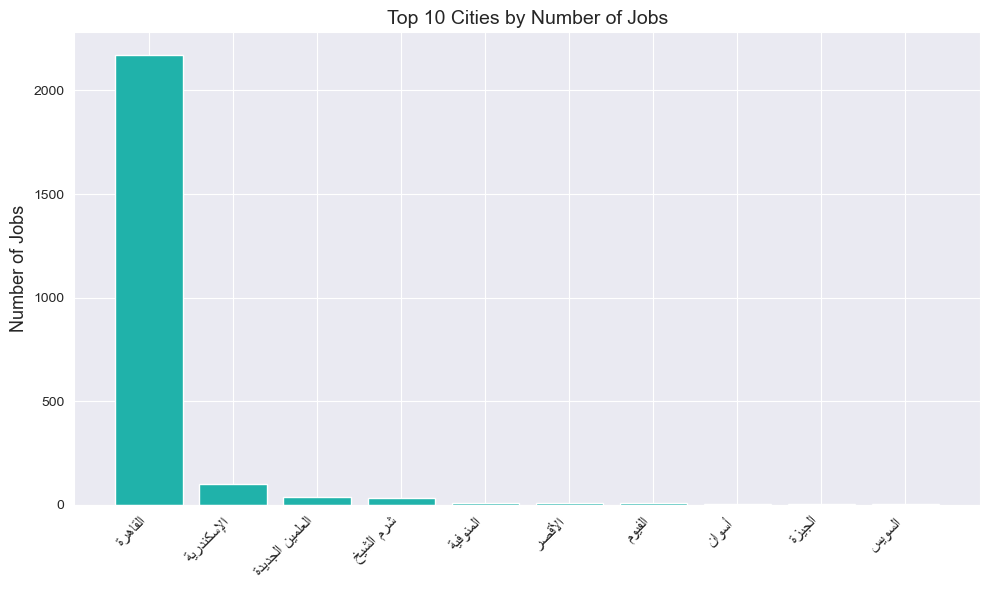

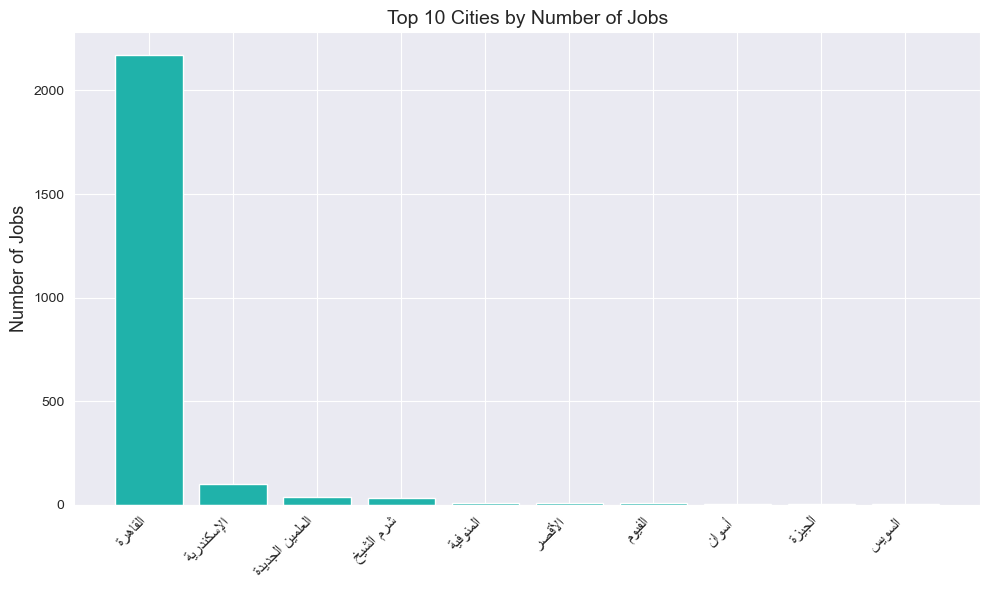

In [19]:
job_distribution_by_city(df_egy[df_egy['city'] != 'Unknown'],
                                                    plot_name="job_distribution_by_city_egypt", folder='egypt',
                                                    top_n=10, save=False)

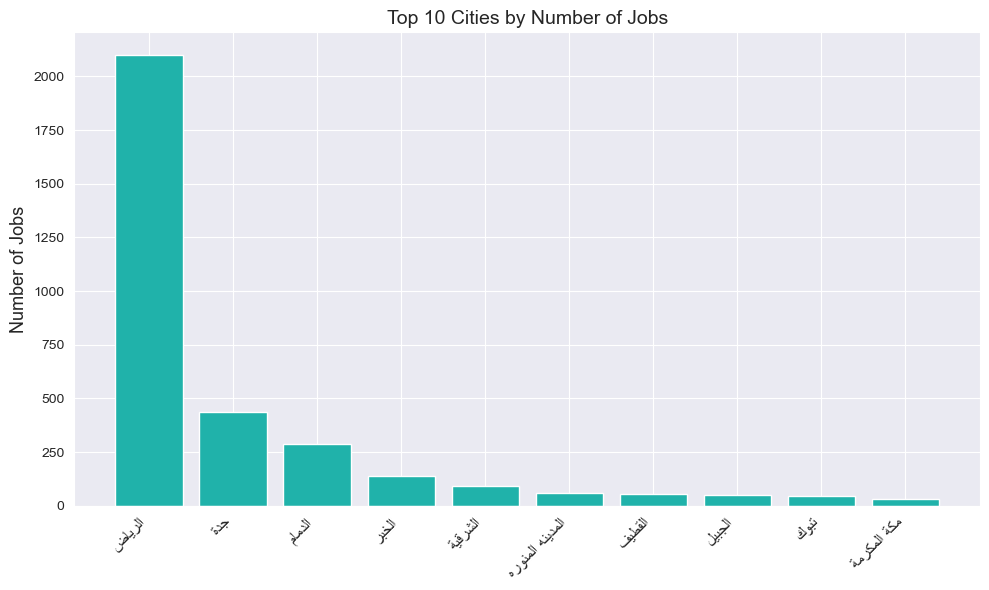

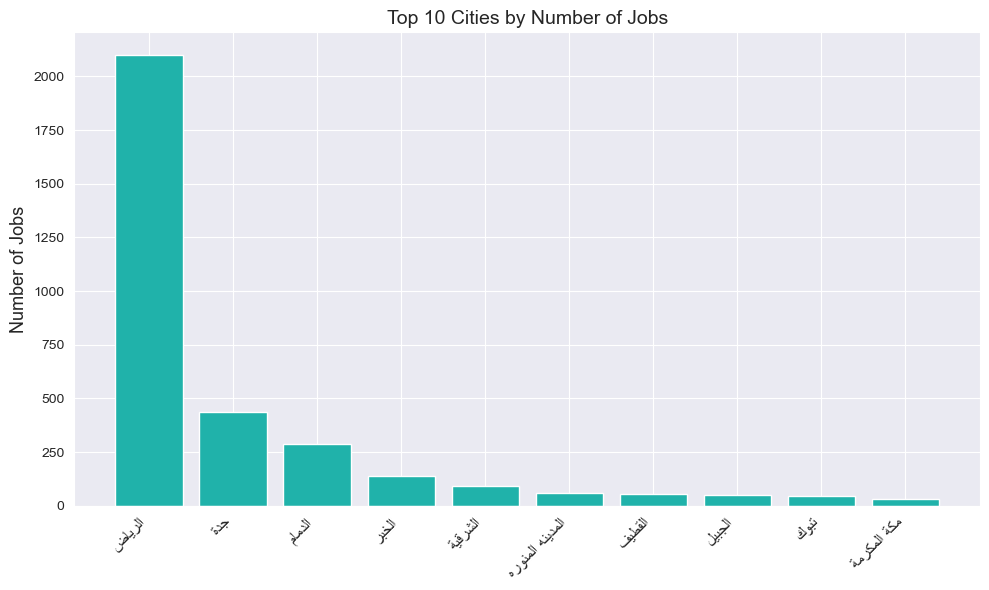

In [20]:
job_distribution_by_city(df_saudi[df_saudi['city'] != 'Unknown'],
                                                    plot_name="job_distribution_by_city_egypt", folder='saudi',
                                                    top_n=10, save=False)

## Visualization 2: Number of Jobs by Company

### Description:
A vertical bar chart illustrating how many job postings come from each company.

### Key Insights:

1. **Talent 360 Dominates the Market:**
   - Over 250 job postings ‚Äî far ahead of any other company.
   - Likely a recruitment firm or aggregator serving multiple clients.

2. **High Activity from Tech and Telecom Firms:**
   - Notable companies include Vodafone Egypt, Giza Systems, Orange, and Accenture.
   - Reflects strong demand for digital and telecom roles.

3. **Diverse but Uneven Sector Representation:**
   - Other sectors also visible:
     - Real Estate: Palm Hills, Arabia Group
     - Tourism: Grand Rotana Resort
     - Industrial: Siemens, Schneider Electric
   - Shows a variety of industries are hiring, but the majority of roles are concentrated in tech and recruitment.

### Overall Takeaway:
> Tech and staffing companies are leading job providers, while other sectors like real estate, tourism, and manufacturing contribute modestly to the hiring landscape.


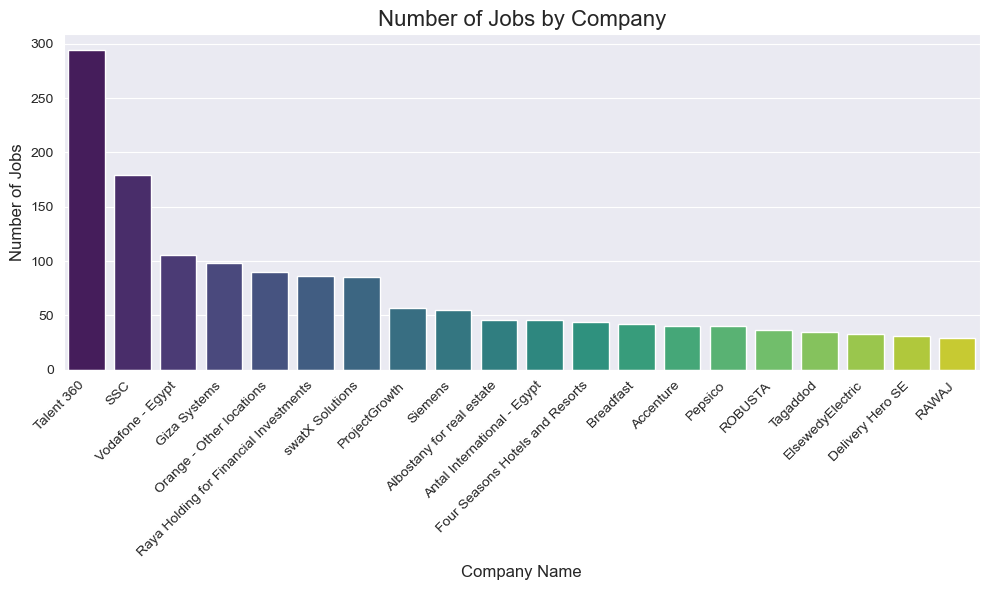

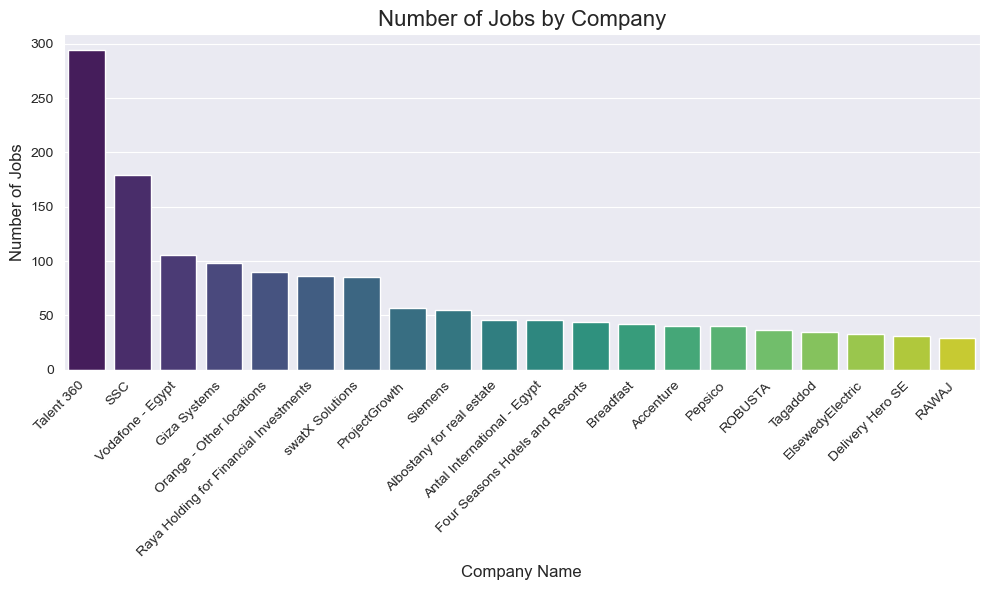

In [21]:
analyze_jobs_by_company(df_egy, plot_name="analyze_jobs_by_company_egypt", folder='egypt',
                                                  save=False)

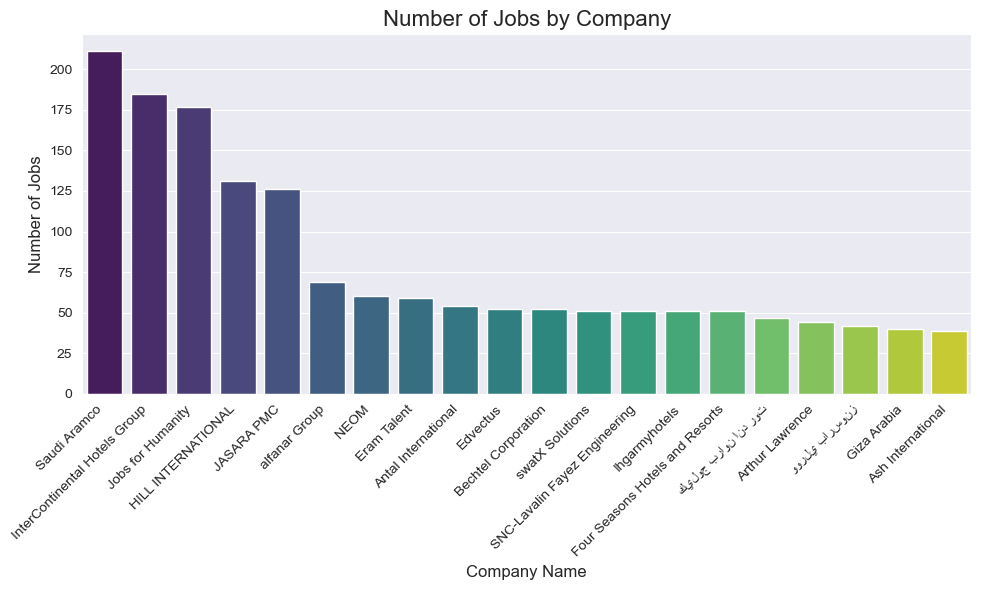

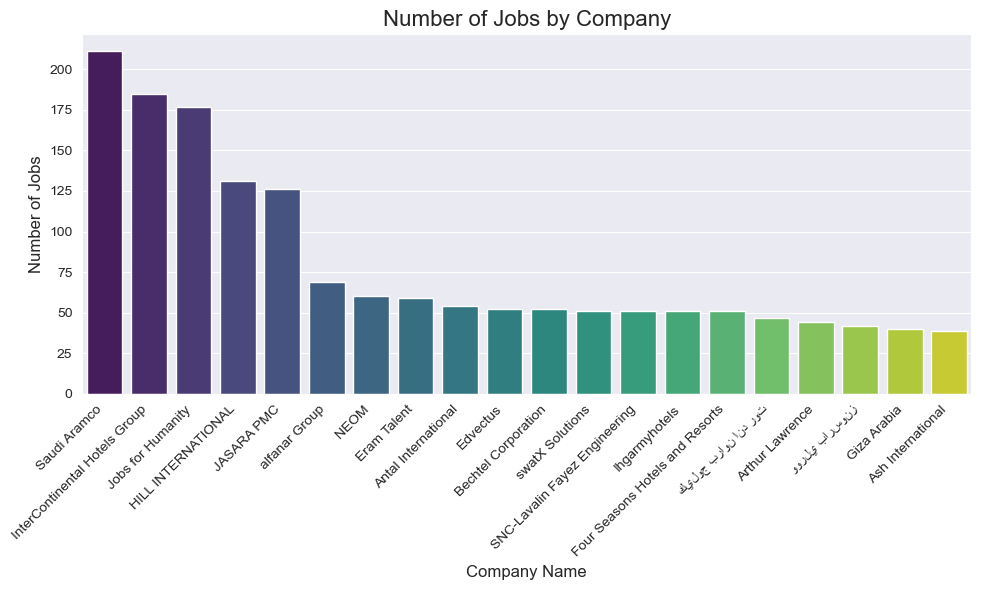

In [22]:
analyze_jobs_by_company(df_saudi, plot_name="analyze_jobs_by_company_egypt", folder='saudi',
                                                  save=False)

## Visualization 3: Top 10 Most Frequent Job Titles

### Description:
A horizontal bar chart showing the most commonly listed job titles in the dataset based on the number of occurrences.

### Key Insights:

1. **Strong Demand for Accounting Roles:**
   - 5 of the top 10 job titles are finance/accounting-related:
     - Accountant
     - Senior Accountant
     - Finance Manager
     - Junior Accountant
     - Chief Accountant
   - Indicates a significant demand in the job market for financial expertise.

2. **Data and Analytics Roles Are Rising:**
   - Positions like Senior Business Analyst and Data Engineer appear in the top 10.
   - Shows increasing importance of data-driven decision-making.

3. **Support and Creative Roles Are Present:**
   - Executive Assistant and Graphic Designer made the list.
   - Suggests administrative and creative skills are still needed, though in smaller volumes.

### Overall Takeaway:
> The job market is currently dominated by finance-related positions, with a growing interest in data and analytics, and a continuing (but smaller) need for creative and support roles.


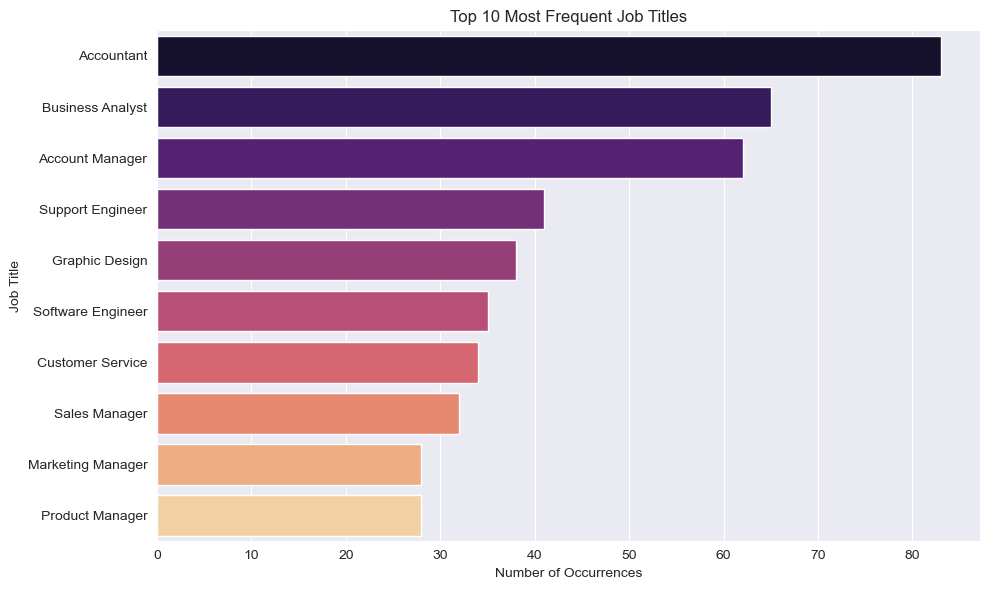

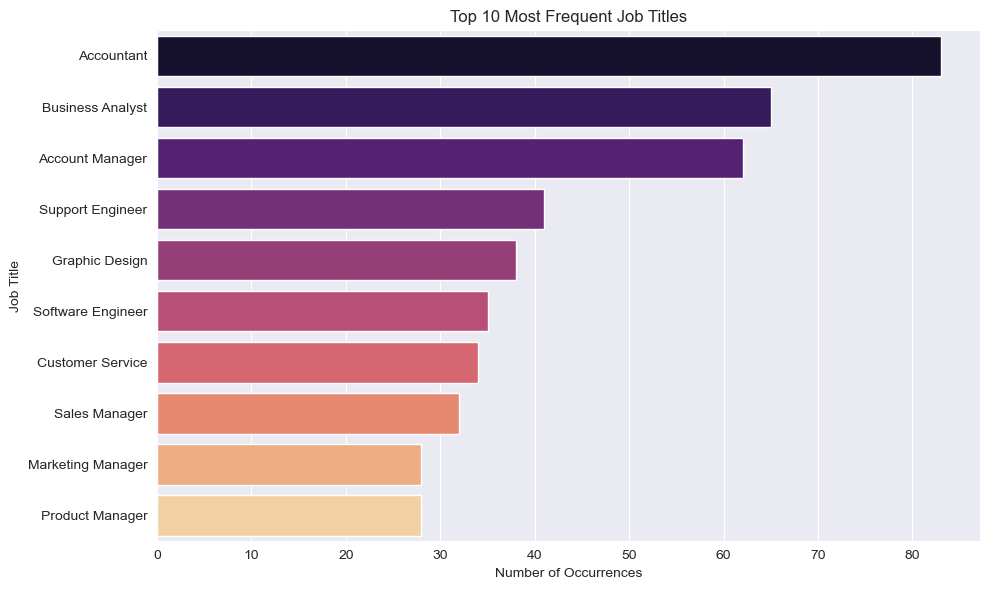

In [23]:
get_top_job_titles_with_plot(df_egy, plot_name="get_top_job_titles_with_plot_egypt",
                                                            folder='egypt', save=False)

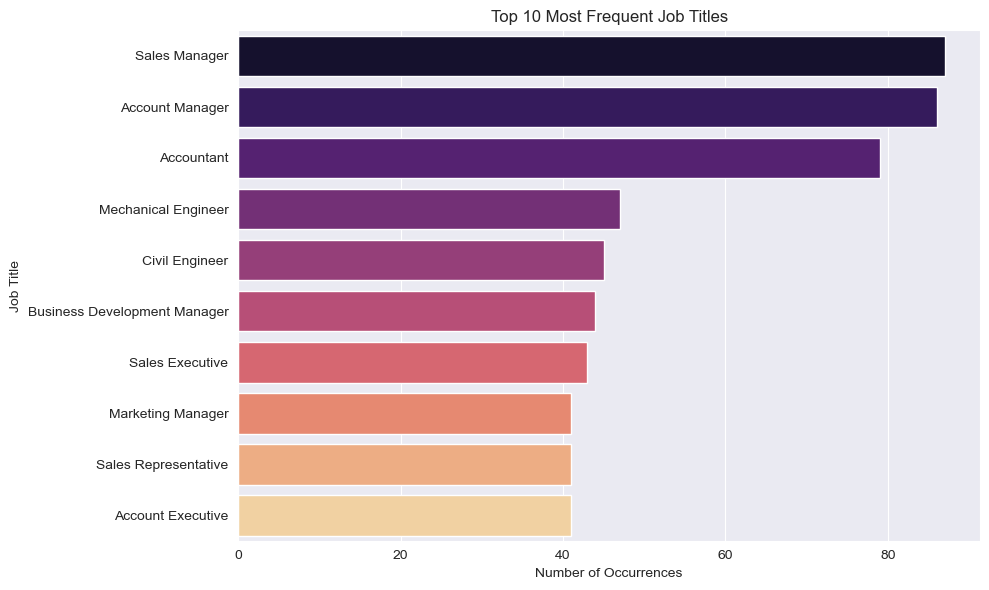

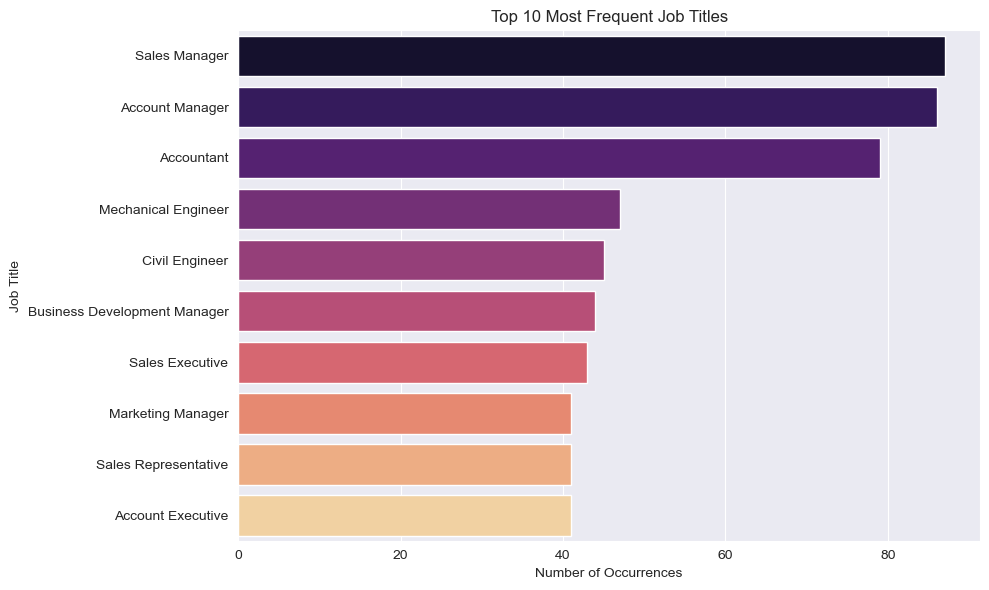

In [24]:
get_top_job_titles_with_plot(df_saudi, plot_name="get_top_job_titles_with_plot_egypt",
                                                            folder='saudi', save=False)

##  Visualization 4: Job Distribution by Work Type

### Description:
A pie chart showing the percentage distribution of jobs based on their work format (On-site, Remote, Hybrid).

###  Key Insights:

1. **Overwhelming Majority are On-site Jobs:**
   - 88.6% of listings are for on-site positions.
   - Implies that traditional office presence is still dominant in Egypt.

2. **Remote and Hybrid Work Are Very Limited:**
   - Only 7.4% remote and 4.0% hybrid roles.
   - Indicates slow adoption of flexible work models.

3. **Implications:**
   - May be due to lack of infrastructure, cultural preferences, or the nature of jobs requiring physical presence.
   - A gap exists compared to global trends favoring hybrid and remote work, especially post-COVID.

### Overall Takeaway:
> The job market in Egypt is still heavily reliant on on-site roles, with minimal adoption of remote or hybrid work formats, highlighting a lag in workplace flexibility.


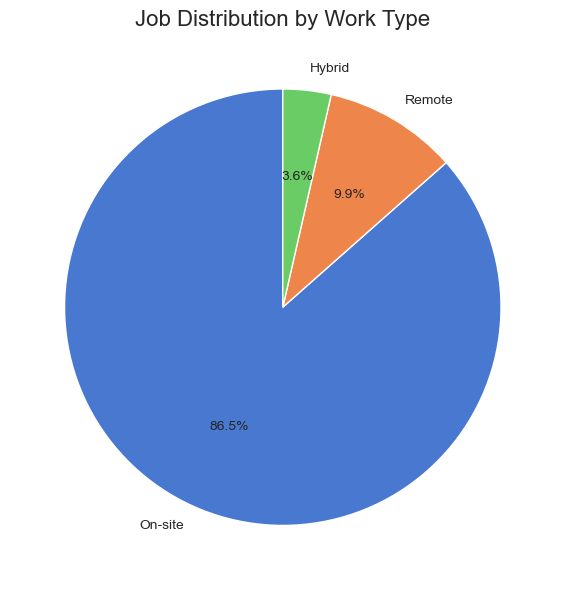

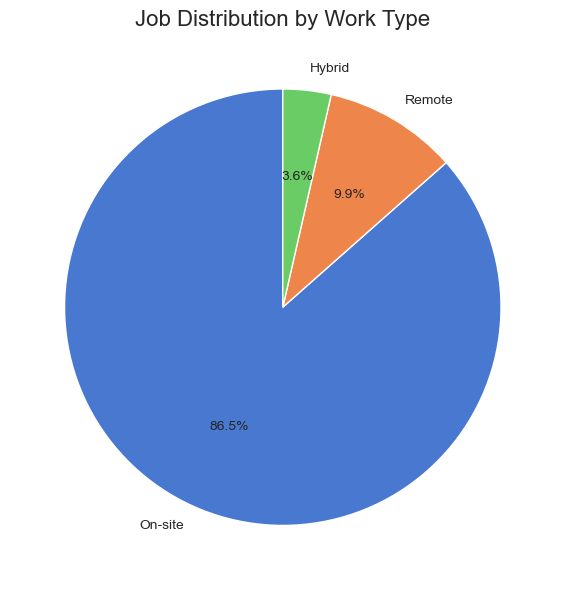

In [25]:
analyze_jobs_by_work_type(df_egy, plot_name="analyze_jobs_by_work_type_egypt",
                                                      folder='egypt', save=False)

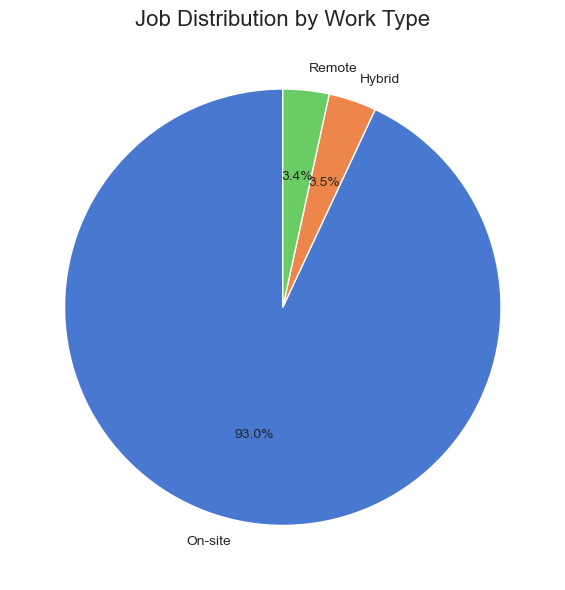

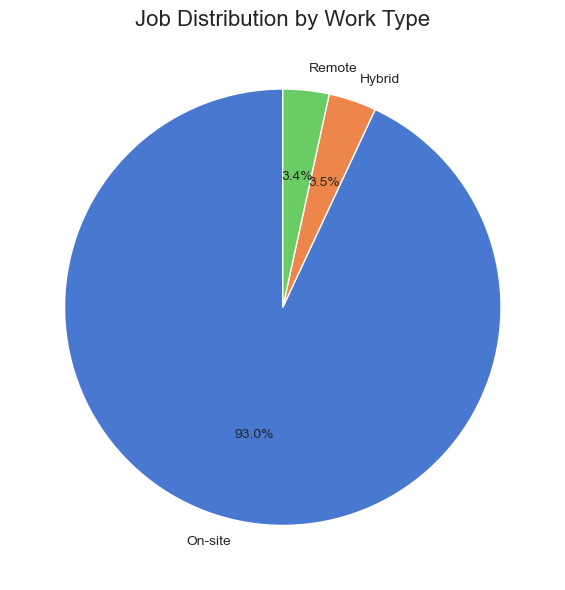

In [26]:
analyze_jobs_by_work_type(df_saudi, plot_name="analyze_jobs_by_work_type_egypt",
                                                      folder='saudi', save=False)

##  Visualization 5: Job Distribution by Month

###  Key Insights:

* April (Month 4) and March (Month 3) show the highest number of job postings, with 839 and 738 jobs respectively.

* There is a sharp decline after March, with February (403 jobs) and January (228 jobs) showing significantly lower2 counts.

* The last three months (December, November) show very low activity, especially November with only 23 job postings.

###  Overall Takeaway:
- Hiring peaks in March and April, indicating a strong seasonal hiring trend during spring. Planning job campaigns or applications in these months could yield better results.


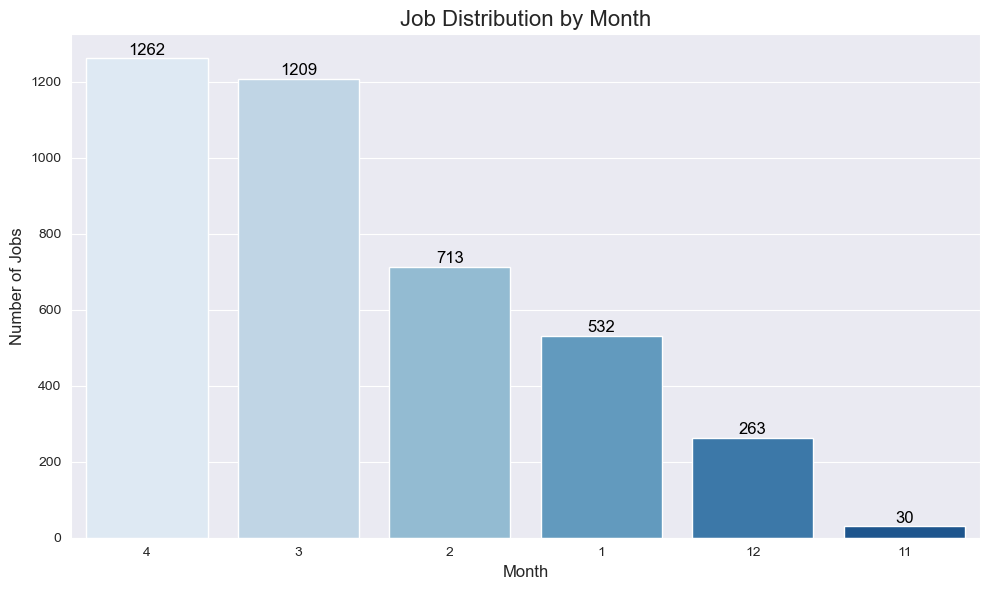

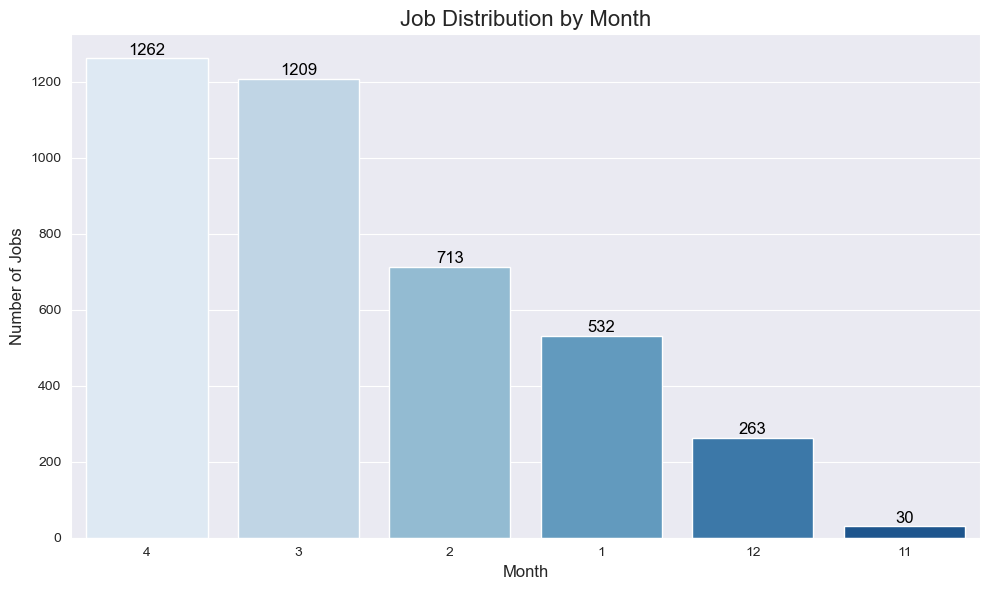

In [27]:
analyze_jobs_by_time = analyze_jobs_by_time(df_egy, plot_name="analyze_jobs_by_time_egypt", folder='egypt', save=False)

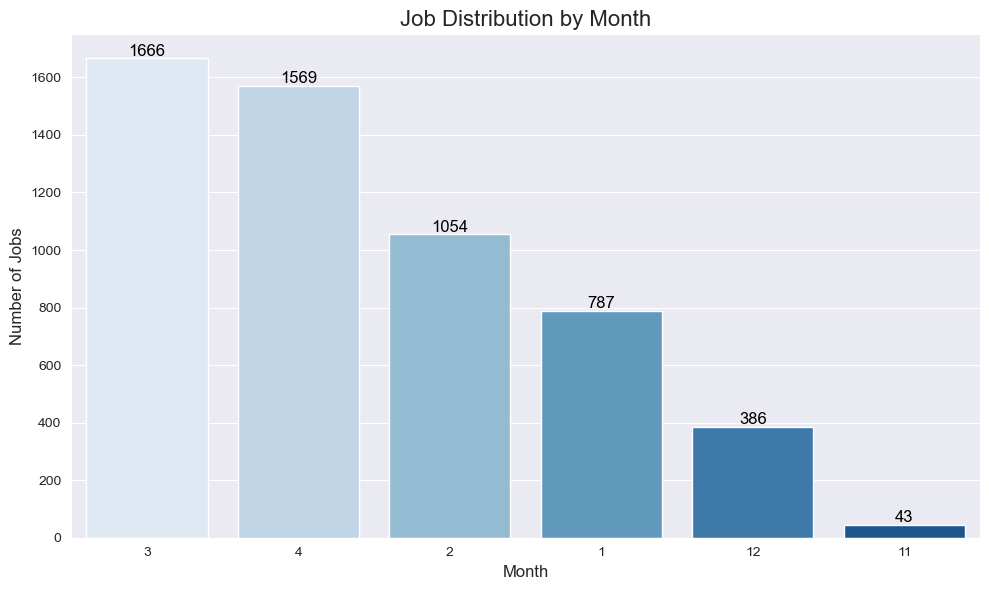

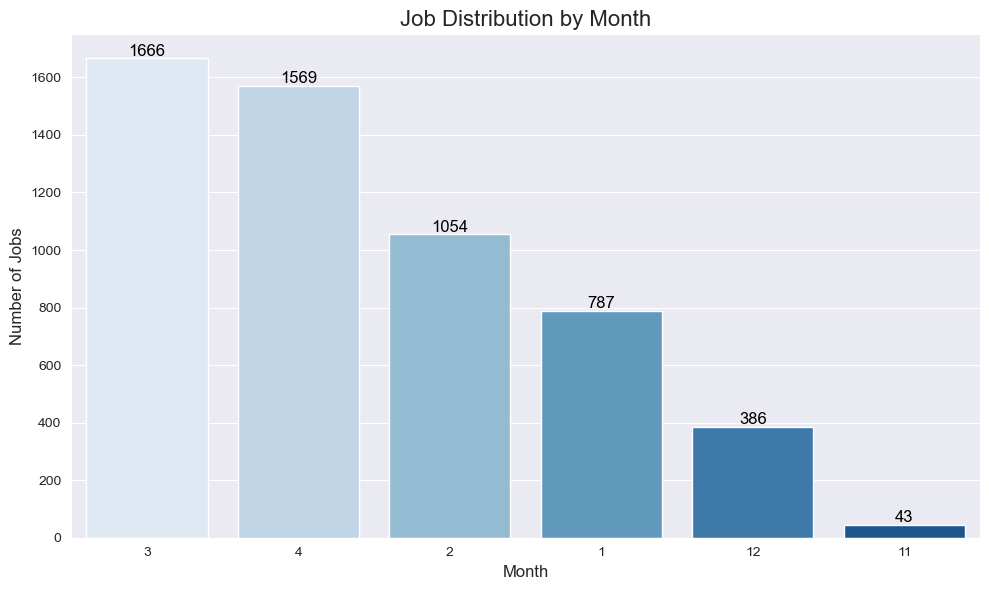

In [28]:
analyze_jobs_by_time = analyze_jobs_by_time(df_saudi, plot_name="analyze_jobs_by_time_egypt", folder='saudi', save=False)

##  Visualization 6: Job Distribution by Month

###  Key Insights:

- A dominant majority (2253 jobs) have no gender preference.
- Female-targeted roles are 97, while male-targeted roles are just 55.

###  Overall Takeaway:
- The job market is largely gender-neutral in job listings, which may reflect a trend toward inclusivity or a focus on qualifications over demographics


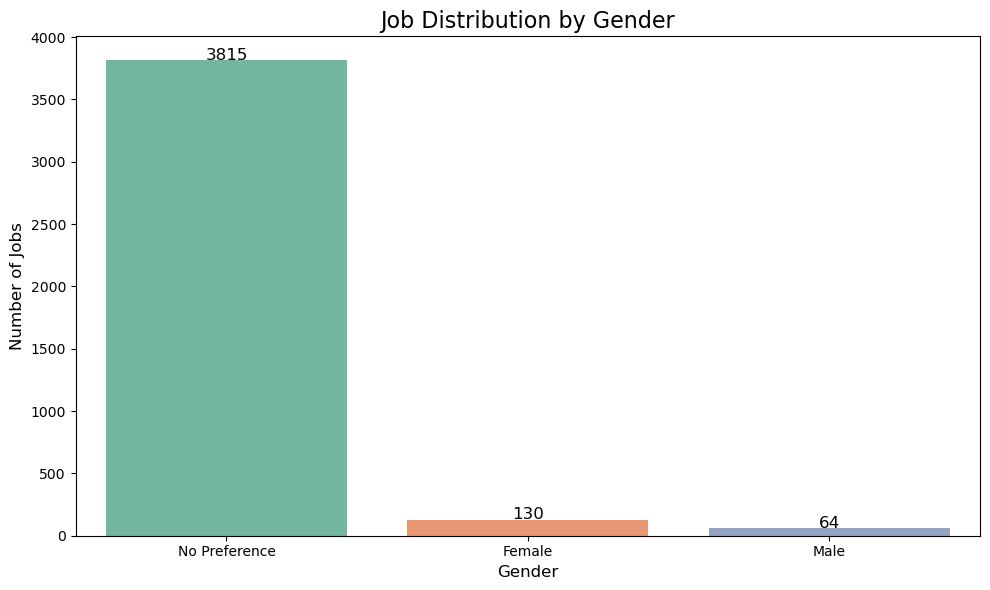

Figure(1000x600)


In [17]:
analyze_jobs_by_gender = analyze_jobs_by_gender(df_egy , plot_name="analyze_jobs_by_gender_egypt", folder='egypt',
                                                save=False)

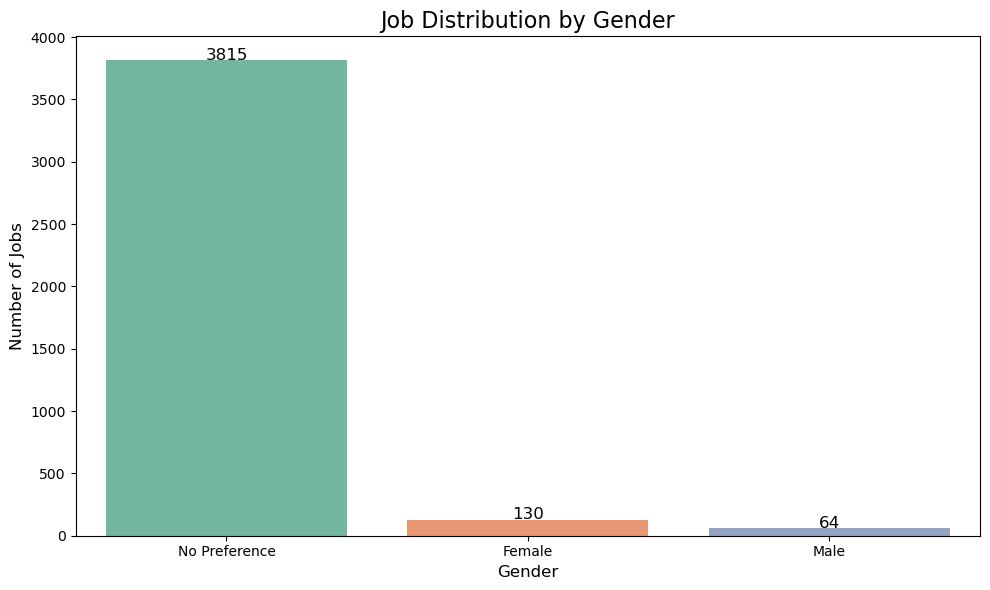

Figure(1000x600)


In [17]:
analyze_jobs_by_gender = analyze_jobs_by_gender(df_saudi , plot_name="analyze_jobs_by_gender_egypt", folder='saudi',
                                                save=False)

##  visualization 7 :Job Level Distribution Analysis

###  Key Insights:

**"No Preference" Dominates**
  - 1,312 job postings have no specified job level.
  - This may indicate flexibility in hiring or a lack of clarity in role definitions.

- **Strong Demand for Experienced Talent**
  - Senior-level: 544 jobs
  - Management: 409 jobs
  - These figures highlight a clear demand for experienced and leadership-level professionals.

- **Limited Entry-Level Opportunities**
  - Junior: 54
  - Graduate: 27
  - Mid Level: 21
  - Opportunities for early-career candidates are noticeably fewer.

- **Minimal Executive-Level Roles**
  - C-Suite positions: 2
  - These roles are naturally scarce due to their seniority and selectiveness.

### Overall Takeaway:
- The job market is heavily skewed toward senior and management-level positions, with a surprising number of listings having no specified level. This may reflect a broad hiring strategy or incomplete data entry. Entry-level and executive roles are limited, indicating that companies are prioritizing experienced professionals over new graduates or top-tier executives.


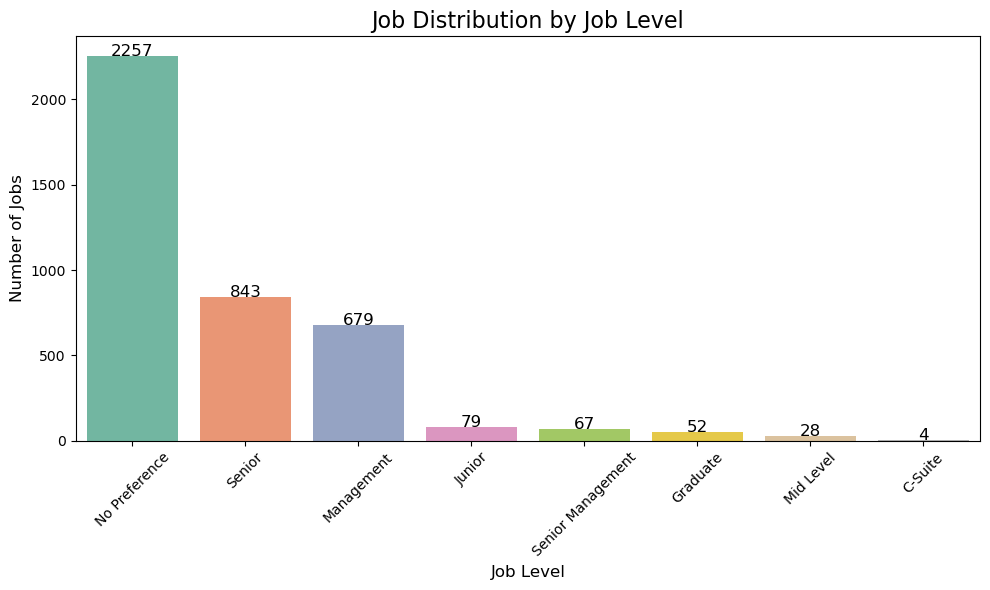

Figure(1000x600)


In [18]:
analyze_jobs_by_job_level = analyze_jobs_by_job_level(df_egy, plot_name="analyze_jobs_by_job_level_egypt",
                                                      folder='egypt', save=False)

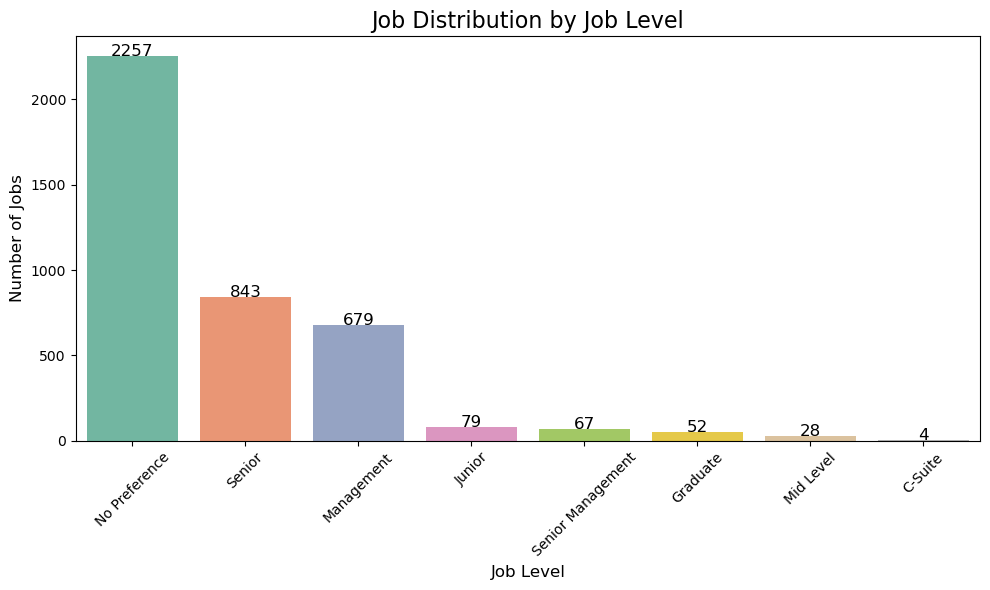

Figure(1000x600)


In [18]:
analyze_jobs_by_job_level = analyze_jobs_by_job_level(df_saudi, plot_name="analyze_jobs_by_job_level_egypt",
                                                      folder='saudi', save=False)

## Visualization 8 : M-Level Job Entries Over Time

This line chart tracks the number of job postings for **Management-level (M-level)** roles from **November 2024 to April 2025**.

### Key Insights

- **Consistent Growth**:
  The number of M-level job postings increased steadily each month, showing sustained demand.

- **Sharp Growth Between Feb‚ÄìMar 2025**:
  - February: ~400 jobs
  - March: ~740 jobs
  - This marks the most significant month-over-month growth.

- **Early Acceleration (Nov‚ÄìJan)**:
  - Job entries started at a low point (~30 in Nov) and grew gradually through Jan (~230), indicating the early stages of hiring momentum.

- **Stabilization in April**:
  - April saw continued growth (~840 jobs), but at a slower rate compared to the March surge.


### Overall Takeaway

The hiring trend for management-level roles has shown strong upward momentum over the past six months, particularly peaking in early 2025. This suggests increasing organizational needs for mid-to-senior management talent, likely driven by business expansion or restructuring initiatives.




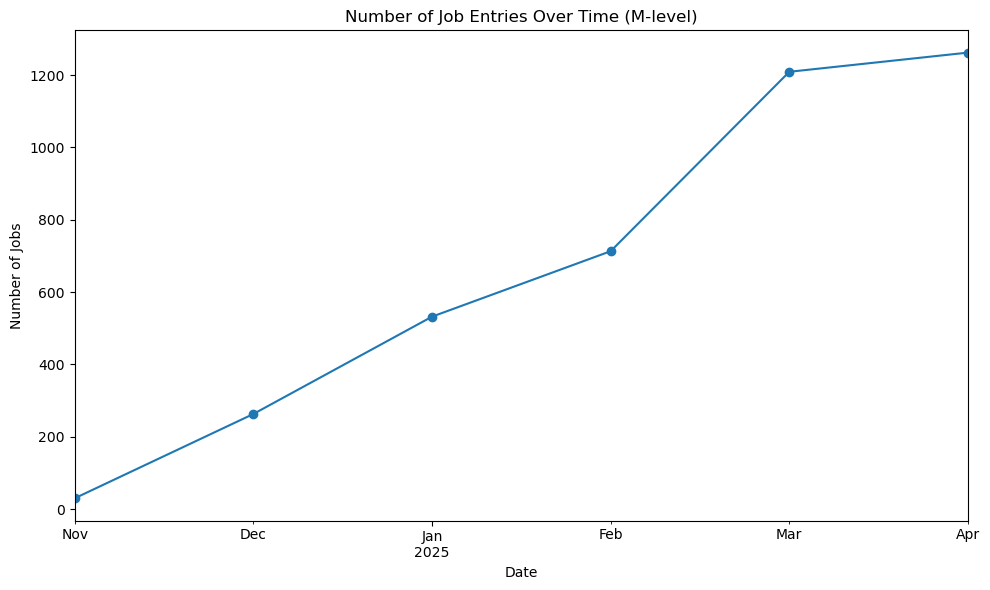

Figure(1000x600)


In [19]:
plot_job_trend_over_time = plot_job_trend_over_time(df_egy, plot_name="plot_job_trend_over_time_egypt", folder='egypt',
                                                    save=False)

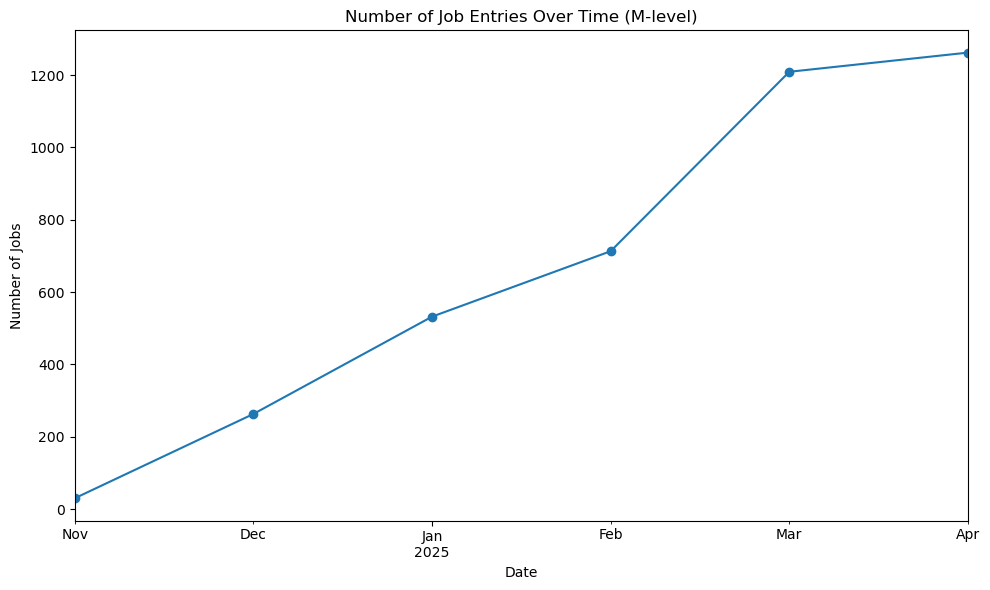

Figure(1000x600)


In [19]:
plot_job_trend_over_time = plot_job_trend_over_time(df_saudi, plot_name="plot_job_trend_over_time_egypt", folder='saudi',
                                                    save=False)

## Visualization 9: Distribution of Job Entries by Month

This boxplot illustrates the **daily distribution of job entries** for each month, highlighting variability, medians, and outliers across time.

### Key Insights

- **Clear Upward Trend (Jan‚ÄìApr)**:
  - Each month from January to April shows an **increase in the median** number of jobs posted per day.
  - The interquartile range (IQR) also widens, indicating **greater day-to-day variability** in job postings.

- **April Stands Out**:
  - April has the **widest spread** of data and the **highest number of outliers**, including some days with more than **200 jobs posted**.
  - This suggests a **surge in recruitment activity** or possibly batch job uploads.

- **Consistent Low Activity (Nov‚ÄìDec)**:
  - Very low median values and tight boxplots indicate **minimal hiring activity** during these months, possibly due to year-end slowdowns.

- **Outliers as Activity Spikes**:
  - Multiple months exhibit high outliers, particularly March and April, reflecting **short bursts of high hiring days**.

---

### Overall Takeaway

- The data reveals a **seasonal hiring pattern**, with job entry volumes **peaking sharply in April** and remaining low in the final months of the year. This suggests that companies significantly ramp up hiring in Q1 and Q2, with April being a strategic month for recruitment efforts.

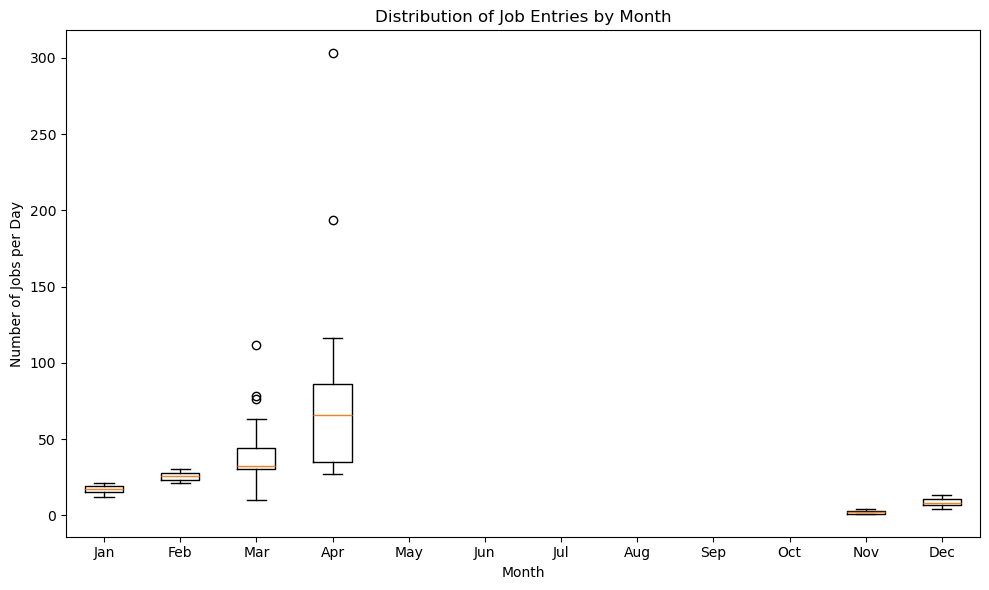

Figure(1000x600)


In [20]:
plot_monthly_job_boxplot = plot_monthly_job_boxplot(df_egy, plot_name="plot_monthly_job_boxplot_egypt", folder='egypt',
                                                    save=False)

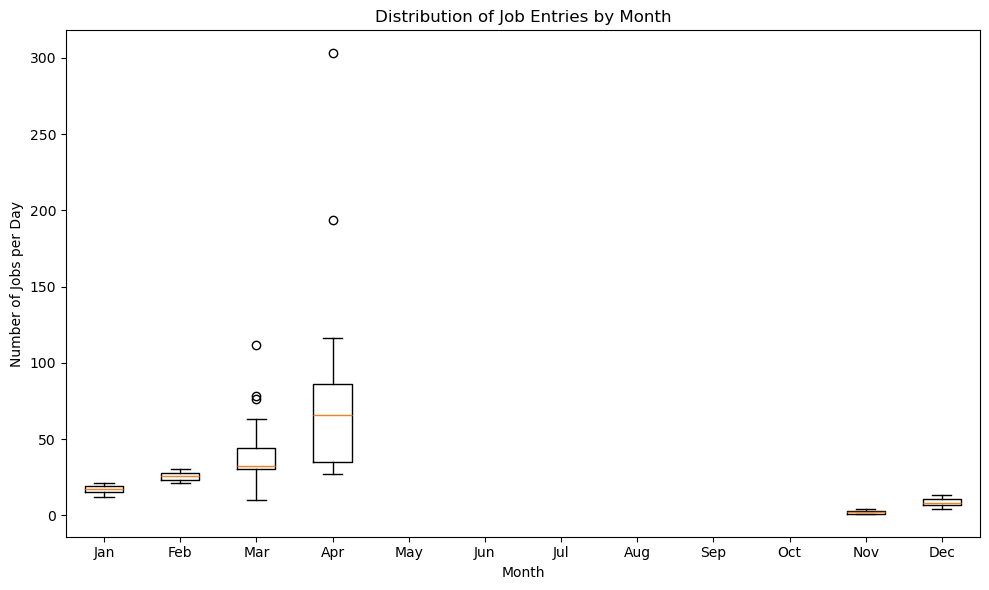

Figure(1000x600)


In [20]:
plot_monthly_job_boxplot = plot_monthly_job_boxplot(df_saudi, plot_name="plot_monthly_job_boxplot_egypt", folder='saudi',
                                                    save=False)

## Visualization 10: The Highest 10 Areas Declared for Business Opportunities

This bar chart illustrates the distribution of business opportunities across different domains, highlighting the most prominent areas based on the number of jobs declared. The chart provides insights into which sectors are currently experiencing the highest demand for business opportunities.

### Key Insights

- **Dominance of "ÿÆÿØŸÖÿßÿ™ ÿßŸÑÿØÿπŸÖ ÿßŸÑÿ™ÿ¨ÿßÿ±Ÿä ÿßŸÑÿ£ÿÆÿ±Ÿâ" (Other Commercial Support Services)**:
  - This domain leads by a significant margin with **3,240 job opportunities**, far exceeding all other sectors.
  - This suggests that businesses in this area are actively seeking support services, possibly due to high operational needs or expansion plans.

- **Engineering Consultancy and Administrative Consulting**:
  - Both "ÿßŸÑÿßÿ≥ÿ™ÿ¥ÿßÿ±ÿßÿ™ ÿßŸÑŸáŸÜÿØÿ≥Ÿäÿ© ÿßŸÑÿπÿßŸÖÿ©" (General Engineering Consultancy) and "ÿßŸÑÿßÿ≥ÿ™ÿ¥ÿßÿ±ÿßÿ™ ÿßŸÑÿ•ÿØÿßÿ±Ÿäÿ©" (Administrative Consulting) show moderate activity, with **97** and **85** job opportunities, respectively.
  - These sectors indicate a steady demand for professional advisory services, likely driven by infrastructure projects or organizational restructuring.

- **Low Activity in Traditional Sectors**:
  - Traditional sectors such as "ÿßŸÑÿ®ŸÜÿßÿ° ŸàÿßŸÑÿ™ÿ¥ŸäŸäÿØ" (Construction and Building) and "ÿßŸÑÿ™ail ÿ®ÿßŸÑÿ™ÿ¨ÿ≤ÿ¶ÿ© ŸàÿßŸÑÿ¨ŸÖŸÑÿ©" (Retail and Wholesale Trade) have relatively low job counts (**35** and **30**, respectively).
  - This could imply that these industries are either saturated or facing challenges in attracting new business opportunities.

- **Miscellaneous Categories**:
  - Domains like "Unknown" and "ÿßŸÑÿ™ÿ≥ŸàŸäŸÇ" (Marketing) have minimal activity, indicating either limited data availability or less focus on these areas.
  - "ÿßŸÑÿ™ÿπŸÑŸäŸÖ ÿßŸÑÿπÿßŸÑŸä" (Higher Education) and "ÿßŸÑÿµÿ≠ÿ© ŸàÿßŸÑÿ≥ŸÉŸÜ" (Healthcare and Housing) also show low engagement, suggesting they might not be prioritized in current business strategies.

### Overall Takeaway

The data reveals a **clear preference for service-oriented sectors**, particularly in *"Other Commercial Support Services"*, which dominates the landscape with over **3,000 job opportunities**.

Professional consulting services (*engineering* and *administrative*) remain active but at a much lower scale compared to the leading sector.

Traditional sectors such as *construction* and *retail* appear to be less attractive for business opportunities, potentially due to economic shifts or industry-specific challenges.

The dominance of support services highlights a trend toward outsourcing and specialized expertise, reflecting modern business practices focused on efficiency and scalability.

### Recommendations

- **Focus on High-Demand Sectors**: Businesses should prioritize exploring opportunities in *"Other Commercial Support Services"* due to its overwhelming dominance.
- **Diversify Investment**: While traditional sectors show low activity, they may present long-term growth potential. Companies can consider strategic investments in these areas for future expansion.
- **Data Collection and Analysis**: Further investigation is needed to understand why certain sectors, like marketing and higher education, have minimal activity. This could involve analyzing market trends, regulatory factors, or industry-specific challenges.

### Visual Summary

| Sector                                 | Arabic Name                             | Job Count |
|----------------------------------------|------------------------------------------|-----------|
| Other Commercial Support Services      | ÿÆÿØŸÖÿßÿ™ ÿßŸÑÿØÿπŸÖ ÿßŸÑÿ™ÿ¨ÿßÿ±Ÿä ÿßŸÑÿ£ÿÆÿ±Ÿâ               | 3,240     |
| General Engineering Consultancy        | ÿßŸÑÿßÿ≥ÿ™ÿ¥ÿßÿ±ÿßÿ™ ÿßŸÑŸáŸÜÿØÿ≥Ÿäÿ© ÿßŸÑÿπÿßŸÖÿ©                | 97        |
| Administrative Consulting              | ÿßŸÑÿßÿ≥ÿ™ÿ¥ÿßÿ±ÿßÿ™ ÿßŸÑÿ•ÿØÿßÿ±Ÿäÿ©                      | 85        |
| Construction and Building              | ÿßŸÑÿ®ŸÜÿßÿ° ŸàÿßŸÑÿ™ÿ¥ŸäŸäÿØ                          | 35        |
| Retail and Wholesale Trade             | ÿßŸÑÿ™ÿ¨ÿ≤ÿ¶ÿ© ŸàÿßŸÑÿ¨ŸÖŸÑÿ©                          | 30        |

This visualization underscores the importance of understanding sector-specific dynamics to identify lucrative business opportunities effectively.

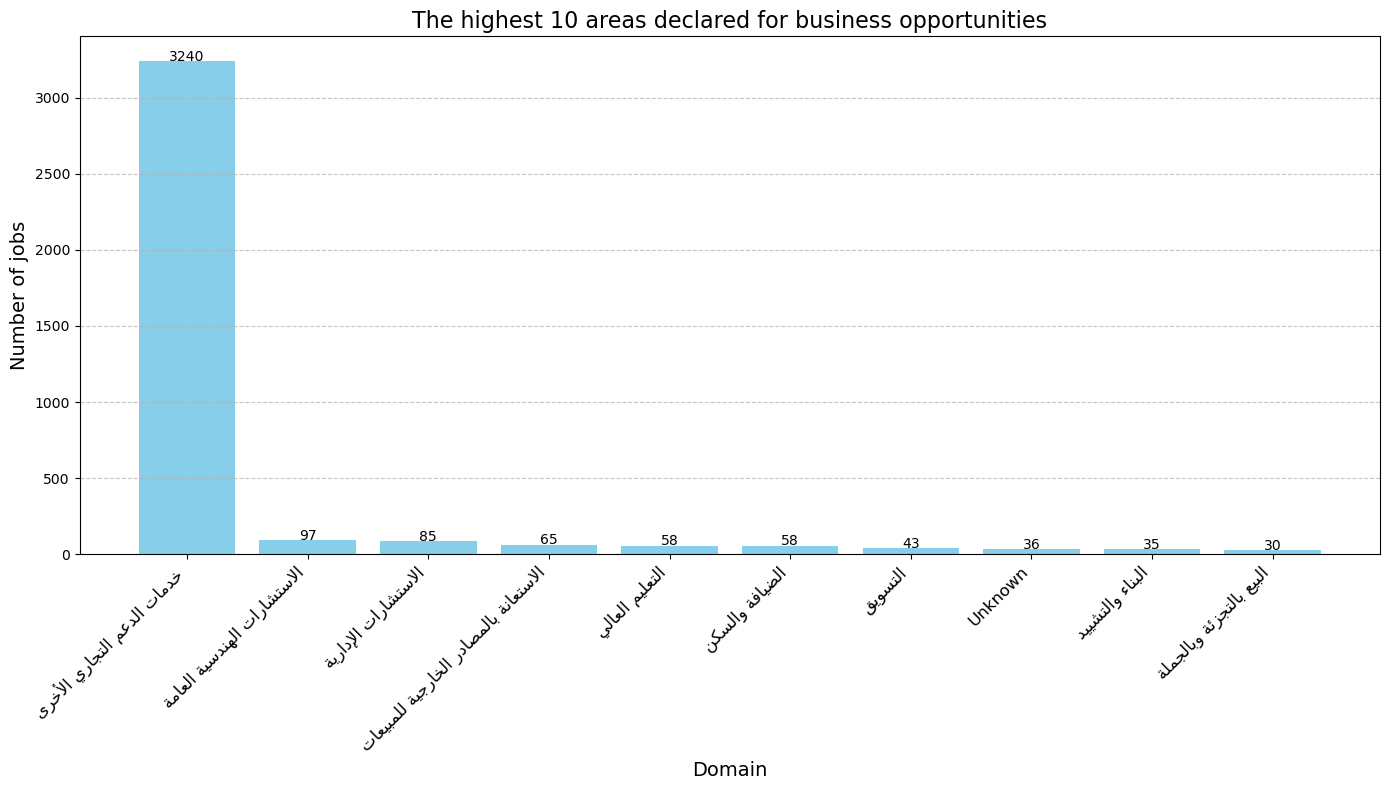

Figure(1400x800)


In [22]:
plot_job_postings_by_industry = plot_job_postings_by_industry(df_egy, plot_name="plot_job_postings_by_industry_egypt",
                                                              folder='egypt', save=False)

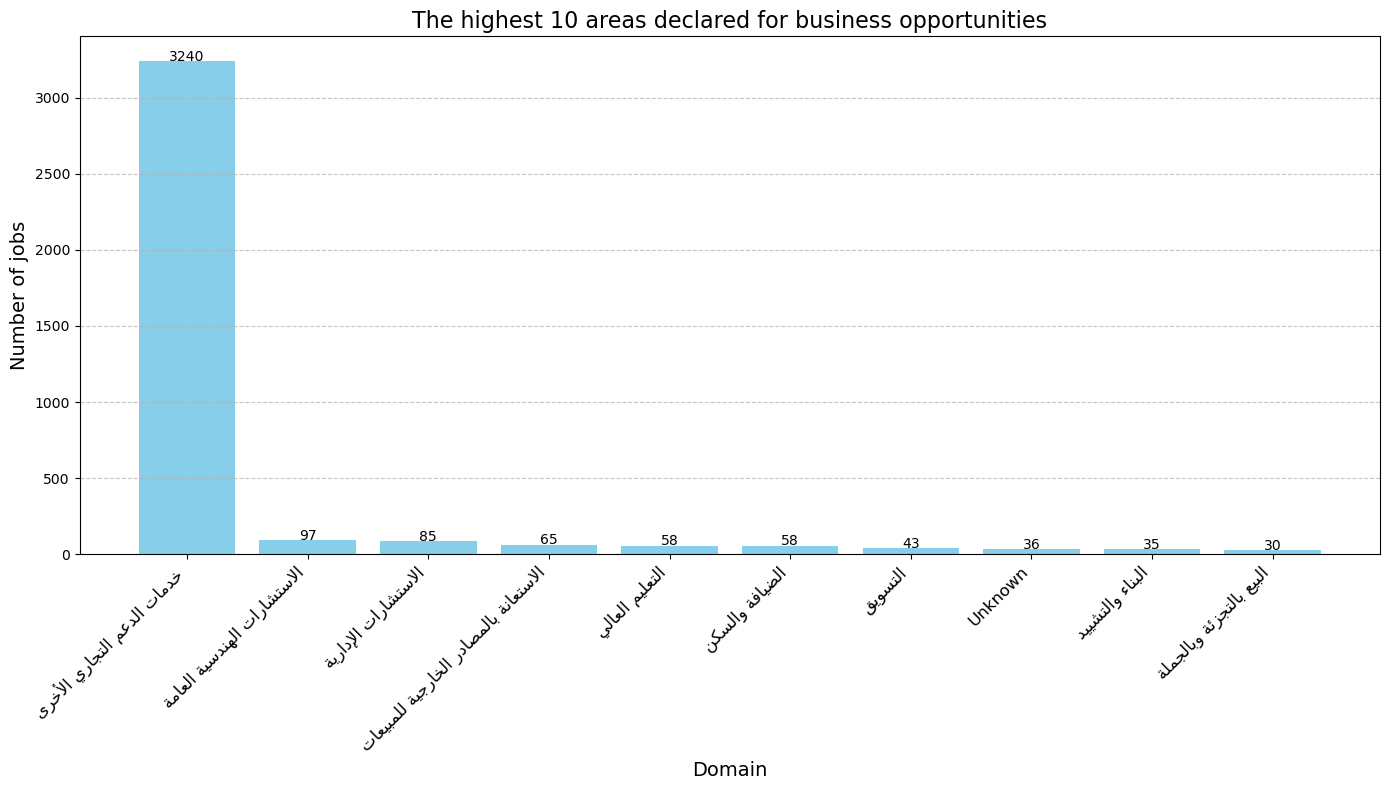

Figure(1400x800)


In [22]:
plot_job_postings_by_industry = plot_job_postings_by_industry(df_saudi, plot_name="plot_job_postings_by_industry_egypt",
                                                              folder='saudi', save=False)